<a href="https://colab.research.google.com/github/waytoakash/waytoakash/blob/main/Master_Script_Akash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**⏯ Authorization & Import Libraries**

In [63]:
import os
import numpy as np
import pandas as pd
import datetime
import dateutil.parser
import re
from datetime import date

# from dateutil.relativedelta import relativedelta
from functools import reduce
from datetime import datetime
from datetime import date, timedelta

from google.colab import drive
drive.mount('/content/drive', force_remount = True)


import gspread
from google.colab import auth
# auth.authenticate_user()

# from oauth2client.client import GoogleCredentials
# gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe

auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#get data from spreadsheetID and Range Name function
def get_data(spreadSheetId, rangeName):
    wb = gc.open_by_key(spreadSheetId)
    ws = wb.worksheet(rangeName)
    rows = ws.get_all_values()
    return rows
#get all data in a sheet as df and there 1st row things as the df labels.
#If sheets don't have their labels in the first row than we have to do it manuaaly as per the data
def get_data_df(spreadSheetId, rangeName):
  l = get_data(spreadSheetId, rangeName)
  ldf = pd.DataFrame.from_records(l[1:], columns = l[0])
  return ldf

Mounted at /content/drive


In [64]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()

def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):    
      for file in files:
        path = os.path.join(root, file)
        date = str(path).split('/')[7:][0]
        date = pd.to_datetime(date).date()     
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):                 
          temp = pd.read_csv(path,parse_dates=True)        
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[9:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

#📕 **PIP Report_Fortnightly**

##**Data Import and Processing**

In [ ]:
# Aug'22 TSM Payout Data
wb = gc.open_by_key("1BYcZ3ikrlPb12BrsuE3sCbEJd-rF_DaOBA1sHAjJVwU")
ws = wb.worksheet("Aug-ASM")
df1 = ws.get_all_values()
TSM_Mar = pd.DataFrame(df1)
TSM_Mar.columns = TSM_Mar.iloc[0]
TSM_Mar = TSM_Mar.drop(0)
TSM_Mar = TSM_Mar.loc[~(TSM_Mar['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Mar['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Mar['In PIP/ On Notice Status']=='Show Cause sent')& ~(TSM_Mar['Emp Status']=='Inactive')& ~(TSM_Mar['In PIP/ On Notice Status']=='To be exit')
& ~(TSM_Mar['Emp Status']=='In Training')& ~(TSM_Mar['Emp Status']=='On Hold')]

TSM_Mar = TSM_Mar[['Month', 'TSM mail-id', 'Emp City', 'Role','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

# Jul'22 TSM Payout Data
wb = gc.open_by_key("1BYcZ3ikrlPb12BrsuE3sCbEJd-rF_DaOBA1sHAjJVwU")
ws = wb.worksheet("Jul-ASM")
df2 = ws.get_all_values()
TSM_Feb = pd.DataFrame(df2)
TSM_Feb.columns = TSM_Feb.iloc[0]
TSM_Feb = TSM_Feb.drop(0)
#TSM_Feb = TSM_Feb.loc[~(TSM_Feb['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Feb['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Feb['In PIP/ On Notice Status']=='To be exit')& ~(TSM_Feb['Emp Status']=='Inactive')& ~(TSM_Feb['In PIP/ On Notice Status']=='Show Cause sent')]
#TSM_Feb = TSM_Feb[['Month', 'TSM mail-id', 'Emp City', 'Role','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
#'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

# Jun'22 TSM Data Leaderboard
wb = gc.open_by_key("1BYcZ3ikrlPb12BrsuE3sCbEJd-rF_DaOBA1sHAjJVwU")
ws = wb.worksheet("Jun-ASM")
df3 = ws.get_all_values()
TSM_Jan = pd.DataFrame(df3)
TSM_Jan.columns = TSM_Jan.iloc[0]
TSM_Jan = TSM_Jan.drop(0)
#TSM_Jan = TSM_Jan.loc[~(TSM_Jan['Emp Status']=='Inactive') & ~(TSM_Jan['In PIP/ On Notice Status']=='On Notice')]
TSM_Jan = TSM_Jan[['Month', 'TSM mail-id', 'Emp City', 'Role','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'Reporting Date',
       'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]

In [ ]:
TSM_Feb

,Month,Resource,TSM mail-id,Emp City,Role,Team,Reporting supervisor Mail ID,Emp Status,DOJ,Reporting Date,Tenure,In PIP/ On Notice Status,Target,IP (HO),Achievement % (HO),,Aug-1
1,7,Vendor,pooja.s@nobroker.in,Noida,ASM,,rishabh.goel@nobroker.in,Active,1/27/2020,5/8/2020,815,,11550,10628.315,92.02%,,
2,7,Campus,rohith.patil@nobroker.in,Bangalore,ASM,,naresha.v@nobroker.in,Active,6/29/2020,7/10/2020,752,,12000,13862.67,115.52%,,
3,7,Internal Sourcing,dishant.agrawal@nobroker.in,Ahmedabad,ASM,,manish.chanchal@nobroker.in,Active,8/13/2020,8/28/2020,703,,17100,17899.27,104.67%,,
4,7,Vendor,rushabh.shah@nobroker.in,Mumbai,ASM,,sachin.solanke@nobroker.in,Active,8/20/2020,9/2/2020,698,,7600,10878.82,143.14%,,
5,7,Internal Sourcing,amit.bind@nobroker.in,Mumbai,ASM,,sachin.solanke@nobroker.in,Active,9/3/2020,9/15/2020,685,,9000,4523.865,50.27%,,
6,7,Internal Sourcing,vishal.shukla@nobroker.in,Pune,ASM,,suvodeep.sen@nobroker.in,Active,8/23/2021,9/3/2021,332,On Notice,8150,3541.515,43.45%,,
7,7,Vendor,subhojeet.karmakar@nobroker.in,Navi Mumbai,ASM,,lavendrasing.patil@nobroker.in,Active,10/18/2021,11/3/2021,271,,7950,6944.465,87.35%,,
8,7,Vendor,suvir.naik@nobroker.in,South Mumbai,ASM,,vivek.nikam@nobroker.in,Active,11/22/2021,12/8/2021,236,,2800,1690.11,60.36%,,
9,7,Referral,ganesh.selvamani1@nobroker.in,Chennai,ASM,,paily.chiranjeevi@nobroker.in,Active,12/6/2021,12/22/2021,222,,13000,11008.28,84.68%,,
10,7,Internal Sourcing,upendra.rao@nobroker.in,Bangalore,ASM,,naresha.v@nobroker.in,Active,12/20/2021,1/14/2022,199,,9000,13272.425,147.47%,,


In [ ]:
TSM_Mar[TSM_Mar['Emp Status']=='Inactive'].value_counts()

Series([], dtype: int64)

In [ ]:
TSM_Mar['DOJ'] = pd.to_datetime(TSM_Mar['DOJ'])
TSM_Mar['Reporting Date'] = pd.to_datetime(TSM_Mar['Reporting Date'])
TSM_Mar['Tenure'] = pd.to_numeric(TSM_Mar['Tenure'])
TSM_Mar['Target'] = pd.to_numeric(TSM_Mar['Target'])
TSM_Mar['IP (HO)'] = pd.to_numeric(TSM_Mar['IP (HO)'])

TSM_Feb['DOJ'] = pd.to_datetime(TSM_Feb['DOJ'])
TSM_Feb['Reporting Date'] = pd.to_datetime(TSM_Feb['Reporting Date'])
TSM_Feb['Tenure'] = pd.to_numeric(TSM_Feb['Tenure'])
TSM_Feb['Target'] = pd.to_numeric(TSM_Feb['Target'])
TSM_Feb['IP (HO)'] = pd.to_numeric(TSM_Feb['IP (HO)'])

TSM_Jan['DOJ'] = pd.to_datetime(TSM_Jan['DOJ'])
TSM_Jan['Reporting Date'] = pd.to_datetime(TSM_Jan['Reporting Date'])
TSM_Jan['Tenure'] = pd.to_numeric(TSM_Jan['Tenure'])
TSM_Jan['Target'] = pd.to_numeric(TSM_Jan['Target'])
TSM_Jan['IP (HO)'] = pd.to_numeric(TSM_Jan['IP (HO)'])

In [ ]:
Mar22 = TSM_Mar[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Mar22.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

Feb22 = TSM_Feb[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Feb22.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

Jan22 = TSM_Jan[['TSM mail-id','Reporting supervisor Mail ID','Emp Status', 'Emp City', 'DOJ', 'Reporting Date','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]
Jan22.rename({'Reporting Date':'DOR'}, inplace=True, axis =1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
conditions = [(Mar22['Tenure'] >= 45),(Mar22['Tenure'] <45)]
values = ['>45','<45']
Mar22['Bucket'] = np.select(conditions,values)
Mar22 = Mar22[Mar22.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Last 30 Day calculation

Mar22['Target20'] = Mar22['Target']/30*20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
morethan45day=pd.merge(Mar22,Feb22,how="left",on="TSM mail-id").fillna(0)

In [ ]:
morethan45day

,TSM mail-id,Reporting supervisor Mail ID_x,Emp Status_x,Emp City_x,DOJ_x,DOR_x,Tenure_x,Target_x,IP (HO)_x,Achievement % (HO)_x,...,Target20,Reporting supervisor Mail ID_y,Emp Status_y,Emp City_y,DOJ_y,DOR_y,Tenure_y,Target_y,IP (HO)_y,Achievement % (HO)_y
0,gaurav.kapoor@nobroker.in,ajaykumar.g@nobroker.in,Active,Bangalore,2019-10-30,2020-05-08,815,6000,113.40,1.89%,...,4000.000000,ajaykumar.g@nobroker.in,Active,Bangalore,2019-10-30,2020-05-08,815,6000,7557.3750,125.96%
1,pooja.s@nobroker.in,rishabh.goel@nobroker.in,Active,Noida,2020-01-27,2020-05-08,815,11100,0.00,0.00%,...,7400.000000,rishabh.goel@nobroker.in,Active,Noida,2020-01-27,2020-05-08,815,11550,10628.3150,92.02%
2,rohith.patil@nobroker.in,naresha.v@nobroker.in,Active,Bangalore,2020-06-29,2020-07-10,752,12000,1043.25,8.69%,...,8000.000000,naresha.v@nobroker.in,Active,Bangalore,2020-06-29,2020-07-10,752,12000,13862.6700,115.52%
3,dishant.agrawal@nobroker.in,manish.chanchal@nobroker.in,Active,Ahmedabad,2020-08-13,2020-08-28,703,19000,2408.66,12.68%,...,12666.666667,manish.chanchal@nobroker.in,Active,Ahmedabad,2020-08-13,2020-08-28,703,17100,17899.2700,104.67%
4,rushabh.shah@nobroker.in,sachin.solanke@nobroker.in,Active,Mumbai,2020-08-20,2020-09-02,698,8450,6937.30,82.10%,...,5633.333333,sachin.solanke@nobroker.in,Active,Mumbai,2020-08-20,2020-09-02,698,7600,10878.8200,143.14%
5,amit.bind@nobroker.in,sachin.solanke@nobroker.in,Active,Mumbai,2020-09-03,2020-09-15,685,12900,453.24,3.51%,...,8600.000000,sachin.solanke@nobroker.in,Active,Mumbai,2020-09-03,2020-09-15,685,9000,4523.8650,50.27%
6,subhojeet.karmakar@nobroker.in,lavendrasing.patil@nobroker.in,Active,Navi Mumbai,2021-10-18,2021-11-03,271,11250,429.30,3.82%,...,7500.000000,lavendrasing.patil@nobroker.in,Active,Navi Mumbai,2021-10-18,2021-11-03,271,7950,6944.4650,87.35%
7,suvir.naik@nobroker.in,vivek.nikam@nobroker.in,Active,South Mumbai,2021-11-22,2021-12-08,236,2950,0.00,0.00%,...,1966.666667,vivek.nikam@nobroker.in,Active,South Mumbai,2021-11-22,2021-12-08,236,2800,1690.1100,60.36%
8,ganesh.selvamani1@nobroker.in,paily.chiranjeevi@nobroker.in,Active,Chennai,2021-12-06,2021-12-22,222,14000,1192.50,8.52%,...,9333.333333,paily.chiranjeevi@nobroker.in,Active,Chennai,2021-12-06,2021-12-22,222,13000,11008.2800,84.68%
9,upendra.rao@nobroker.in,naresha.v@nobroker.in,Active,Bangalore,2021-12-20,2022-01-14,199,11000,0.00,0.00%,...,7333.333333,naresha.v@nobroker.in,Active,Bangalore,2021-12-20,2022-01-14,199,9000,13272.4250,147.47%


In [ ]:
morethan45day['Target10'] = (morethan45day['Target_y']/30)*10
morethan45day['IP10'] = (morethan45day['IP (HO)_y']/30)*10

In [ ]:
morethan45day['Prorated Monthly Target'] = morethan45day['Target20'] + morethan45day['Target10']
morethan45day['Prorated Monthly IP(HO)'] = morethan45day['IP (HO)_x'] + morethan45day['IP10']
morethan45day['Prorated Monthly Achievement'] = morethan45day['Prorated Monthly IP(HO)']/morethan45day['Prorated Monthly Target']

In [ ]:
final30 = morethan45day[['TSM mail-id','Reporting supervisor Mail ID_x','Emp City_x','Tenure_x','Prorated Monthly Target',	'Prorated Monthly IP(HO)',	'Prorated Monthly Achievement']]
final30.head()

,TSM mail-id,Reporting supervisor Mail ID_x,Emp City_x,Tenure_x,Prorated Monthly Target,Prorated Monthly IP(HO),Prorated Monthly Achievement
0,gaurav.kapoor@nobroker.in,ajaykumar.g@nobroker.in,Bangalore,815,6000.000000,2632.525000,0.438754
1,pooja.s@nobroker.in,rishabh.goel@nobroker.in,Noida,815,11250.000000,3542.771667,0.314913
2,rohith.patil@nobroker.in,naresha.v@nobroker.in,Bangalore,752,12000.000000,5664.140000,0.472012
3,dishant.agrawal@nobroker.in,manish.chanchal@nobroker.in,Ahmedabad,703,18366.666667,8375.083333,0.455994
4,rushabh.shah@nobroker.in,sachin.solanke@nobroker.in,Mumbai,698,8166.666667,10563.573333,1.293499


In [ ]:
# Last 2 months calculations

novoctmerge = pd.merge(Feb22,Jan22,how="left",on="TSM mail-id",suffixes=("_feb","_jan")).fillna(0)

In [ ]:
novoctmerge.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID_feb', 'Emp Status_feb',
       'Emp City_feb', 'DOJ_feb', 'DOR_feb', 'Tenure_feb', 'Target_feb',
       'IP (HO)_feb', 'Achievement % (HO)_feb',
       'Reporting supervisor Mail ID_jan', 'Emp Status_jan', 'Emp City_jan',
       'DOJ_jan', 'DOR_jan', 'Tenure_jan', 'Target_jan', 'IP (HO)_jan',
       'Achievement % (HO)_jan'],
      dtype='object', name=0)

In [ ]:
novoctmerge['Last 2 Month Target'] = novoctmerge['Target_jan'] + novoctmerge['Target_feb']
novoctmerge['Last 2 Month IP(HO)'] = novoctmerge['IP (HO)_jan'] + novoctmerge['IP (HO)_feb']
novoctmerge['Last 2 Month Achievement'] = novoctmerge['Last 2 Month IP(HO)']/novoctmerge['Last 2 Month Target']

In [ ]:
novoctmerge.head()

,TSM mail-id,Reporting supervisor Mail ID_feb,Emp Status_feb,Emp City_feb,DOJ_feb,DOR_feb,Tenure_feb,Target_feb,IP (HO)_feb,Achievement % (HO)_feb,...,Emp City_jan,DOJ_jan,DOR_jan,Tenure_jan,Target_jan,IP (HO)_jan,Achievement % (HO)_jan,Last 2 Month Target,Last 2 Month IP(HO),Last 2 Month Achievement
0,pooja.s@nobroker.in,rishabh.goel@nobroker.in,Active,Noida,2020-01-27,2020-05-08,815,11550,10628.315,92.02%,...,Noida,2020-01-27 00:00:00,2020-05-08 00:00:00,815.0,10600.0,26822.2000,253.04%,22150.0,37450.5150,1.690768
1,rohith.patil@nobroker.in,naresha.v@nobroker.in,Active,Bangalore,2020-06-29,2020-07-10,752,12000,13862.670,115.52%,...,Bangalore,2020-06-29 00:00:00,2020-07-10 00:00:00,752.0,10000.0,11135.1500,111.35%,22000.0,24997.8200,1.136265
2,dishant.agrawal@nobroker.in,manish.chanchal@nobroker.in,Active,Ahmedabad,2020-08-13,2020-08-28,703,17100,17899.270,104.67%,...,Ahmedabad,2020-08-13 00:00:00,2020-08-28 00:00:00,703.0,14500.0,14617.5750,100.81%,31600.0,32516.8450,1.029014
3,rushabh.shah@nobroker.in,sachin.solanke@nobroker.in,Active,Mumbai,2020-08-20,2020-09-02,698,7600,10878.820,143.14%,...,Mumbai,2020-08-20 00:00:00,2020-09-02 00:00:00,698.0,7000.0,16419.1350,234.56%,14600.0,27297.9550,1.869723
4,amit.bind@nobroker.in,sachin.solanke@nobroker.in,Active,Mumbai,2020-09-03,2020-09-15,685,9000,4523.865,50.27%,...,Mumbai,2020-09-03 00:00:00,2020-09-15 00:00:00,685.0,9000.0,17131.0625,190.35%,18000.0,21654.9275,1.203052


In [ ]:

final60 = novoctmerge[['TSM mail-id','Reporting supervisor Mail ID_feb','Emp City_feb','Last 2 Month Target','Last 2 Month IP(HO)', 'Last 2 Month Achievement']]
final60.head()

,TSM mail-id,Reporting supervisor Mail ID_feb,Emp City_feb,Last 2 Month Target,Last 2 Month IP(HO),Last 2 Month Achievement
0,pooja.s@nobroker.in,rishabh.goel@nobroker.in,Noida,22150.0,37450.5150,1.690768
1,rohith.patil@nobroker.in,naresha.v@nobroker.in,Bangalore,22000.0,24997.8200,1.136265
2,dishant.agrawal@nobroker.in,manish.chanchal@nobroker.in,Ahmedabad,31600.0,32516.8450,1.029014
3,rushabh.shah@nobroker.in,sachin.solanke@nobroker.in,Mumbai,14600.0,27297.9550,1.869723
4,amit.bind@nobroker.in,sachin.solanke@nobroker.in,Mumbai,18000.0,21654.9275,1.203052


In [ ]:
finalmerge = pd.merge(final30,final60,how="left",on="TSM mail-id").fillna(0)
finalmerge.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID_x', 'Emp City_x',
       'Tenure_x', 'Prorated Monthly Target', 'Prorated Monthly IP(HO)',
       'Prorated Monthly Achievement', 'Reporting supervisor Mail ID_feb',
       'Emp City_feb', 'Last 2 Month Target', 'Last 2 Month IP(HO)',
       'Last 2 Month Achievement'],
      dtype='object', name=0)

In [ ]:
final = finalmerge[['TSM mail-id','Reporting supervisor Mail ID_x','Emp City_x',	'Tenure_x','Prorated Monthly Target',	'Prorated Monthly IP(HO)',	'Prorated Monthly Achievement',
                    'Last 2 Month Target',	'Last 2 Month IP(HO)',	'Last 2 Month Achievement']]

In [ ]:
final.rename({'Reporting supervisor Mail ID_x':'Reporting supervisor Mail ID','Emp City_x':'Emp City','Tenure_x':'Tenure'},inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_PIP = final[final['Prorated Monthly Achievement'] <= 0.40]

In [ ]:
final_PIP # Final Report

In [ ]:
final_PIP.to_csv("PIP Report Aug PIP fortnightly.csv")

In [ ]:
final.to_csv("Performance report ASM.csv")

In [ ]:
# bins = [0.0,0.01,0.03,0.06,0.08,0.1,0.2,0.3,0.5,0.8,1,2,3]
# labels = bins[1:]
# master['entryBin'] = pd.cut(master['entry_per_flat'], bins ,labels=labels)

In [ ]:
bins = [0.0,0.01,0.20,0.30,0.40,0.50]
labels = bins[1:]
final['Achievement_Bin'] = pd.cut(final['Achievement30'],bins,labels==labels)

In [ ]:
final['Achievement_Bin'].value_counts()

In [ ]:
final.head(5)

#📕**PIP Report Monthly**

In [ ]:
# Feb'22 TSM Payout Data
wb = gc.open_by_key("12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8")
ws = wb.worksheet("Static Target IP")
df2 = ws.get_all_values()
TSM_Feb = pd.DataFrame(df2)
TSM_Feb.columns = TSM_Feb.iloc[0]
TSM_Feb = TSM_Feb.drop(0)
TSM_Feb = TSM_Feb.loc[TSM_Feb['Month']=="6"]
                      
TSM_Feb = TSM_Feb.loc[~(TSM_Feb['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Feb['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Feb['Emp Status']=='Inactive')]

TSM_Feb = TSM_Feb[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Resource','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'DOR',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]


# Mar'22 TSM Payout Data
wb = gc.open_by_key("12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8")
ws = wb.worksheet("Static Target IP")
df1 = ws.get_all_values()
TSM_Mar = pd.DataFrame(df1)
TSM_Mar.columns = TSM_Mar.iloc[0]
TSM_Mar = TSM_Mar.drop(0)
TSM_Mar = TSM_Mar.loc[TSM_Mar['Month']=="7"]

TSM_Mar = TSM_Mar.loc[~(TSM_Mar['In PIP/ On Notice Status']=='In PIP') & ~(TSM_Mar['In PIP/ On Notice Status']=='On Notice')& ~(TSM_Mar['Emp Status']=='Inactive')]
TSM_Mar = TSM_Mar[['Month', 'TSM mail-id', 'Emp City', 'Role', 'Team','Resource','Reporting supervisor Mail ID', 'Emp Status', 'DOJ', 'DOR',
'Tenure', 'In PIP/ On Notice Status', 'Target', 'IP (HO)',"Achievement % (HO)"]]
TSM_Mar

,Month,TSM mail-id,Emp City,Role,Team,Resource,Reporting supervisor Mail ID,Emp Status,DOJ,DOR,Tenure,In PIP/ On Notice Status,Target,IP (HO),Achievement % (HO)
1386,7,abhishek.singh1@nobroker.in,Ahmedabad,TSM,Sales,Internal Sourcing,dishant.agrawal@nobroker.in,Active,9/10/2020,9/26/2020,643,,2200,1519.86,69.08%
1388,7,gaffar.patel@nobroker.in,Navi Mumbai,TSM,,Referral,subhojeet.karmakar@nobroker.in,Active,10/19/2020,10/30/2020,609,,1650,777,47.09%
1389,7,yogesh.saroj@nobroker.in,South Mumbai,TSM,City,Vendor,suvir.naik@nobroker.in,Active,10/26/2020,11/10/2020,598,,720,307.485,42.71%
1390,7,ansari.vali@nobroker.in,South Mumbai,Senior TSM,City,Internal Sourcing,suvir.naik@nobroker.in,Active,11/2/2020,11/12/2020,596,,720,286.425,39.78%
1392,7,yogesh.sood@nobroker.in,Gurgaon,TSM,Central,Campus,ritika.gurjar@nobroker.in,Active,11/9/2020,11/20/2020,588,,2100,432,20.57%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,7,ashwani.kumar2@nobroker.in,Navi Mumbai,TSM,,Internal Sourcing,sujay.kumar@nobroker.in,Active,6/28/2022,7/9/2022,0,,500,329.25,65.85%
1570,7,yash.kumar@nobroker.in,Noida,TSM,City,Internal Sourcing,rishabh.goel@nobroker.in,Active,6/28/2022,7/9/2022,0,,200,240,120.00%
1571,7,mukul.shrikant@nobroker.in,South Mumbai,TSM,City,Internal Sourcing,sahil.ahmed@nobroker.in,Active,6/28/2022,7/11/2022,0,,50,0,0.00%
1572,7,abhishek.neogi@nobroker.in,Bangalore,TSM,City,Internal Sourcing,gaurav.kapoor@nobroker.in,Active,6/28/2022,7/9/2022,0,,400,150,37.50%


In [ ]:
TSM_Mar['DOJ'] = pd.to_datetime(TSM_Mar['DOJ'])
TSM_Mar['DOR'] = pd.to_datetime(TSM_Mar['DOR'])
TSM_Mar['Tenure'] = pd.to_numeric(TSM_Mar['Tenure'])
TSM_Mar['Target'] = pd.to_numeric(TSM_Mar['Target'])
TSM_Mar['IP (HO)'] = pd.to_numeric(TSM_Mar['IP (HO)'])

TSM_Feb['DOJ'] = pd.to_datetime(TSM_Feb['DOJ'])
TSM_Feb['DOR'] = pd.to_datetime(TSM_Feb['DOR'])
TSM_Feb['Tenure'] = pd.to_numeric(TSM_Feb['Tenure'])
TSM_Feb['Target'] = pd.to_numeric(TSM_Feb['Target'])
TSM_Feb['IP (HO)'] = pd.to_numeric(TSM_Feb['IP (HO)'])

In [ ]:
feb22 = TSM_Feb[['TSM mail-id','Reporting supervisor Mail ID','Resource','Emp Status', 'Emp City', 'DOJ', 'DOR','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]

mar22 = TSM_Mar[['TSM mail-id','Reporting supervisor Mail ID','Resource','Emp Status', 'Emp City', 'DOJ', 'DOR','Tenure', 'Target','IP (HO)',"Achievement % (HO)"]]

In [ ]:
conditions = [(mar22['Tenure'] >= 45),(mar22['Tenure'] <45)]
values = ['>45','<45']
mar22['Bucket'] = np.select(conditions,values)
mar22 = mar22[mar22.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
conditions = [(feb22['Tenure'] >= 45),(feb22['Tenure'] <45)]
values = ['>45','<45']
feb22['Bucket'] = np.select(conditions,values)
feb22 = feb22[feb22.Bucket == ">45"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
merge1=pd.merge(mar22,feb22,how="left",on="TSM mail-id",suffixes=("-M1","-M2")).fillna(0)

In [ ]:
merge1['Combined Target'] = merge1['Target-M2'] + merge1['Target-M1']
merge1['Combined IP(HO)'] = merge1['IP (HO)-M2'] + merge1['IP (HO)-M1']
merge1['Average Achievement'] = round(merge1['Combined IP(HO)']/merge1['Combined Target'],2)

In [ ]:
merge1.columns

Index(['TSM mail-id', 'Reporting supervisor Mail ID-M1', 'Resource-M1',
       'Emp Status-M1', 'Emp City-M1', 'DOJ-M1', 'DOR-M1', 'Tenure-M1',
       'Target-M1', 'IP (HO)-M1', 'Achievement % (HO)-M1', 'Bucket-M1',
       'Reporting supervisor Mail ID-M2', 'Resource-M2', 'Emp Status-M2',
       'Emp City-M2', 'DOJ-M2', 'DOR-M2', 'Tenure-M2', 'Target-M2',
       'IP (HO)-M2', 'Achievement % (HO)-M2', 'Bucket-M2', 'Combined Target',
       'Combined IP(HO)', 'Average Achievement'],
      dtype='object', name=0)

In [ ]:
pip_report_monthly = merge1[['TSM mail-id','Reporting supervisor Mail ID-M1','Resource-M1','Emp Status-M1','Emp City-M1', 'DOJ-M1', 'DOR-M1', 'Tenure-M1','Bucket-M1',
                             'Target-M1','IP (HO)-M1', 'Achievement % (HO)-M1','Target-M2', 'IP (HO)-M2','Achievement % (HO)-M2','Combined Target','Combined IP(HO)', 'Average Achievement']]

pip_report_monthly.rename({'Reporting supervisor Mail ID-M1':'Reporting supervisor Mail ID','Resource-M1':'Source','Emp Status-M1':'Emp Status','Emp City-M1':'Emp City',
'DOJ-M1':'DOJ','DOR-M1':'DOR','Tenure-M1':'Tenure','Bucket-M1':'Bucket'}, inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pip_report_monthly = pip_report_monthly[pip_report_monthly['Average Achievement']<0.40]

pip_report_monthly

,TSM mail-id,Reporting supervisor Mail ID,Source,Emp Status,Emp City,DOJ,DOR,Tenure,Bucket,Target-M1,IP (HO)-M1,Achievement % (HO)-M1,Target-M2,IP (HO)-M2,Achievement % (HO)-M2,Combined Target,Combined IP(HO),Average Achievement
13,suraj.singh@nobroker.in,mohammad.sahil@nobroker.in,Vendor,Active,South Mumbai,2021-07-19,2021-07-30,336.0,>45,720,0.0000,0.00%,620,264.4500,42.65%,1340,264.4500,0.20
15,meenakshi.t@nobroker.in,bhushan.s@nobroker.in,Internal Sourcing,Active,Pune,2021-08-16,2021-08-29,306.0,>45,1650,108.0000,6.55%,1800,0.0000,0.00%,3450,108.0000,0.03
25,vaibhav.kundan@nobroker.in,sneh.dogra@nobroker.in,Vendor,Active,Pune,2021-10-11,2021-10-30,244.0,>45,2000,486.0000,24.30%,1800,710.6625,39.48%,3800,1196.6625,0.31
34,ashok.r@nobroker.in,mohamed.aasath@nobroker.in,Vendor,Active,Chennai,2021-10-25,2021-11-13,230.0,>45,1500,0.0000,0.00%,1500,661.5000,44.10%,3000,661.5000,0.22
41,muddassir.jahangir@nobroker.in,asad.abbas@nobroker.in,Vendor,Active,Pune,2021-11-15,2021-11-27,216.0,>45,1650,121.5000,7.36%,1650,1041.1200,63.10%,3300,1162.6200,0.35
44,prateek.pathak@nobroker.in,mohit.sharma3@nobroker.in,Referral,Active,Gurgaon,2021-11-29,2021-12-15,198.0,>45,1800,847.1250,47.06%,1800,0.0000,0.00%,3600,847.1250,0.24
49,saloni.mehrotra@nobroker.in,pooja.s@nobroker.in,Campus,Active,Noida,2022-01-03,2022-01-18,164.0,>45,1500,0.0000,0.00%,1500,0.0000,0.00%,3000,0.0000,0.00
51,dinesh.rathod@nobroker.in,sai.vineeth@nobroker.in,Internal Sourcing,Active,Hyderabad,2022-01-10,2022-01-27,155.0,>45,2200,257.6250,11.71%,2000,439.6125,21.98%,4200,697.2375,0.17
52,aditi.mamani@nobroker.in,mohammad.sahil@nobroker.in,Referral,Active,South Mumbai,2022-01-10,2022-01-27,155.0,>45,720,0.0000,0.00%,620,0.0000,0.00%,1340,0.0000,0.00
62,gautam.kumar1@nobroker.in,mohit.sharma3@nobroker.in,Internal Sourcing,Active,Gurgaon,2022-01-31,2022-02-12,139.0,>45,1800,847.1250,47.06%,1800,225.0000,12.50%,3600,1072.1250,0.30


In [ ]:
pip_report_monthly.shape

(18, 18)

In [ ]:
pip_report_monthly.to_csv("PIP_Report_Jul.csv")

In [ ]:

#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "12LQMaBOMSQ_6KB0v-C2a4Y6_rSTwsUas5EUThKv9Vn8"
rangeName = "PIP Report Monthly"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()
row = 199
col = 3

df = pd.DataFrame(pip_report_monthly)
set_with_dataframe(ws, df,row = row,col = col)


#**🆑 Demo_Calculater**

In [ ]:
## Demo Questioner Data
demodata = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/25 November 2021/Akash/Questionnaire responses.csv")
demodata = demodata.rename(columns={'Form added date':'Demo Date','meeting__id':'meeting_id'})
demodata['Demo Date'] = pd.to_datetime(demodata['Demo Date']).dt.date
demodata['Demo Date'] = pd.to_datetime(demodata['Demo Date'])
demodata['form_last_updated_on'] = pd.to_datetime(demodata['form_last_updated_on']).dt.date
demodata['form_last_updated_on'] = pd.to_datetime(demodata['form_last_updated_on'])

demodata['meeting__start_date'] = pd.to_datetime(demodata['meeting__start_date']).dt.time
demodata['meeting__end_date'] = pd.to_datetime(demodata['meeting__end_date']).dt.time

################################

participant = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/25 November 2021/Akash/Meeting id and participant name.csv")

In [ ]:
start_date = "2021-11-01"
end_date = "2021-11-25"
demodata1 = demodata.loc[(demodata['Demo Date']>=start_date)&(demodata['Demo Date']<=end_date)]

##**Greater Than 15 Min**

In [ ]:
demo_duration = demodata1.loc[(demodata1['question_label']=="Enter demo duration ( in minutes)") & (demodata1['numeric_value_response']>=15)]
#demo_duration = demo_duration.groupby(['Demo Date','meeting_id']).agg({'numeric_value_response':'sum'}).reset_index()                          

################################
span_demo_self = demodata1.loc[(demodata1['question_label']=="Span of Demo") & (demodata1['text_value_response']=="Self")|(demodata1['text_value_response']=="Shadowing")] 

span_demo_joint = demodata1.loc[(demodata1['question_label']=="Span of Demo") & (demodata1['text_value_response']=="Joint")]


In [ ]:
meeting_participant = pd.merge(demo_duration,participant,how = "left", on = "meeting_id")
meeting_participant[['Demo Date','meeting_id','Meeting owner email','Participant name','Participant email']]
mp1 = meeting_participant.groupby(['Demo Date','meeting_id','Meeting owner email']).agg({'Participant email':'count'}).reset_index()


In [ ]:
# TSM Data from payout calculation sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="11"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)

In [ ]:
tsm_merge = pd.merge(tsm,mp1, how = "left", left_on ="Official Email ID", right_on = "Meeting owner email")

In [ ]:
conditions = [(tsm_merge['Participant email'] <=1),(tsm_merge['Participant email'] >1)]
values = ['Self','Joint']
tsm_merge['Demo_type'] = np.select(conditions,values,default='no match')

In [ ]:
tsm_merge=tsm_merge.loc[tsm_merge['Demo_type']!="no match"]

In [ ]:
selfdemo = tsm_merge.loc[tsm_merge['Demo_type']=="Self"]

In [ ]:
conditions = [(selfdemo['Participant email'] <=1)]
values = [1]
selfdemo['Self_Demo_Count'] = np.select(conditions,values,default=0)

In [ ]:
selfdemo.head()

In [ ]:

selfdemo = selfdemo.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'meeting_id':'count'}).reset_index()
selfdemo = selfdemo.rename(columns = {'meeting_id' : 'Self_Demo_Count'})
selfdemo

In [ ]:
jointdemo = tsm_merge.loc[tsm_merge['Demo_type']=="Joint"]
jointdemo = jointdemo.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Participant email':'sum'}).reset_index()

jointdemo = jointdemo.rename(columns={'Participant email':'Joint_Demo_Count'})
jointdemo['Joint_Demo_Count_Final'] = (jointdemo['Joint_Demo_Count']/2)
jointdemo

In [ ]:
Final_demo_count = pd.merge(selfdemo,jointdemo, how = "left", on = ['Official Email ID',	'Emp City',	'Reporting Supervisor E-mail ID']).fillna(0)
Final_demo_count['Vallid_Demo_Count'] = Final_demo_count['Joint_Demo_Count_Final']+Final_demo_count['Self_Demo_Count']

summary = Final_demo_count.groupby(['Official Email ID','Reporting Supervisor E-mail ID']).agg({'Self_Demo_Count':"sum",'Joint_Demo_Count_Final':'sum','Vallid_Demo_Count':'sum'}).reset_index()
summary['Vallid_Demo_Count'].sum()

In [ ]:
summary

##**Less than 15 min**

In [ ]:
demo_duration = demodata1.loc[(demodata1['question_label']=="Enter demo duration ( in minutes)") & (demodata1['numeric_value_response']<15)]

meeting_participant = pd.merge(demo_duration,participant,how = "left", on = "meeting_id")
meeting_participant[['Demo Date','meeting_id','Meeting owner email','Participant name','Participant email']]
mp2 = meeting_participant.groupby(['Demo Date','meeting_id','Meeting owner email']).agg({'Participant email':'count'}).reset_index()

In [ ]:
tsm_merge2 = pd.merge(tsm,mp2, how = "left", left_on ="Official Email ID", right_on = "Meeting owner email")

In [ ]:
conditions = [(tsm_merge2['Participant email'] <=1),(tsm_merge2['Participant email'] >1)]
values = ['Self','Joint']
tsm_merge2['Demo_type'] = np.select(conditions,values,default='no match')

In [ ]:
tsm_merge2=tsm_merge2.loc[tsm_merge2['Demo_type']!="no match"]
selfdemo2 = tsm_merge2.loc[tsm_merge2['Demo_type']=="Self"]

In [ ]:
conditions = [(selfdemo2['Participant email'] <=1)]
values = [1]
selfdemo2['Self_Demo_Count2'] = np.select(conditions,values,default=0)

In [ ]:
#selfdemo2 = selfdemo2.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Self_Demo_Count2':'sum'}).reset_index()
selfdemo2 = selfdemo2.groupby('Emp City').agg({'Self_Demo_Count2':'sum'}).reset_index()

In [ ]:
jointdemo2 = tsm_merge2.loc[tsm_merge2['Demo_type']=="Joint"]
#jointdemo2 = jointdemo2.groupby(['Official Email ID','Emp City','Reporting Supervisor E-mail ID']).agg({'Participant email':'sum'}).reset_index()
jointdemo2 = jointdemo2.groupby('Emp City').agg({'meeting_id':'count'}).reset_index()
jointdemo2 = jointdemo2.rename(columns={'meeting_id':'Joint_Demo_Count2'})
#jointdemo2['Joint_Demo_Count_Final2'] = jointdemo2['Joint_Demo_Count2']/2
jointdemo2

In [ ]:
Final_demo_count2 = pd.merge(selfdemo2,jointdemo2, how = "outer", on = 'Emp City').fillna(0)
Final_demo_count2['Invallid_Demo_Count'] = Final_demo_count2['Joint_Demo_Count2']+Final_demo_count2['Self_Demo_Count2']

summary2 = Final_demo_count2.groupby('Emp City').agg({'Self_Demo_Count2':"sum",'Joint_Demo_Count2':'sum','Invallid_Demo_Count':'sum'})

In [ ]:
summary2

In [ ]:
Final_Summary = pd.merge(summary,summary2, how = "left", on = 'Emp City').fillna(0).reset_index()

In [ ]:
Final_Summary['Overall_Demo'] = Final_Summary['Vallid_Demo_Count']+Final_Summary['Invallid_Demo_Count']
Final_Summary = Final_Summary[['Emp City','Self_Demo_Count', 'Joint_Demo_Count','Vallid_Demo_Count','Invallid_Demo_Count','Overall_Demo']]

Final_Summary

In [ ]:
Final_Summary.to_csv("Demo_Summary_Nov_25.csv")

##**Other**

In [ ]:
#lb_tsm = lb_tsm.fillna(0)
#lb_tsm1 = lb_tsm.loc[lb_tsm['Official Email ID']!=""]

self_demo_count = span_demo_self.groupby(['meeting_id','Demo Date']).agg({'meeting__lead_id':'count'}).reset_index()
self_demo_count = self_demo_count.rename(columns={"meeting_id":'meeting_id'})

a1 = pd.merge(self_demo_count,participant,how="left",on = "meeting_id")
a1 = a1.fillna(0)
a2 = a1.groupby(['Participant email','Demo Date']).agg({'meeting_id':'count'}).reset_index()

a3 = a2.loc[a2['Participant email']!=0]
a3 = a3.rename(columns={'Participant email':'Official Email ID'})
a4 = a3.groupby('Official Email ID').agg({'meeting_id':'sum'})

self_demo_count = pd.merge(tsm,a4,how="left",on="Official Email ID")
self_demo_count = self_demo_count.rename(columns={'meeting_id':'Self_Demo_count'})
self_demo_count['Self_Demo_count'].fillna(0,inplace = True)
self_demo_count

In [ ]:
joint_demo_count = span_demo_joint.groupby(['meeting_id','Demo Date']).agg({'meeting__lead_id':'count'}).reset_index()
b1 = pd.merge(joint_demo_count,participant,how="left",on = "meeting_id")
b1 = b1.fillna(0)
b2 = b1.groupby(['Participant email','Demo Date']).agg({'meeting_id':'count'}).reset_index()

b3 = b2.loc[b2['Participant email']!=0]
b3 = b3.rename(columns={'Participant email':'Official Email ID'})
b4 = b3.groupby('Official Email ID').agg({'meeting_id':'sum'})

joint_demo_count = pd.merge(tsm,b4,how="left",on="Official Email ID")
joint_demo_count = joint_demo_count.rename(columns={'meeting_id':'Joint_Demo_count'})
joint_demo_count['Joint_Demo_count'].fillna(0,inplace = True)
joint_demo_count['Joint_Demo_count_Final'] = joint_demo_count['Joint_Demo_count']/2
joint_demo_count

In [ ]:
Final_demo_count = pd.merge(self_demo_count,joint_demo_count, how = "left", on = ['Official Email ID',	'Emp City',	'Reporting Supervisor E-mail ID'])
Final_demo_count['Total_Demo_Count'] = Final_demo_count['Joint_Demo_count_Final']+Final_demo_count['Self_Demo_count']
summary = Final_demo_count.groupby('Emp City').agg({'Self_Demo_count':"sum",'Joint_Demo_count_Final':'sum','Total_Demo_Count':'sum'})
Final_demo_count['Total_Demo_Count'].sum()

#**🎲 ASM Score Weekly**

##**Import Different Dataset & Pre-processing**

In [ ]:
start = "2022-08-15"
end = "2022-08-21"
DumpDate = "23 August 2022"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

In [ ]:
## HR Data
wb = gc.open_by_key("1QLOS849fPNPVYYGND7MmnMivVf4o1VZEhLhJS89a17I")
ws = wb.worksheet("HR")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

In [ ]:
## Leaves Data
dump_name = 'leaves details'
leaves = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
leaves.rename(columns={"Employee ID":"Emp Code"},inplace=True)


leaves['From'] = pd.to_datetime(leaves['From'])
leaves['To'] = pd.to_datetime(leaves['To'])
leaves.shape

(866, 18)

In [ ]:

# ASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("ASM")
df_1 = ws.get_all_values()
asm = pd.DataFrame(df_1)
asm.columns = asm.iloc[0]
asm = asm.drop(0).reset_index()

asm1 = asm.loc[asm['Month']=="8"]
asm = asm1[['ASM Mail','City']].reset_index()

'''
#hr data for AASM
hr1 = hr.loc[hr['Role']=="AASM"]
hr1.columns
hr2 = hr1[['Emp Code', 'Employee Name','Official Email ID','Reporting Supervisor E-mail ID','Role']]
'''
asm.shape

(27, 3)

In [ ]:
# AASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("AASM")
df_1 = ws.get_all_values()
aasm = pd.DataFrame(df_1)
aasm.columns = aasm.iloc[0]
aasm = aasm.drop(0).reset_index()

aasm1 = aasm.loc[aasm['Month']=="8"]
aasm = aasm1[['EMPCode','TSM mail-id','Emp City','Reporting supervisor Mail ID','Role']]
aasm.rename({'EMPCode':'Emp Code','TSM mail-id':'Official Email ID','Emp City':'City','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True,axis=1)
aasm

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Emp Code,Official Email ID,City,Reporting Supervisor E-mail ID,Role
129,NBTS3659,rajarajan.s@nobroker.in,Chennai,ganesh.selvamani1@nobroker.in,AASM
130,NBTS4035,mohamed.aasath@nobroker.in,Chennai,ganesh.selvamani1@nobroker.in,AASM
131,NBTS4098,sneh.dogra@nobroker.in,Pune,suvodeep.sen@nobroker.in,AASM
132,NBTS6054,prince.shah@nobroker.in,Mumbai,amit.bind@nobroker.in,AASM
133,NBTS6168,sadiq.shaikh@nobroker.in,Mumbai,sahil.sethi@nobroker.in,AASM
134,NBTS6937,shareen.rao@nobroker.in,Bangalore,upendra.rao@nobroker.in,AASM
135,NBTS7105,rakib.haldar@nobroker.in,Mumbai,rushabh.shah@nobroker.in,AASM
136,NBTS8403,arif.khan@nobroker.in,Mumbai,rushabh.shah@nobroker.in,AASM
137,NBTS8407,gaffar.patel@nobroker.in,Navi Mumbai,subhojeet.karmakar@nobroker.in,AASM
138,NBTS8560,matin.rizwan@nobroker.in,South Mumbai,vivek.nikam@nobroker.in,AASM


In [ ]:
# TSM list from Payout Calculation Sheet

wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="8"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)
tsm.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(203, 3)

In [ ]:
## Demo

wb = gc.open_by_key("1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c")
ws = wb.worksheet("masterDEMO")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()
demo.columns
demo = demo[['Form Filled Date', 'Form Filled By', 'Emp Code','Emp Email ID', 'City', 'Role', 'Manager Email ID', 'Emp Status', 'DOJ','Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type',
       'Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date','Product Demo Given', 'Recording Link', 'Demo Date', 'Demo Type','Demo Society POC', 'Demo Participants', 'Demo Duration (in mins)',
       'Demo Mode', 'Demo Participant Count', 'Demo Team Type','Competitor Name', 'Competitor Product']]

In [ ]:
## New Demo Audit Script

## Demo Audit

wb = gc.open_by_key("17RoUsBX018AWCzl51xH6PB_NBnPDjSnNorlv0v5_Rn4")
ws = wb.worksheet("Form Responses 1")
md = ws.get_all_values()
demoaudit = pd.DataFrame(md)
demoaudit.columns = demoaudit.iloc[0]
demoaudit = demoaudit.drop(0).reset_index()

demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo']]

demoaudit.rename({'Enter the email address of the TSM':'Official Email ID'}, inplace = True, axis = 1)

demoaudit['Timestamp'] = pd.to_datetime(demoaudit['Timestamp'])
demoaudit['Timestamp_Split'] = demoaudit['Timestamp'].dt.date
demoaudit['Timestamp_Split'] = pd.to_datetime(pd.to_datetime(demoaudit['Timestamp_Split']).dt.date)
demoaudit = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit.shape

(83, 10)

In [ ]:
demoaudit

,Timestamp,Email Address,Enter the full name of the TSM,Official Email ID,Enter Auditor name below,City,Sales Leader,Date of Audit,Date of Demo,Timestamp_Split
4974,2022-08-15 00:25:25,santosh.lamani@nobroker.in,gargi das,gargi.das@nobroker.in,santosh lamani,Pune,Ayanava Dasgupta,8/6/2022,8/6/2022,2022-08-15
4975,2022-08-17 22:07:30,priya.kedia@nobroker.in,Sarthak K,sarthak.k@nobroker.in,Priya,Bangalore,Paily Chiranjeevi,8/17/2022,8/11/2022,2022-08-17
4976,2022-08-18 12:13:56,utkarsh.bajpai@nobroker.in,Rohit Sharma,rohit.sharma@nobroker.in,Utkarsh Bajpai,Gurgaon,Ayanava Dasgupta,8/18/2022,8/13/2022,2022-08-18
4977,2022-08-18 12:23:10,utkarsh.bajpai@nobroker.in,Aditya Jain,aditya.jain@nobroker.in,Utkarsh Bajpai,Gurgaon,Ayanava Dasgupta,8/18/2022,8/14/2022,2022-08-18
4978,2022-08-18 21:45:23,amit.bind@nobroker.in,Mobin Shaikh,mobin.shaikh@nobroker.in,Amit Bind,Mumbai,Ajay Saini,8/18/2022,8/13/2022,2022-08-18
...,...,...,...,...,...,...,...,...,...,...
5052,2022-08-21 23:38:39,rohith.patil@nobroker.in,Diana,diana.babychan@nobroker.in,Rohith,Bangalore,Paily Chiranjeevi,8/21/2022,8/17/2022,2022-08-21
5053,2022-08-21 23:45:15,rohith.patil@nobroker.in,Diana,diana.babychan@nobroker.in,Rohith,Bangalore,Paily Chiranjeevi,8/21/2022,8/17/2022,2022-08-21
5054,2022-08-21 23:53:35,rohith.patil@nobroker.in,Diana,diana.babychan@nobroker.in,Rohith,Bangalore,Paily Chiranjeevi,8/21/2022,8/19/2022,2022-08-21
5055,2022-08-21 23:59:08,rohith.patil@nobroker.in,Sijo,sijo.joy@nobroker.in,Rohith,Bangalore,Paily Chiranjeevi,8/21/2022,8/18/2022,2022-08-21


In [ ]:
## Meeting
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

#meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/11 August 2022/Akash/MIS-Tab2-Meeting-A with meeting start date filter.csv")

meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

meeting1 = meeting.loc[(meeting['start_date']>=start)&(meeting['start_date']<=end)]
meeting2 = meeting1.loc[meeting['status']=="completed"]
meeting_final = meeting2.groupby('employee_code').agg({'Lead_id':'count'}).reset_index()
meeting_final = meeting_final.rename(columns={'employee_code':'Emp Code','Lead_id':'completed meetings'})
meeting_final['Emp Code'] = meeting_final['Emp Code'].str.upper()
meeting_final.shape

(205, 2)

In [ ]:
## Task Data
dump_name = 'Tasks in sales hierarchy'
task = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

#task = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/11 August 2022/Akash/Tasks in sales hierarchy.csv")

task['Created on'] = pd.to_datetime(task['Created on']).dt.date
task['Created on'] = pd.to_datetime(task['Created on'])

task1 = task.loc[(task['Created on']>=start)&(task['Created on']<=end)]
task2 = task1.loc[task['Task status']=="closed"]
task_final = task2.groupby('Task owner').agg({'Lead id':'count'}).reset_index()
task_final = task_final.rename(columns = {'Task owner':'Official Email ID','Lead id':'closed task'})
task_final['Official Email ID'] = task_final['Official Email ID'].str.lower()
task_final.shape

(201, 2)

In [ ]:
meeting_final[meeting_final['Emp Code']=="NBTS16524"]

,Emp Code,completed meetings


In [ ]:
# Non Complaint TSM %
#noncomplaint = ("https://docs.google.com/spreadsheets/d/1PFhcoaNGpGAS2UsYkmQXz8W0X3WK_SerKeiJKxoaJ4k/edit#gid=1522828501")
wb = gc.open_by_key("19F93N2-nEPHye8qOhoAgFbMcBdbMPhWQBF7JCx7nVWA") # Need to change when mnonth chnage
ws = wb.worksheet("Final")
df6 = pd.DataFrame(ws.get_all_values())
df6.columns = df6.iloc[0]
noncomplaint = df6.drop(0).reset_index()
noncomplaint

,index,ASM Mail,Direct TSM,AASM TSM,Total TSM,Non-Compliant,Non-Compliant%
0,1,gaurav.kapoor@nobroker.in,6,0,6,0,0.00%
1,2,pooja.s@nobroker.in,7,0,7,1,14.29%
2,3,rohith.patil@nobroker.in,1,6,7,1,14.29%
3,4,dishant.agrawal@nobroker.in,9,0,9,0,0.00%
4,5,rushabh.shah@nobroker.in,5,5,10,0,0.00%
5,6,amit.bind@nobroker.in,7,6,13,2,15.38%
6,7,vishal.shukla@nobroker.in,8,0,8,1,12.50%
7,8,subhojeet.karmakar@nobroker.in,3,2,5,1,20.00%
8,9,suvir.naik@nobroker.in,5,0,5,1,20.00%
9,10,ganesh.selvamani1@nobroker.in,0,8,8,0,0.00%


In [ ]:
Sales_Leader = pd.read_csv("/content/drive/MyDrive/ASM Score/Sales Leader.csv")
Sales_Leader.rename({'City':'Location'},inplace=True, axis=1)

In [ ]:
score = pd.read_csv('/content/drive/MyDrive/ASM Score/score.csv')
weightage = pd.read_csv('/content/drive/MyDrive/ASM Score/weightage.csv')

score.fillna(0, inplace = True)


In [ ]:
dmt_score = pd.read_csv("/content/drive/MyDrive/ASM Score/ASM Score_Nov'21/Demo_Meeting_Task_Parameter.csv")

In [ ]:
score=score[['ASM Demo Audits',	'Location distance',	'Overall demo',	'TSM Uniview non-compliant %',	'Meeting completed',	'Task completed',	'Score']]
score

,ASM Demo Audits,Location distance,Overall demo,TSM Uniview non-compliant %,Meeting completed,Task completed,Score
0,-3.00,0.0,0.0,100.00%,0.0,0.0,-10.0
1,-2.66,0.0,0.0,91.00%,0.0,0.0,-9.0
2,-2.33,0.0,0.0,83.00%,0.0,0.0,-8.0
3,-2.00,0.0,0.0,75.00%,0.0,0.0,-7.0
4,-1.66,0.0,0.0,67.00%,0.0,0.0,-6.0
5,-1.33,0.0,0.0,59.00%,0.0,0.0,-5.0
6,-1.00,0.0,0.0,50.00%,0.0,0.0,-4.0
7,-0.75,0.0,0.0,47.50%,0.0,0.0,-3.0
8,-0.50,0.0,0.0,45.00%,0.0,0.0,-2.0
9,-0.25,0.0,0.0,42.50%,0.0,0.0,-1.0


##**Calculations & Pre-Processing**

In [ ]:
# Leave Calculation

leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
on_leave = leaves1[['Emp Code','Working Days / Working Hours']]

on_leaves = on_leave.groupby('Emp Code').agg({'Working Days / Working Hours':'sum'}).reset_index()
leaves3 = on_leaves.loc[on_leaves['Working Days / Working Hours']>=0]
leaves3 = leaves3.rename(columns={"Working Days / Working Hours":'leave count'})
leaves3.shape

(178, 2)

In [ ]:
leaves3[leaves3['Emp Code']=="NBTS16038"]

,Emp Code,leave count


In [ ]:

# Demo Calculation

demo['Form Filled Date'] = pd.to_datetime(pd.to_datetime(demo['Form Filled Date']).dt.date)
demo['DOJ'] = pd.to_datetime(pd.to_datetime(demo['DOJ']).dt.date)
demo['Meeting Creation Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Creation Date']).dt.date)
demo['Meeting Start Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Start Date']).dt.date)
demo['Meeting End Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting End Date']).dt.date)
demo['Demo Date'] = pd.to_datetime(pd.to_datetime(demo['Demo Date']).dt.date)

demo = demo.loc[(demo['Demo Date']>=start)&(demo['Demo Date']<=end)]
demo = demo.loc[demo['Meeting Status']=="completed"]
demo = demo.loc[~(demo['Demo Team Type']=="")]


demo = demo.loc[~(demo['Emp Email ID']=="")]
demo = demo.rename(columns={'Emp Email ID':'Official Email ID','Manager Email ID':'Reporting Supervisor E-mail ID'})
md1 = demo.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID']).agg({'Meeting ID':'count'}).reset_index()
Final_demo_count = md1.rename(columns = {'Meeting ID':'Total_Demo_Count'})


demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
Final_demo_count.shape

(177, 4)

In [ ]:
# Mapping 
demodf1 = pd.merge(Final_demo_count, hr, how = "left",left_on = 'Reporting Supervisor E-mail ID', right_on = 'Official Email ID').fillna(0)

demodf2 = demodf1[['Official Email ID_x','Role_x','Reporting Supervisor E-mail ID_x','Role_y','Total_Demo_Count']]
demodf2 = demodf2.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID','Role_y':'Reporting Supervisor Role'})
demodf2.shape

(177, 5)

In [ ]:
demo_aasm = demodf2.loc[demodf2['Reporting Supervisor Role']=="AASM"]
demo_aasm_hr = pd.merge(demo_aasm,hr,how = 'left', left_on="Reporting Supervisor E-mail ID", right_on="Official Email ID").fillna(0)
demo_aasm_hr=demo_aasm_hr[['Official Email ID_x',	'Role_x',	'Reporting Supervisor E-mail ID_x',	'Reporting Supervisor Role','Reporting Supervisor E-mail ID_y',	'Total_Demo_Count']]
demo_aasm_hr = demo_aasm_hr.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID_AASM','Reporting Supervisor E-mail ID_y':'Reporting Supervisor E-mail ID'})
demo_aasm_hr.shape

(52, 6)

In [ ]:
demo_aasm_hr

,Official Email ID,Role,Reporting Supervisor E-mail ID_AASM,Reporting Supervisor Role,Reporting Supervisor E-mail ID,Total_Demo_Count
0,aasifali.sabirali@nobroker.in,TSM,rakib.haldar@nobroker.in,AASM,rushabh.shah@nobroker.in,3
1,abhishek.sarkar@nobroker.in,TSM,bhawya.kaur@nobroker.in,AASM,rohith.patil@nobroker.in,1
2,altaf.shaikh@nobroker.in,TSM,shantanu.gupta@nobroker.in,AASM,amit.bind@nobroker.in,6
3,anand.j@nobroker.in,TSM,shareen.rao@nobroker.in,AASM,upendra.rao@nobroker.in,16
4,arun.j@nobroker.in,TSM,mohamed.aasath@nobroker.in,AASM,ganesh.selvamani1@nobroker.in,6
5,ashok.r@nobroker.in,TSM,mohamed.aasath@nobroker.in,AASM,ganesh.selvamani1@nobroker.in,2
6,asif.shaikh1@nobroker.in,TSM,bhawya.kaur@nobroker.in,AASM,rohith.patil@nobroker.in,7
7,avinash.kumar@nobroker.in,TSM,deekshith.v@nobroker.in,AASM,sarath.chandra@nobroker.in,2
8,chandra.sekhar2@nobroker.in,TSM,satyakishore.y@nobroker.in,AASM,jebus.vijay@nobroker.in,5
9,dheemanth.bs@nobroker.in,TSM,shareen.rao@nobroker.in,AASM,upendra.rao@nobroker.in,12


In [ ]:
demo_asm = demodf2.loc[(demodf2['Reporting Supervisor Role']=="ASM") | (demodf2['Reporting Supervisor Role']=="Senior ASM") | (demodf2['Reporting Supervisor Role']=="ASM IC")]

In [ ]:
demo_asm1 = pd.merge(demo_asm,demo_aasm_hr, how = "outer", on = 'Official Email ID').fillna(0)
demo_asm1['Total_Demo_Count'] = demo_asm1['Total_Demo_Count_x']+demo_asm1['Total_Demo_Count_y']
demo_asm1['Reporting Supervisor E-mail ID'] = np.where(demo_asm1['Reporting Supervisor E-mail ID_x']==0,demo_asm1['Reporting Supervisor E-mail ID_y'],demo_asm1['Reporting Supervisor E-mail ID_x'])

final_demo = demo_asm1.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
final_demo

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,amit.bind@nobroker.in,85.0
1,asad.abbas@nobroker.in,35.0
2,bhushan.s@nobroker.in,18.0
3,deepak.tripathi@nobroker.in,70.0
4,dishant.agrawal@nobroker.in,33.0
5,ganesh.selvamani1@nobroker.in,45.0
6,gaurav.kapoor@nobroker.in,21.0
7,harsheet.s@nobroker.in,37.0
8,jebus.vijay@nobroker.in,11.0
9,mohammad.sahil@nobroker.in,26.0


In [ ]:
#Demo audit count Calculation

demoaudit1 = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit2 = demoaudit1.groupby('Email Address').agg({'Timestamp_Split':'count'}).reset_index()
demoaudit2['Email Address'] = demoaudit2['Email Address'].str.lower()
demoaudit2

,Email Address,Timestamp_Split
0,amit.bind@nobroker.in,3
1,asad.abbas@nobroker.in,2
2,dishant.agrawal@nobroker.in,3
3,gaurav.kapoor@nobroker.in,4
4,harsheet.s@nobroker.in,3
5,mohamed.aasath@nobroker.in,4
6,mohammad.sahil@nobroker.in,3
7,mohit.sharma3@nobroker.in,3
8,nischaya.gupta@nobroker.in,3
9,nitesh.chaurasia@nobroker.in,3


In [ ]:
#TSM Calculation

tsmemail = pd.merge(tsm,hr,how = 'left', on = 'Official Email ID')
tsmdata = tsmemail[['Official Email ID','Emp Code','Location','Reporting Supervisor E-mail ID_x','Status','Department','Designation',]].fillna(0)
tsmdata = tsmdata.loc[tsmdata['Emp Code']!= 0]

meetingmerge = pd.merge(tsmdata,meeting_final,how = "left", on = "Emp Code").fillna(0)

taskmerge = pd.merge(meetingmerge,task_final,how = "left", on = "Official Email ID").fillna(0)

slmerge = pd.merge(taskmerge,Sales_Leader,how  = "left", on = "Location").fillna(0)

slmerge['Emp Code'] = slmerge['Emp Code'].str.upper()
leaves3['Emp Code'] = leaves3['Emp Code'].str.upper()

leavemerge = pd.merge(slmerge,leaves3,how= "left", on = "Emp Code").fillna("0")
leavemerge['leave count'] = pd.to_numeric(leavemerge['leave count'])
leavemerge.rename({'Reporting Supervisor E-mail ID_x':'ASM Mail'},inplace =True, axis = 1)

tsm_input = leavemerge[['Official Email ID', 'Emp Code', 'Location','ASM Mail','Status','Designation','SL Name','completed meetings', 'closed task','leave count']]
#tsm_input[tsm_input['ASM Mail']=="sachin.solanke@nobroker.in"]

In [ ]:
# AASM Meeting , Tasks, Leaves Mapping

merge1 = pd.merge(tsm_input, hr, how = "left",left_on = 'ASM Mail', right_on = 'Official Email ID').fillna(0)

In [ ]:
mt1 = merge1[['Official Email ID_x','Location_x','ASM Mail','Role','Reporting Supervisor E-mail ID','SL Name','completed meetings','closed task','leave count']]

In [ ]:
mt_aasm = mt1.loc[mt1['Role']=="AASM"]
mt_aasm = mt_aasm[['Official Email ID_x','Location_x','SL Name','Reporting Supervisor E-mail ID','completed meetings',	'closed task','leave count']]

In [ ]:
mt_asm = mt1.loc[(mt1['Role']=="ASM") | (mt1['Role']=="Senior ASM") | (mt1['Role']=="ASM IC")]
mt_asm=mt_asm[['Official Email ID_x','Location_x','SL Name','ASM Mail','Role','completed meetings','closed task','leave count']]

In [ ]:
mt2 = pd.merge(mt_asm, mt_aasm, how = 'outer', on = "Official Email ID_x").fillna(0)
mt2['completed meetings'] = mt2['completed meetings_x'] +mt2['completed meetings_y']
mt2['closed task'] = mt2['closed task_x'] + mt2['closed task_y']
mt2['leave count'] = mt2['leave count_x'] + mt2['leave count_y']
mt2['Reporting_ASM'] = np.where(mt2['Reporting Supervisor E-mail ID']==0,mt2['ASM Mail'],mt2['Reporting Supervisor E-mail ID'])
mt2['Location'] = np.where(mt2['Location_x_y']==0,mt2['Location_x_x'],mt2['Location_x_y'])
mt2['SL Name'] = np.where(mt2['SL Name_y']==0,mt2['SL Name_x'],mt2['SL Name_y'])

In [ ]:
finaltsm = mt2[['Official Email ID_x','Reporting_ASM','Location','SL Name','completed meetings','closed task','leave count']]
finaltsm = finaltsm.rename(columns={"Official Email ID_x":"Official Email ID","Reporting_ASM":"ASM Mail"})
finaltsm

,Official Email ID,ASM Mail,Location,SL Name,completed meetings,closed task,leave count
0,abhishek.singh1@nobroker.in,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,75.0,73.0,0.0
1,yogesh.saroj@nobroker.in,suvir.naik@nobroker.in,South Mumbai,Shobhna,11.0,19.0,0.0
2,ansari.vali@nobroker.in,suvir.naik@nobroker.in,South Mumbai,Shobhna,16.0,25.0,0.0
3,abrar.chauhan@nobroker.in,suvir.naik@nobroker.in,South Mumbai,Shobhna,12.0,21.0,1.0
4,yogesh.sood@nobroker.in,priya.grover@nobroker.in,Gurgaon,Ayan,37.0,91.0,0.0
...,...,...,...,...,...,...,...
193,asif.shaikh1@nobroker.in,rohith.patil@nobroker.in,Bengaluru,Paily,25.0,21.0,0.0
194,mohit.kumar@nobroker.in,rishabh.goel@nobroker.in,Noida,Shobhna,0.0,17.0,0.0
195,mohit.kumar@nobroker.in,rishabh.goel@nobroker.in,Noida,Shobhna,0.0,17.0,0.0
196,mohit.kumar@nobroker.in,rishabh.goel@nobroker.in,Noida,Shobhna,17.0,17.0,0.0


In [ ]:
asmgroupby = finaltsm.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum'}).reset_index()
asmgroupby

,ASM Mail,completed meetings,closed task,leave count
0,amit.bind@nobroker.in,271.0,386.0,1.0
1,asad.abbas@nobroker.in,104.0,188.0,3.0
2,bhushan.s@nobroker.in,44.0,25.0,0.0
3,deepak.tripathi@nobroker.in,79.0,81.0,2.0
4,dishant.agrawal@nobroker.in,404.0,418.0,4.0
5,ganesh.selvamani1@nobroker.in,103.0,101.0,3.0
6,gaurav.kapoor@nobroker.in,127.0,130.0,0.0
7,harsheet.s@nobroker.in,190.0,186.0,4.0
8,jebus.vijay@nobroker.in,49.0,60.0,4.0
9,mohammad.sahil@nobroker.in,84.0,168.0,0.0


In [ ]:
xx1 = pd.merge(tsm,aasm, how = 'left', on = "Reporting Supervisor E-mail ID")

xx2 = xx1.loc[xx1['Role']=="AASM"]

xx3 = xx2.groupby('Official Email ID_y').agg({'Official Email ID_x':'count'}).reset_index()

xx4 = xx3.loc[(xx3['Official Email ID_y'] !="pankaj.ojha@nobroker.in")]

xx5 = pd.merge(xx4,aasm, how = 'left', left_on = "Official Email ID_y",right_on="Official Email ID")

xx5 = xx5.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID_y":"AASM","Official Email ID_x":"TSM count"})

xx6 = xx5[['ASM Email','AASM','TSM count']]

xx6

,ASM Email,AASM,TSM count
0,utkarsh.bajpai@nobroker.in,aditya.jain@nobroker.in,3
1,rushabh.shah@nobroker.in,arif.khan@nobroker.in,5
2,rajas.ghodekar@nobroker.in,divakar.sharma@nobroker.in,5
3,subhojeet.karmakar@nobroker.in,gaffar.patel@nobroker.in,3
4,santosh.lamani@nobroker.in,jai.kumar@nobroker.in,6
5,vivek.nikam@nobroker.in,matin.rizwan@nobroker.in,3
6,amit.bind@nobroker.in,prince.shah@nobroker.in,7
7,rushabh.shah@nobroker.in,rakib.haldar@nobroker.in,5
8,priya.grover@nobroker.in,ritika.gurjar@nobroker.in,3
9,sahil.sethi@nobroker.in,sadiq.shaikh@nobroker.in,2


In [ ]:
yy1 = tsm.groupby('Reporting Supervisor E-mail ID').agg({'Official Email ID':'count'}).reset_index()
yy2 = yy1.loc[yy1['Reporting Supervisor E-mail ID']!=""]
yy2 = yy2.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID":"TSM mapped"})

zz1 = pd.merge(yy2,xx6, how="left",left_on="ASM Email",right_on="AASM").reset_index()
hr_data = hr[['Official Email ID','Role']]
zz2 = pd.merge(zz1,hr_data,how="left",left_on="ASM Email_x",right_on="Official Email ID").reset_index()
zz2 = zz2.fillna(0)
# Removing those who are reporting other than ASM, Senior ASM, ASM IC #&(zz2['Role']!="DCH")
asm_list = zz2.loc[(zz2['Role']!="AASM")&(zz2['Role']!="City Head")&(zz2['Role']!="CIty Head")&(zz2['Role']!="Regional Sales Manager")&
                   (zz2['Role']!="ACH")&(zz2['Role']!="Zonal Head")&(zz2['Role']!="TSM")&(zz2['Role']!="Senior TSM")&(zz2['Role']!="DCH")&(zz2['Role']!="Director - Sales")]
aasm_list = zz2.loc[(zz2['Role']=="AASM")]

aasm_list1 = aasm_list[["TSM mapped","ASM Email_x","ASM Email_y"]]
aasm_list1

asm_list1 = asm_list[['ASM Email_x',"TSM mapped","Role"]].reset_index()
asm_list1

Final_emp = pd.merge(asm_list1,aasm_list1,how="left",left_on="ASM Email_x",right_on="ASM Email_y").reset_index()
Final_emp = Final_emp.fillna(0)

Final_emp["TSM's Final"] = Final_emp['TSM mapped_x'] + Final_emp['TSM mapped_y']
Final_emp = Final_emp[['ASM Email_x_x',"TSM's Final","Role"]]
Final_emp

,ASM Email_x_x,TSM's Final,Role
0,amit.bind@nobroker.in,10.0,ASM
1,amit.bind@nobroker.in,10.0,ASM
2,asad.abbas@nobroker.in,8.0,ASM
3,deepak.tripathi@nobroker.in,5.0,ASM
4,dishant.agrawal@nobroker.in,9.0,Senior ASM
5,gaurav.kapoor@nobroker.in,6.0,ASM
6,harsheet.s@nobroker.in,8.0,ASM
7,mohammad.sahil@nobroker.in,5.0,ASM
8,mohit.sharma3@nobroker.in,8.0,ASM
9,nitesh.chaurasia@nobroker.in,5.0,ASM


In [ ]:
Final_emp = Final_emp.rename(columns={'ASM Email_x_x':'ASM Mail','TSM\'s Final':'TSM\'s Mapped'})
Final_emp

,ASM Mail,TSM's Mapped,Role
0,amit.bind@nobroker.in,10.0,ASM
1,amit.bind@nobroker.in,10.0,ASM
2,asad.abbas@nobroker.in,8.0,ASM
3,deepak.tripathi@nobroker.in,5.0,ASM
4,dishant.agrawal@nobroker.in,9.0,Senior ASM
5,gaurav.kapoor@nobroker.in,6.0,ASM
6,harsheet.s@nobroker.in,8.0,ASM
7,mohammad.sahil@nobroker.in,5.0,ASM
8,mohit.sharma3@nobroker.in,8.0,ASM
9,nitesh.chaurasia@nobroker.in,5.0,ASM


In [ ]:
# ASM Calculation

asmdata3 = pd.merge(Final_emp,finaltsm,how = "left", on="ASM Mail").fillna(0)

asm_data = asmdata3[['ASM Mail','Role','Official Email ID','Location','SL Name']]

asmdata3 = asmdata3.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum',"TSM\'s Mapped":'max'}).reset_index()
asmdata4 = pd.merge(asmdata3,asm_data,how='left',on='ASM Mail')


finalasm = asmdata4.loc[asmdata4["TSM's Mapped"]!= "0"]
finalasmdata = pd.merge(finalasm,demoaudit2,how='left',left_on="ASM Mail",right_on="Email Address").fillna(0)
finalasmdata = finalasmdata.groupby(['ASM Mail','Location','SL Name']).agg({'completed meetings':'max','closed task':'max','leave count':'max','TSM\'s Mapped':'max','Timestamp_Split':'max'}).reset_index()
finalasmdata = finalasmdata.drop([6,24,25]).reset_index() ###Need to check the duplicste asm

finalasmdata

,index,ASM Mail,Location,SL Name,completed meetings,closed task,leave count,TSM's Mapped,Timestamp_Split
0,0,amit.bind@nobroker.in,Mumbai,Shobhna,542.0,772.0,2.0,10.0,3.0
1,1,asad.abbas@nobroker.in,Pune,Ayan,104.0,188.0,3.0,8.0,2.0
2,2,deepak.tripathi@nobroker.in,Noida,Shobhna,79.0,81.0,2.0,5.0,0.0
3,3,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,404.0,418.0,4.0,9.0,3.0
4,4,gaurav.kapoor@nobroker.in,Bengaluru,Paily,127.0,130.0,0.0,6.0,4.0
5,5,harsheet.s@nobroker.in,Pune,Ayan,190.0,186.0,4.0,8.0,3.0
6,7,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,84.0,168.0,0.0,5.0,3.0
7,8,mohit.sharma3@nobroker.in,Gurgaon,Ayan,166.0,466.0,3.0,8.0,3.0
8,9,nitesh.chaurasia@nobroker.in,Navi Mumbai,Ayan,141.0,193.0,3.0,5.0,3.0
9,10,pooja.s@nobroker.in,Noida,Shobhna,62.0,112.0,0.0,7.0,6.0


##**Mapping and Other Calculation**

In [ ]:
y = finalasmdata

y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
y['TSM Final Count'] = (((y["TSM's Mapped"]*6)-(y['leave count']))/6)
y.fillna(0,inplace=True)
y.columns
y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Timestamp_Split','completed meetings','closed task']]

y1['Demo Audits'] = y1['Timestamp_Split']
y1['Meetings'] = (y1['completed meetings']/y1['TSM Final Count']).fillna(0)
y1['Tasks'] = (y1['closed task']/y1['TSM Final Count']).fillna(0)

y1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,Timestamp_Split,completed meetings,closed task,Demo Audits,Meetings,Tasks
0,amit.bind@nobroker.in,Mumbai,Shobhna,10.0,9.666667,3.0,542.0,772.0,3.0,56.068966,79.862069
1,asad.abbas@nobroker.in,Pune,Ayan,8.0,7.500000,2.0,104.0,188.0,2.0,13.866667,25.066667
2,deepak.tripathi@nobroker.in,Noida,Shobhna,5.0,4.666667,0.0,79.0,81.0,0.0,16.928571,17.357143
3,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,9.0,8.333333,3.0,404.0,418.0,3.0,48.480000,50.160000
4,gaurav.kapoor@nobroker.in,Bengaluru,Paily,6.0,6.000000,4.0,127.0,130.0,4.0,21.166667,21.666667
5,harsheet.s@nobroker.in,Pune,Ayan,8.0,7.333333,3.0,190.0,186.0,3.0,25.909091,25.363636
6,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,5.0,5.000000,3.0,84.0,168.0,3.0,16.800000,33.600000
7,mohit.sharma3@nobroker.in,Gurgaon,Ayan,8.0,7.500000,3.0,166.0,466.0,3.0,22.133333,62.133333
8,nitesh.chaurasia@nobroker.in,Navi Mumbai,Ayan,5.0,4.500000,3.0,141.0,193.0,3.0,31.333333,42.888889
9,pooja.s@nobroker.in,Noida,Shobhna,7.0,7.000000,6.0,62.0,112.0,6.0,8.857143,16.000000


In [ ]:
# Meeting Score
y1 = y1.sort_values(by=['Meetings'],ascending=True)
y1 = y1.sort_values(by=['Tasks'],ascending=True)

#monthly_score['Meetings'] = monthly_score['Meetings'].str.replace("%","")
dmt_score['Meeting completed'] = pd.to_numeric(dmt_score['Meeting completed'])
dmt_score = dmt_score.rename(columns = {'Meeting completed':'Meetings'})

In [ ]:
m1 = y1[['ASM Mail','Meetings']]
m1 = m1.sort_values(by=["Meetings"],ascending=True)
Meeting_Score1 = pd.merge_asof(m1,dmt_score, on='Meetings', direction='nearest')

In [ ]:
Meeting_Score1.rename(columns={'Score':'Meeting_Score'},inplace=True)
Meeting_Score = Meeting_Score1[['ASM Mail','Meetings','Meeting_Score']]

In [ ]:

# Task Score
dmt_score['Task completed'] = pd.to_numeric(dmt_score['Task completed'])
dmt_score = dmt_score.rename(columns = {'Task completed':'Tasks'})

In [ ]:
t1 = y1[['ASM Mail','Tasks']]
t1 = t1.sort_values(by=["Tasks"],ascending=True)
Task_Score1 = pd.merge_asof(t1,dmt_score, on='Tasks', direction='nearest')

Task_Score1.rename(columns = {'Score':'Task_Score'},inplace=True)
Task_Score = Task_Score1[['ASM Mail', 'Tasks', 'Task_Score']]

In [ ]:
#ASM_DemoAudits_Score

y2 = y1[['ASM Mail','Demo Audits']]
y2 = y2.sort_values(by=['Demo Audits'],ascending=True)
y3 = y2.loc[y2['Demo Audits']!=0]
y3
demo_score = score[['ASM Demo Audits','Score']]

demo_score = demo_score[10:]

demo_score = demo_score[['ASM Demo Audits','Score']].replace(0,"")

demo_score = demo_score.rename(columns={'ASM Demo Audits':'Demo Audits'})
demo_score['Demo Audits'] = pd.to_numeric(demo_score['Demo Audits'])


demo_score = demo_score.drop(index =10)
demo_score = demo_score.drop([21,22,23,24,25])
demo_score = demo_score.dropna().reset_index()

#demo_score['Demo Audits'] = demo_score['Demo Audits'].astype(int)

ASM_Demo_Audits_Score1 = pd.merge_asof(y3,demo_score, on='Demo Audits', direction='nearest') # Vlookup to the nearest score as per parameter

ASM_Demo_Audits_Score1.rename(columns={'Score':'ASM_Demo_Audits_Score'},inplace=True)
ASM_Demo_Audits_Score = ASM_Demo_Audits_Score1[['ASM Mail', 'Demo Audits', 'ASM_Demo_Audits_Score']]
ASM_Demo_Audits_Score

,ASM Mail,Demo Audits,ASM_Demo_Audits_Score
0,vikas.suryavanshi@nobroker.in,1.0,3.0
1,priya.grover@nobroker.in,2.0,6.0
2,asad.abbas@nobroker.in,2.0,6.0
3,santosh.lamani@nobroker.in,3.0,10.0
4,amit.bind@nobroker.in,3.0,10.0
5,mohit.sharma3@nobroker.in,3.0,10.0
6,dishant.agrawal@nobroker.in,3.0,10.0
7,nitesh.chaurasia@nobroker.in,3.0,10.0
8,sujay.kumar@nobroker.in,3.0,10.0
9,subhojeet.karmakar@nobroker.in,3.0,10.0


In [ ]:

# Demo Merging

finaldemo_merge = pd.merge(y1,ASM_Demo_Audits_Score,how = "left", on = "ASM Mail").fillna(0)
finaldemo_merge = finaldemo_merge.rename(columns={'Demo Audits_x':'Demo Audits','ASM_Demo_Audits_Score':'Demo_Audits_Score'})

finalmeetingmerge = pd.merge(finaldemo_merge,Meeting_Score,how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge = pd.merge(finalmeetingmerge,Task_Score, how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge.rename({'Meetings_x':'Meetings', 'Tasks_x':'Tasks'},inplace= True, axis = 1)
merge1 = finaltaskmerge[['ASM Mail','Location', 'SL Name', "TSM's Mapped", "TSM Final Count",'completed meetings', 'closed task', 'Demo Audits','Meetings', 'Tasks',
                          'Demo_Audits_Score','Meeting_Score','Task_Score']]

weeklydemo_merge = pd.merge(merge1,final_demo,how = 'left',left_on='ASM Mail',right_on = "Reporting Supervisor E-mail ID").fillna(0)

weeklydemo_merge.rename({'Reporting Supervisor E-mail ID':'Official_Email_ID','Total_Demo_Count':'Weekly_Demo'},inplace = True, axis = 1)

weeklydemo_merge['Overall demo'] = (weeklydemo_merge['Weekly_Demo']/weeklydemo_merge['TSM Final Count'])
weeklydemo_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Demo Audits,Meetings,Tasks,Demo_Audits_Score,Meeting_Score,Task_Score,Official_Email_ID,Weekly_Demo,Overall demo
0,sai.vineeth@nobroker.in,Hyderabad,Paily,5.0,4.166667,45.0,54.0,0.0,10.800000,12.960000,0.0,9.0,11.0,sai.vineeth@nobroker.in,11.0,2.640000
1,sujay.kumar@nobroker.in,Navi Mumbai,Ayan,7.0,6.250000,75.0,98.0,3.0,12.000000,15.680000,10.0,10.0,12.5,sujay.kumar@nobroker.in,12.0,1.920000
2,pooja.s@nobroker.in,Noida,Shobhna,7.0,7.000000,62.0,112.0,6.0,8.857143,16.000000,10.0,7.0,12.5,pooja.s@nobroker.in,33.0,4.714286
3,priya.kedia@nobroker.in,Bengaluru,Paily,6.0,5.250000,89.0,84.0,5.0,16.952381,16.000000,10.0,13.0,12.5,priya.kedia@nobroker.in,14.0,2.666667
4,deepak.tripathi@nobroker.in,Noida,Shobhna,5.0,4.666667,79.0,81.0,0.0,16.928571,17.357143,0.0,13.0,13.0,deepak.tripathi@nobroker.in,70.0,15.000000
5,vishal.shukla@nobroker.in,Pune,Ayan,8.0,7.500000,142.0,145.0,3.0,18.933333,19.333333,10.0,14.0,14.0,vishal.shukla@nobroker.in,24.0,3.200000
6,upendra.rao@nobroker.in,Bengaluru,Paily,6.0,5.833333,136.0,124.0,5.0,23.314286,21.257143,10.0,14.0,14.0,upendra.rao@nobroker.in,52.0,8.914286
7,gaurav.kapoor@nobroker.in,Bengaluru,Paily,6.0,6.000000,127.0,130.0,4.0,21.166667,21.666667,10.0,14.0,14.0,gaurav.kapoor@nobroker.in,21.0,3.500000
8,santosh.lamani@nobroker.in,Pune,Ayan,6.0,5.833333,111.0,131.0,3.0,19.028571,22.457143,10.0,14.0,14.0,santosh.lamani@nobroker.in,18.0,3.085714
9,vikas.suryavanshi@nobroker.in,Pune,Ayan,7.0,6.083333,127.0,142.0,1.0,20.876712,23.342466,3.0,14.0,14.0,vikas.suryavanshi@nobroker.in,40.0,6.575342


In [ ]:
#Demo_Score
d1 = weeklydemo_merge[['ASM Mail','Overall demo']]

d1 = d1.sort_values(by=["Overall demo"],ascending=True).fillna(0)

Demo_Score1 = pd.merge_asof(d1,dmt_score, on='Overall demo', direction='nearest')

Demo_Score1.rename(columns = {'Score':'Demo_Score'},inplace=True)
Demo_Score = Demo_Score1[['ASM Mail', 'Overall demo', 'Demo_Score']]
Demo_Score


,ASM Mail,Overall demo,Demo_Score
0,sahil.ahmed@nobroker.in,1.333333,4.0
1,sujay.kumar@nobroker.in,1.920000,6.0
2,utkarsh.bajpai@nobroker.in,2.600000,9.0
3,sai.vineeth@nobroker.in,2.640000,9.0
4,priya.kedia@nobroker.in,2.666667,9.0
5,santosh.lamani@nobroker.in,3.085714,10.0
6,subhojeet.karmakar@nobroker.in,3.142857,10.0
7,vishal.shukla@nobroker.in,3.200000,11.0
8,gaurav.kapoor@nobroker.in,3.500000,12.0
9,dishant.agrawal@nobroker.in,3.960000,12.5


In [ ]:
finalweekly_demomerge = pd.merge(weeklydemo_merge,Demo_Score, how = "left", on = "ASM Mail").fillna(0)
finalweekly_demomerge.rename(columns = {'Overall demo_x':'Overall_demo'},inplace=True)

finalmerge = finalweekly_demomerge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count','completed meetings', 'closed task','Weekly_Demo', 'Demo Audits', 'Meetings', 'Tasks', 'Overall_demo',
       'Demo_Score','Demo_Audits_Score', 'Meeting_Score', 'Task_Score']]

finalmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score
0,sai.vineeth@nobroker.in,Hyderabad,Paily,5.0,4.166667,45.0,54.0,11.0,0.0,10.800000,12.960000,2.640000,9.0,0.0,9.0,11.0
1,sujay.kumar@nobroker.in,Navi Mumbai,Ayan,7.0,6.250000,75.0,98.0,12.0,3.0,12.000000,15.680000,1.920000,6.0,10.0,10.0,12.5
2,pooja.s@nobroker.in,Noida,Shobhna,7.0,7.000000,62.0,112.0,33.0,6.0,8.857143,16.000000,4.714286,14.0,10.0,7.0,12.5
3,priya.kedia@nobroker.in,Bengaluru,Paily,6.0,5.250000,89.0,84.0,14.0,5.0,16.952381,16.000000,2.666667,9.0,10.0,13.0,12.5
4,deepak.tripathi@nobroker.in,Noida,Shobhna,5.0,4.666667,79.0,81.0,70.0,0.0,16.928571,17.357143,15.000000,14.0,0.0,13.0,13.0
5,vishal.shukla@nobroker.in,Pune,Ayan,8.0,7.500000,142.0,145.0,24.0,3.0,18.933333,19.333333,3.200000,11.0,10.0,14.0,14.0
6,upendra.rao@nobroker.in,Bengaluru,Paily,6.0,5.833333,136.0,124.0,52.0,5.0,23.314286,21.257143,8.914286,14.0,10.0,14.0,14.0
7,gaurav.kapoor@nobroker.in,Bengaluru,Paily,6.0,6.000000,127.0,130.0,21.0,4.0,21.166667,21.666667,3.500000,12.0,10.0,14.0,14.0
8,santosh.lamani@nobroker.in,Pune,Ayan,6.0,5.833333,111.0,131.0,18.0,3.0,19.028571,22.457143,3.085714,10.0,10.0,14.0,14.0
9,vikas.suryavanshi@nobroker.in,Pune,Ayan,7.0,6.083333,127.0,142.0,40.0,1.0,20.876712,23.342466,6.575342,14.0,3.0,14.0,14.0


##**Mapping of Uniview Non-Compliant & Final ASM Score**

In [ ]:
noncomplaint = noncomplaint[['ASM Mail', 'Non-Compliant%']]
non_complaint_merge = pd.merge(finalmerge,noncomplaint, how = "left", on = "ASM Mail")
non_complaint_merge = non_complaint_merge.rename(columns={'Non-Compliant%':'TSM Uniview non-compliant %'})
#non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].fillna(0)
non_complaint_merge = non_complaint_merge.sort_values(by=['TSM Uniview non-compliant %'],ascending=True)

In [ ]:
non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].str.replace("%","")
non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].fillna(0)
non_complaint_merge['TSM Uniview non-compliant %'] = pd.to_numeric(non_complaint_merge['TSM Uniview non-compliant %'])
non_complaint_merge = non_complaint_merge.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
score['TSM Uniview non-compliant %'] = score['TSM Uniview non-compliant %'].str.replace("%","")
score['TSM Uniview non-compliant %'] = pd.to_numeric(score['TSM Uniview non-compliant %'])
score = score.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
score = score[['TSM Uniview non-compliant %','Score']]

score = score.drop([21,22,23,24,25]).reset_index()

In [ ]:
non_complaint_merge = pd.merge_asof(non_complaint_merge,score,on='TSM Uniview non-compliant %',direction='nearest')
non_complaint_merge.rename({'Score':'Non-Compliant_Score'},inplace=True,axis =1)

In [ ]:
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %,index,Non-Compliant_Score
0,asad.abbas@nobroker.in,Pune,Ayan,8.0,7.500000,104.0,188.0,35.0,2.0,13.866667,25.066667,4.666667,14.0,6.0,12.0,14.0,0.00,20,10.0
1,priya.kedia@nobroker.in,Bengaluru,Paily,6.0,5.250000,89.0,84.0,14.0,5.0,16.952381,16.000000,2.666667,9.0,10.0,13.0,12.5,0.00,20,10.0
2,upendra.rao@nobroker.in,Bengaluru,Paily,6.0,5.833333,136.0,124.0,52.0,5.0,23.314286,21.257143,8.914286,14.0,10.0,14.0,14.0,0.00,20,10.0
3,gaurav.kapoor@nobroker.in,Bengaluru,Paily,6.0,6.000000,127.0,130.0,21.0,4.0,21.166667,21.666667,3.500000,12.0,10.0,14.0,14.0,0.00,20,10.0
4,rushabh.shah@nobroker.in,Mumbai,Shobhna,8.0,7.333333,644.0,766.0,76.0,5.0,87.818182,104.454545,10.363636,14.0,10.0,14.0,14.0,0.00,20,10.0
5,rajas.ghodekar@nobroker.in,Mumbai,Shobhna,8.0,7.833333,165.0,187.0,50.0,0.0,21.063830,23.872340,6.382979,14.0,0.0,14.0,14.0,0.00,20,10.0
6,priya.grover@nobroker.in,Gurgaon,Ayan,5.0,4.500000,115.0,396.0,33.0,2.0,25.555556,88.000000,7.333333,14.0,6.0,14.0,14.0,0.00,20,10.0
7,deepak.tripathi@nobroker.in,Noida,Shobhna,5.0,4.666667,79.0,81.0,70.0,0.0,16.928571,17.357143,15.000000,14.0,0.0,13.0,13.0,0.00,20,10.0
8,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,5.0,5.000000,84.0,168.0,26.0,3.0,16.800000,33.600000,5.200000,14.0,10.0,13.0,14.0,0.00,20,10.0
9,harsheet.s@nobroker.in,Pune,Ayan,8.0,7.333333,190.0,186.0,37.0,3.0,25.909091,25.363636,5.045455,14.0,10.0,14.0,14.0,0.00,20,10.0


In [ ]:
finalmerge = non_complaint_merge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count', 'completed meetings', 'closed task', 'Weekly_Demo','Demo Audits','Meetings','Tasks','Overall_demo','TSM Uniview non-compliant %','Demo_Score',
                                  'Demo_Audits_Score','Meeting_Score','Task_Score','Non-Compliant_Score']]

finalmerge.loc[finalmerge['Location'] == 'Bengaluru','Location'] = 'Bangalore'

finalmerge['Final_score'] = round(finalmerge['Meeting_Score']*0.10 +finalmerge['Task_Score']*0.10 + finalmerge['Demo_Audits_Score']*0.25+
                                  finalmerge['Demo_Score']*0.50+finalmerge['Non-Compliant_Score']*0.05,2)

finalmerge['Rank'] = finalmerge['Final_score'].rank(method='max',ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
finalmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Weekly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non-Compliant_Score,Final_score,Rank
0,asad.abbas@nobroker.in,Pune,Ayan,8.0,7.500000,104.0,188.0,35.0,2.0,13.866667,25.066667,4.666667,0.00,14.0,6.0,12.0,14.0,10.0,11.60,13.0
1,priya.kedia@nobroker.in,Bangalore,Paily,6.0,5.250000,89.0,84.0,14.0,5.0,16.952381,16.000000,2.666667,0.00,9.0,10.0,13.0,12.5,10.0,10.05,22.0
2,upendra.rao@nobroker.in,Bangalore,Paily,6.0,5.833333,136.0,124.0,52.0,5.0,23.314286,21.257143,8.914286,0.00,14.0,10.0,14.0,14.0,10.0,12.80,4.0
3,gaurav.kapoor@nobroker.in,Bangalore,Paily,6.0,6.000000,127.0,130.0,21.0,4.0,21.166667,21.666667,3.500000,0.00,12.0,10.0,14.0,14.0,10.0,11.80,11.0
4,rushabh.shah@nobroker.in,Mumbai,Shobhna,8.0,7.333333,644.0,766.0,76.0,5.0,87.818182,104.454545,10.363636,0.00,14.0,10.0,14.0,14.0,10.0,12.80,4.0
5,rajas.ghodekar@nobroker.in,Mumbai,Shobhna,8.0,7.833333,165.0,187.0,50.0,0.0,21.063830,23.872340,6.382979,0.00,14.0,0.0,14.0,14.0,10.0,10.30,19.0
6,priya.grover@nobroker.in,Gurgaon,Ayan,5.0,4.500000,115.0,396.0,33.0,2.0,25.555556,88.000000,7.333333,0.00,14.0,6.0,14.0,14.0,10.0,11.80,11.0
7,deepak.tripathi@nobroker.in,Noida,Shobhna,5.0,4.666667,79.0,81.0,70.0,0.0,16.928571,17.357143,15.000000,0.00,14.0,0.0,13.0,13.0,10.0,10.10,21.0
8,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,5.0,5.000000,84.0,168.0,26.0,3.0,16.800000,33.600000,5.200000,0.00,14.0,10.0,13.0,14.0,10.0,12.70,5.0
9,harsheet.s@nobroker.in,Pune,Ayan,8.0,7.333333,190.0,186.0,37.0,3.0,25.909091,25.363636,5.045455,0.00,14.0,10.0,14.0,14.0,10.0,12.80,4.0


In [ ]:
#Write to CSV
finalmerge.to_csv("ASM_Score_15-21_Aug.csv")

#**📜 TSM Input Funnel**

##**Custom Functions**

In [ ]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()

def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):    
      for file in files:
        path = os.path.join(root, file)
        date = str(path).split('/')[7:][0]
        date = pd.to_datetime(date).date()        
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):                 
          temp = pd.read_csv(path,parse_dates=True)        
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[9:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

##**Import Dataset & Pre-processing**

In [ ]:
DumpDate = '07 December 2021'
#DumpDate = DumpDate.strftime("%d %B %Y")
file_path = "pd.read_csv(/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/"

In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','Leadgen','UH'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]


In [ ]:
HR_tag = HR[['Emp Code','Emp Email ID','Manager Email ID','Role','City']]
HR_tag

,Emp Code,Emp Email ID,Manager Email ID,Role,City
125,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru
143,NBTS3378,shivam.aggarwal@nobroker.in,ankur.dixit1@nobroker.in,AASM,Gurgaon
150,NBTS3403,apurba.das@nobroker.in,nischaya.gupta@nobroker.in,Senior TSM,Gurgaon
220,NBTS3659,rajarajan.s@nobroker.in,paily.chiranjeevi@nobroker.in,TSM,Chennai
223,NBTS3697,avesh.khan@nobroker.in,abhishek.gond@nobroker.in,AASM,Navi Mumbai
...,...,...,...,...,...
3255,NBTS13943,mohana.kv@nobroker.in,paily.chiranjeevi@nobroker.in,TSM,Chennai
3261,NBTS13949,ankur.verma@nobroker.in,naresha.v@nobroker.in,TSM,Bengaluru
3264,NBTS13952,raj.palvankar@nobroker.in,subhojeet.karmakar@nobroker.in,TSM,Navi Mumbai
3267,NBTS14085,ajay.kumar2@nobroker.in,jebus.vijay@nobroker.in,TSM,Hyderabad


In [ ]:
dump_name = 'MIS-Tab1-Prospect-A new 16 dec'
Lead = pd.read_csv("/content/drive/MyDrive/Other/mis_tab1_prospect_a_new_16_dec_2021-12-07T07_07_27.327248Z.csv",parse_dates=True)


'''
Lead = Lead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use', 
       'pincode', 'latitude','longitude','society name id']]

Lead = Lead[~(Lead['employee_code'].isna())]
Lead[['created_on', 'last_updated_on','close_date','mc_election_date']] = Lead[['created_on', 'last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth',
                                                                                                                           'employee_code','lead_city',
                                                                                                                           'interested_feature','vms_software_in_use',
                                                                                                                          'erp_software_in_use']].apply(cleanText)
'''
Lead.rename({'lead_id':'Lead ID', 'employee_code':'Emp Code','created_on':'Lead Creation Date', 'last_updated_on':'Lead Last Update Date', 'lead_city':'Lead City',
             'is_prospect':'Propect (yes/no)', 'lead_status':'Lead Status', 'lead_sub_status':'Lead Sub Status','lead_warmth':'Lead Warmth', 'close_date':'Lead Close Date',
       'source':'Lead Source', 'tag':'Lead Tag','society name id':'Society ID','number_of_apartments':'Lead Flats'}, inplace= True, axis = 1)

Lead = Lead[['Lead ID','Emp Code','Lead Creation Date']]

Lead_tag = pd.merge(Lead,HR,how='left',on='Emp Code')

Lead_tag['tag'] = np.where((Lead_tag['Role']=="Leadgen") | (Lead_tag['Role']=="UH"),"Central","City")


Leadgrp = Lead_tag.groupby(['Emp Code','tag','Lead Creation Date']).agg({'Lead ID': 'count'}).reset_index()
Leadgrp = Leadgrp.rename(columns={'Lead Creation Date':'Date','Lead ID':'Lead ID Count'})

Leadgrp
#Leadgrp.to_csv('export1.lead')

NameError: ignored

In [ ]:
Lead_tag

,Lead ID,Emp Code,Lead Creation Date,Emp Email ID,Manager Email ID,Role,City,tag
0,8a9693827d608ac4017d6fa1b945395b,NBTS13512,2021-11-30,sohail.dhakpade@nobroker.in,shashwat.singh@nobroker.in,TSM,Navi Mumbai,City
1,8a9693827d608ac4017d6fa01ace394a,NBTS5818,2021-11-30,ashish.kumar@nobroker.in,sristi.agarwal@nobroker.in,UH,Bengaluru,Central
2,8a96a9827d6e655c017d6f9868ab04cb,NBTS13512,2021-11-30,sohail.dhakpade@nobroker.in,shashwat.singh@nobroker.in,TSM,Navi Mumbai,City
3,8a9693827d608ac4017d6f8d853738c6,NBTS13650,2021-11-30,akanksha.singh@nobroker.in,rishabh.goel@nobroker.in,TSM,Noida,City
4,8a96a9827d6e655c017d6f8aaad8046c,NBTS5818,2021-11-30,ashish.kumar@nobroker.in,sristi.agarwal@nobroker.in,UH,Bengaluru,Central
...,...,...,...,...,...,...,...,...
154427,8a9696a476b9050f0176bc74355e04bc,NBTS3353,2021-01-01,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,City
154428,8a9695af76b904260176bc71600202be,NBTS7252,2021-01-01,NaN,NaN,NaN,NaN,City
154429,8a9696a476b9050f0176bc57478604a7,NBTS4931,2021-01-01,umashree.gv@nobroker.in,sristi.agarwal@nobroker.in,Leadgen,Bengaluru,Central
154430,8a9689827c30a6d5017c32ccd6f01016,NBTS8512,2021-01-01,kushal.panchal@nobroker.in,sahil.ahmed@nobroker.in,TSM,Mumbai,City


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter -AVI'
meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/MIS-Tab2-Meeting-A with meeting start date filter -AVI.csv",parse_dates=True)
meeting = meeting[['Lead_id','meeting_id','status', 'created_on','start_date', 'last_updated_on','employee_code','meeting_type']]
meeting.rename({'Lead_id':'Lead ID','meeting_id':'Meeting ID', 'status':'Meeting Status', 
                          'start_date':'Meeting Start Date','created_on':'Meeting Creation Date','last_updated_on':'Meeting Last Update Date','employee_code':'Emp Code','meeting_type':'Meeting Type'}, inplace =True, axis = 1)
meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']] = meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']].apply(changeDateFormat)
meeting = meeting[meeting['Meeting Status'].isin({'completed','scheduled'})]
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('mc_meeting','Demo Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('sm_meeting','Demo Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('handover_meeting','Handover Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('builder_meeting','Builder Meeting')
meeting['Meeting Type'] = meeting['Meeting Type'].str.replace('followup','Followup Meeting')
meeting = meeting[meeting['Meeting Type'].isin({'Demo Meeting','Handover Meeting','Builder Meeting','Followup Meeting'})]
meeting = meeting.groupby(['Emp Code','Meeting Status','Meeting Type','Meeting Start Date','Lead ID']).agg({'Meeting ID': 'count'}).reset_index()
#meeting = meeting.groupby(['Emp Code','Meeting Start Date']).agg({'Meeting ID': 'count','Meeting Status':'count','Meeting Type':'count'}).reset_index()
meeting = meeting.pivot_table(index=['Emp Code','Meeting Start Date','Lead ID'],columns=['Meeting Type','Meeting Status'],values='Meeting ID',aggfunc='sum').reset_index()
meeting.columns = meeting.columns.map(' '.join).str.strip(' ')
meeting = meeting.rename(columns={'Meeting Start Date':'Date'})
meeting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Emp Code,Date,Lead ID,Builder Meeting completed,Builder Meeting scheduled,Demo Meeting completed,Demo Meeting scheduled,Followup Meeting completed,Followup Meeting scheduled,Handover Meeting completed,Handover Meeting scheduled
0,\tNBTS12881,2021-09-21,8a9691827c05b04d017c06baa5c3029f,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,\tNBTS12881,2021-09-23,8a9691827c05b04d017c06baa5c3029f,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,NBST11770,2021-08-08,8a9689827b1a6225017b1b838cea0834,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NBST11770,2021-08-08,8a96a6827af785d0017b119cfa56551d,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NBST11770,2021-08-08,8a96a6827af785d0017b119f7e385533,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34381,nbts7435,2021-11-28,8a96969c76955d430176998106b906a7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34382,nbts7435,2021-11-28,8a9696a476b9050f0176e2d4174d2438,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34383,nbts7435,2021-11-28,8a9696a476b9050f0176eb167002420c,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
34384,nbts7435,2021-11-29,8a96a6827af785d0017af7d19dfe01e0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
dump_name = 'Tasks in sales hierarchy'
Tasks = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/Tasks in sales hierarchy.csv",parse_dates=True)
Tasks = Tasks[['Lead id', 'Task id','Task status', 'Task type', 'Created on','Created by','Task owner', 'Last updated on', 'Task due date']]
Tasks[['Created on','Last updated on', 'Task due date']] = Tasks[[ 'Created on','Last updated on', 'Task due date']].apply(changeDateFormat)
Tasks[['Task type','Task status']] = Tasks[['Task type','Task status']].apply(cleanText)
Tasks.rename({'Lead id':'Lead ID', 'Task id':'Task ID', 'Created on':'Task Creation Date','Created by':'Task Created By','Last updated on':'Task Last Updated On'}, inplace = True, axis =1)
Tasks_grp = Tasks.groupby(['Task owner','Task Last Updated On','Task status','Lead ID']).agg({'Task ID': 'count'}).reset_index()
Tasks_grp['Task owner'] = Tasks_grp['Task owner'].str.lower().replace(" ", " ")
Tasks_grp = Tasks_grp.pivot_table(index=['Task owner','Task Last Updated On','Lead ID'],columns=['Task status'],values='Task ID',aggfunc='sum').reset_index()
Tasks_grp = Tasks_grp.rename(columns={'Task Last Updated On':'Date','CLOSED':'Tasks Status Closed','OPEN':'Tasks Status Open','TASK_CANCELLED':'Tasks Status Cancelled'})
Tasks_grp

Task status,Task owner,Date,Lead ID,Tasks Status Closed,Tasks Status Open,Tasks Status Cancelled
0,aasif.ahmad@nobroker.in,2021-08-07,8a96969c76955d43017699dad7cd0801,1.0,NaN,NaN
1,aasif.ahmad@nobroker.in,2021-08-07,8a96988976955c250176982d65430314,1.0,NaN,NaN
2,aasif.ahmad@nobroker.in,2021-08-10,8a968f827b13f7d2017b15db992e0b3f,1.0,NaN,NaN
3,aasif.ahmad@nobroker.in,2021-08-10,8a96a6827af785d0017b10bb25da4efb,1.0,NaN,NaN
4,aasif.ahmad@nobroker.in,2021-08-12,8a96a6ae7b13c607017b1fc4678d3d0c,1.0,NaN,NaN
...,...,...,...,...,...,...
59214,yogesh.tripathi@nobroker.in,2021-11-28,8a968f827d2b538c017d2c4a746c01cf,2.0,NaN,NaN
59215,yogesh.tripathi@nobroker.in,2021-11-28,8a96a2827ca316d0017cc635719f0cf8,2.0,NaN,NaN
59216,zainab.chechatwala@nobroker.in,2021-11-23,8a9693827d327cb3017d4c1f5e055c57,1.0,NaN,NaN
59217,zainab.chechatwala@nobroker.in,2021-11-23,8a96a7827d4a6594017d4b72242e0304,1.0,NaN,NaN


In [ ]:
dump_name = 'MIS-Tab7-Phone-Call-Record-Sales-Team new'
Calls = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/30 November 2021/Akash/MIS-Tab7-Phone-Call-Record-Sales-Team new.csv",parse_dates=True)
#Calls = pd.read_csv(file_path + DumpDate + "/Deepa Raghav/"+ dump_name +".csv",parse_dates=True)
Calls = Calls[['Lead_id_', 'primary_email_address', 'hierarchy', 'created_on','dispose_name', 'call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
Calls[['created_on']] = Calls[['created_on']].apply(changeDateFormat)
Calls.rename({'Lead_id_':'Lead ID', 'created_on':'Call Date','primary_email_address':'Calling Emp', 'dispose_name': 'Call Status'}, inplace = True, axis = 1)
Calls['Calling Emp'] = Calls['Calling Emp'].str.lower().replace(" ", "")
#Calls = Calls[Calls['Call Status'].isin(['Call Not Answered By Customer','Customer Call Answered'])]

def call_not(row):
  if 'Call Not Answered By Agent' in row['Call Status']:
    return 1
  else:
    return 0

Calls['Call Not Answered By Agent']=Calls.apply(call_not,axis=1)


Calls_grup = Calls.groupby(['Calling Emp','Call Date','Lead ID']).agg({'call_ringing_time':'count','subtracted_talk_time_sec': 'sum','Call Not Answered By Agent':'sum'}).reset_index()
Calls_grup = Calls_grup.rename(columns={'Call Date':'Date','call_ringing_time':'Total Dialled Calls','subtracted_talk_time_sec':'Actual Call Time'})
Calls_g

,Calling Emp,Date,Lead ID,Total Dialled Calls,Actual Call Time,Call Not Answered By Agent
0,aasif.ahmad@nobroker.in,2021-08-01,8a96804373de225b0173e191f8db008f,3,81.0,0
1,aasif.ahmad@nobroker.in,2021-08-01,8a96898873abd7000173bd850a150682,3,81.0,0
2,aasif.ahmad@nobroker.in,2021-08-03,8a9680e7734cefe201734d0155380071,1,103.0,0
3,aasif.ahmad@nobroker.in,2021-08-03,8a9692d0766c77960176700554d5068c,1,103.0,0
4,aasif.ahmad@nobroker.in,2021-08-03,8a969e8279c0e2670179c252e7d21bef,1,103.0,0
...,...,...,...,...,...,...
41798,zaiba.farheen@nobroker.in,2021-11-16,8a9684df749cf1100174b0a361ba2083,3,72.0,1
41799,zaiba.farheen@nobroker.in,2021-11-16,8a968a8c7778618601778af85f1558c3,5,0.0,0
41800,zaiba.farheen@nobroker.in,2021-11-16,8a968fb276f1e9140176fb0f02cc5cec,3,72.0,1
41801,zaiba.farheen@nobroker.in,2021-11-16,8a969d83786f4150017874678cb51950,2,124.0,0


In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','Leadgen','UH'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]
HR1 = HR[['Emp Code','Emp Email ID']]
HR['City'] = HR['City'].str.replace('Bengaluru','Bangalore')
HR3 = HR[['Emp Code','Emp Email ID','Role']]

In [ ]:
DumpDate = '30 November 2021'
dump_name = 'Demo Recording (>15mins)'
Demos = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/07 December 2021/Akash/Demo Recording (>15mins).csv",parse_dates=True) ##Change Path
Demos[['date']] = Demos[['date']].apply(changeDateFormat)
Demos = Demos[~(Demos['meeting_id'].isna())]
Demos = Demos.rename(columns={'date':'Date'})
Demos['duration'] = (Demos['duration']/60).round(2)
Demos = Demos.groupby(['email','Date','lead_id']).agg({'meeting_id': 'count','duration':'sum'}).reset_index()
Demos = Demos.rename(columns={'meeting_id':'Demo Count','duration':'Total Demo Duration in Minutes'})
Demos

,email,Date,lead_id,Demo Count,Total Demo Duration in Minutes
0,aakarshika.u@nobroker.in,2021-01-17,8a9695b176f1ea0b0176fffc882749a3,1,22.78
1,aakarshika.u@nobroker.in,2021-01-23,8a9695af76b904260176c8fb1244314a,1,60.30
2,aakarshika.u@nobroker.in,2021-01-24,8a968fb276f1e91401771b5323eb7a4c,1,27.68
3,aakarshika.u@nobroker.in,2021-01-24,8a9695b176f1ea0b0176fffc882749a3,1,44.72
4,aakarshika.u@nobroker.in,2021-02-02,8a968a8b7761b9b90177626cbedc0585,2,42.20
...,...,...,...,...,...
15782,zuber.khan@nobroker.in,2021-01-17,8a9695b176f1ea0b01771046e2f31179,1,16.23
15783,zuber.khan@nobroker.in,2021-01-19,8a968fb276f1e91401771a18f66e7239,1,16.47
15784,zuber.khan@nobroker.in,2021-01-24,8a968c0575b2bd1a0175bc93ff2b043a,1,16.27
15785,zuber.khan@nobroker.in,2021-01-24,8a96969b768b1fe9017690372268102d,1,16.45


In [ ]:
dump_name = 'Agent Distances MTD'
#file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/" # Need to active when data available in datalake
#Dist = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True) # Need to active when data available in datalake
Dist = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/13 November 2021/Hari/Agent Distances MTD.csv",parse_dates=True)# need to remove when dump available in datalake.
# Dist[['day','first_time','last_time']] = Dist[['day','first_time','last_time']].apply(changeDateTimeFormat)
# # Dist['Total Location Points'] = Dist['last_time'] - Dist['first_time']
# # Dist['Total Location Points'] = (Dist['Total Location Points']/pd.Timedelta(minutes=1)/15).astype(int)
Dist['total_distance'] = Dist['total_distance'].round(2)

Dist.rename({'email':'Emp Email ID', 'day':'Date', 'total_distance': 'Total Distance Travelled(kms)','num_points':'Points_Captured'}, inplace = True, axis = 1)
Dist = Dist[['Emp Email ID','Date','Total Distance Travelled(kms)','Points_Captured']]
Dist['Emp Email ID'] = Dist['Emp Email ID'].str.lower().replace(" ", "")


dump_name = 'Agent Distances MTD'
Dump_Date = '01 November 2021'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/"
Dist1 = pd.read_csv(file_path + Dump_Date + "/Hari/"+ dump_name +".csv",parse_dates=True)
# Dist[['day','first_time','last_time']] = Dist[['day','first_time','last_time']].apply(changeDateTimeFormat)
# # Dist['Total Location Points'] = Dist['last_time'] - Dist['first_time']
# # Dist['Total Location Points'] = (Dist['Total Location Points']/pd.Timedelta(minutes=1)/15).astype(int)
Dist1['total_distance'] = Dist1['total_distance'].round(2)

Dist1.rename({'email':'Emp Email ID', 'day':'Date', 'total_distance': 'Total Distance Travelled(kms)','num_points':'Points_Captured'}, inplace = True, axis = 1)
Dist1 = Dist1[['Emp Email ID','Date','Total Distance Travelled(kms)','Points_Captured']]
Dist1['Emp Email ID'] = Dist1['Emp Email ID'].str.lower().replace(" ", "")
st2['Emp Email ID'].str.lower().replace(" ", "")

Dist = Dist.append(Dist1, ignore_index=True)
Dist = Dist.append(Dist2, ignore_index=True)
Dist = Dist.append(Dist3, ignore_index=True)

In [ ]:
Dist

,Emp Email ID,Date,Total Distance Travelled(kms),Points_Captured
0,kausikdevkumar.soni@nobroker.in,2021-11-01,4.23,176
1,kausikdevkumar.soni@nobroker.in,2021-11-02,19.95,180
2,kausikdevkumar.soni@nobroker.in,2021-11-03,32.51,179
3,kausikdevkumar.soni@nobroker.in,2021-11-04,0.05,121
4,kausikdevkumar.soni@nobroker.in,2021-11-05,15.44,162
...,...,...,...,...
46687,NaN,2021-08-29,6.15,54
46688,NaN,2021-08-30,43.46,57
46689,NaN,2021-08-31,6.33,60
46690,NaN,2021-08-02,0.12,45


##**Final Merge**

In [ ]:
distance_merge = pd.merge(HR_tag,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')
distance_merge.dropna()
distance_merge['Date'] = pd.to_datetime(distance_merge['Date'])

Lead_tag['Lead Creation Date'] = pd.to_datetime(Lead_tag['Lead Creation Date'],errors='coerce')
Lead_tag_cen = Lead_tag.loc[Lead_tag['tag']=="Central"]
Lead_tag_cit = Lead_tag.loc[Lead_tag['tag']=="City"]
Lead_tag_cen1 = Lead_tag_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Lead ID':'count'}).reset_index().rename(columns={"Lead ID":"Central Leads","Lead Creation Date":"Date"})
Lead_tag_cit1 = Lead_tag_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Lead ID':'count'}).reset_index().rename(columns={"Lead ID":"City Leads","Lead Creation Date":"Date"})

merge1 = pd.merge(distance_merge,Lead_tag_cen1,on=["Emp Email ID","Date"],how="outer")
merge2 = pd.merge(merge1,Lead_tag_cit1,on=["Emp Email ID","Date"],how="outer")

meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
x = pd.merge(Lead_tag,meeting,on=["Lead ID","Emp Code"],how="outer")
x['Emp Code'] = x['Emp Code'].str.upper()
x['tag'] = x['tag'].replace(np.nan,"City")
meet_cen = x.loc[x['tag']=="Central"]
meet_cit = x.loc[x['tag']=="City"]
meet_cen1 = meet_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Builder Meeting completed':'sum', 
                                                                         'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
                                                                         'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 
                                                                         'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 
                                                                         'Handover Meeting scheduled':'sum'}).reset_index().rename(columns={
                                                                             'Builder Meeting completed':'Central Builder Meeting completed',
                                                                             'Builder Meeting scheduled':'Central Builder Meeting scheduled',
                                                                             'Demo Meeting scheduled':'Central Demo Meeting scheduled',
                                                                             'Demo Meeting completed':'Central Demo Meeting completed',
                                                                             'Followup Meeting completed':'Central Followup Meeting completed',
                                                                             'Followup Meeting scheduled':'Central Followup Meeting scheduled',
                                                                             'Handover Meeting completed':'Central Handover Meeting completed',
                                                                             'Handover Meeting scheduled':'Central Handover Meeting scheduled',
                                                                             'Lead Creation Date' : 'Date'})
                                                                         
meet_cit1 = meet_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Builder Meeting completed':'sum', 
                                                                         'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
                                                                         'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 
                                                                         'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 
                                                                         'Handover Meeting scheduled':'sum'}).reset_index().rename(columns={
                                                                             'Builder Meeting completed':'City Builder Meeting completed',
                                                                             'Builder Meeting scheduled':'City Builder Meeting scheduled',
                                                                             'Demo Meeting scheduled':'City Demo Meeting scheduled',
                                                                             'Demo Meeting completed':'City Demo Meeting completed',
                                                                             'Followup Meeting completed':'City Followup Meeting completed',
                                                                             'Followup Meeting scheduled':'City Followup Meeting scheduled',
                                                                             'Handover Meeting completed':'City Handover Meeting completed',
                                                                             'Handover Meeting scheduled':'City Handover Meeting scheduled',
                                                                             'Lead Creation Date' : 'Date'})

merge3 = pd.merge(merge2,meet_cen1,on=['Emp Email ID','Date'],how='outer')
merge4 = pd.merge(merge3,meet_cit1,on=['Emp Email ID','Date'],how='outer')


Tasks_grp
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
y = pd.merge(Lead_tag,Tasks_grp,on='Lead ID',how="outer")
y['tag'] = y['tag'].replace(np.nan,"City")
tasks_cen = y.loc[y['tag']=="Central"]
tasks_cit = y.loc[y['tag']=="City"]
tasks_cen1 = tasks_cen.groupby(['Emp Email ID','Date']).agg({'Tasks Status Closed':'sum','Tasks Status Open':'sum','Tasks Status Cancelled':'sum'}).rename(columns={
    'Tasks Status Closed':'Central Tasks Status Closed','Tasks Status Open':'Central Tasks Status Open','Tasks Status Cancelled':'Central Tasks Status Cancelled'
}).reset_index()



tasks_cit1 = tasks_cit.groupby(['Emp Email ID','Date']).agg({'Tasks Status Closed':'sum','Tasks Status Open':'sum','Tasks Status Cancelled':'sum'}).rename(columns={
    'Tasks Status Closed':'City Tasks Status Closed','Tasks Status Open':'City Tasks Status Open','Tasks Status Cancelled':'City Tasks Status Cancelled'
}).reset_index()

merge5 = pd.merge(merge4,tasks_cit1,on=['Emp Email ID','Date'],how='outer')
merge6 = pd.merge(merge5,tasks_cen1,on=['Emp Email ID','Date'],how='outer')


Calls_grup
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')
z = pd.merge(Lead_tag,Calls_grup,on='Lead ID',how="outer")
z['tag'] = z['tag'].replace(np.nan,"City")
calls_cen = z.loc[z['tag']=="Central"]
calls_cit = z.loc[z['tag']=="City"]
calls_cit

calls_cen1 = calls_cen.groupby(['Emp Email ID','Lead Creation Date']).agg({'Total Dialled Calls':'sum',
                                                                           'Actual Call Time':'sum',
                                                                           'Call Not Answered By Agent':'sum'}).rename(columns={"Lead Creation Date":'Date',
                                                                                                                                'Total Dialled Calls':'Central Total Dialled Calls',
                                                                                                                                'Actual Call Time':'Central Actual Call Time',
                                                                                                                                'Call Not Answered By Agent':'Central Call Not Answered By Agent'}).reset_index()


calls_cit1 = calls_cit.groupby(['Emp Email ID','Lead Creation Date']).agg({'Total Dialled Calls':'sum',
                                                                           'Actual Call Time':'sum',
                                                                           'Call Not Answered By Agent':'sum'}).rename(columns={"Lead Creation Date":'Date',
                                                                                                                                'Total Dialled Calls':'City Total Dialled Calls',
                                                                                                                                'Actual Call Time':'City Actual Call Time',
                                                                                                                                'Call Not Answered By Agent':'City Call Not Answered By Agent'}).reset_index()

merge7 = pd.merge(merge6,calls_cit1,left_on=['Emp Email ID','Date'],right_on=['Emp Email ID','Lead Creation Date'],how='outer')
merge8 = pd.merge(merge7,calls_cen1,left_on=['Emp Email ID','Date'],right_on=['Emp Email ID','Lead Creation Date'],how='outer')

Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Demos = Demos.rename(columns={'lead_id':'Lead ID','email':'Emp Email ID'})
a = pd.merge(Lead_tag,Demos,on=['Lead ID','Emp Email ID'],how="outer")
a['tag'] = a['tag'].replace(np.nan,"City")
demos_cen = a.loc[a['tag']=="Central"]
demos_cit = a.loc[a['tag']=="City"]

demos_cen1 = demos_cen.groupby(['Emp Email ID','Date']).agg({'Demo Count':'sum',
                                                             'Total Demo Duration in Minutes':'sum'}).rename(columns={'Demo Count':'Central Demo Count',
                                                                                                                      'Total Demo Duration in Minutes':'Central Total Demo Duration in Minutes'}).reset_index()


demos_cit1 = demos_cit.groupby(['Emp Email ID','Date']).agg({'Demo Count':'sum',
                                                             'Total Demo Duration in Minutes':'sum'}).rename(columns={'Demo Count':'City Demo Count',
                                                                                                                      'Total Demo Duration in Minutes':'City Total Demo Duration in Minutes'}).reset_index()


merge9 = pd.merge(merge8,demos_cit1,on=['Emp Email ID','Date'],how='outer')
merge10 = pd.merge(merge9,demos_cen1,on=['Emp Email ID','Date'],how='outer')

mastermerge = merge10
#mastermerge = mastermerge.fillna(0)
#mastermerge = mastermerge.loc[mastermerge['Emp Code']!=0]
mastermerge

,Emp Code,Emp Email ID,Manager Email ID,Role,City,Date,Total Distance Travelled(kms),Points_Captured,Central Leads,City Leads,Central Builder Meeting completed,Central Builder Meeting scheduled,Central Demo Meeting completed,Central Demo Meeting scheduled,Central Followup Meeting completed,Central Followup Meeting scheduled,Central Handover Meeting completed,Central Handover Meeting scheduled,City Builder Meeting completed,City Builder Meeting scheduled,City Demo Meeting completed,City Demo Meeting scheduled,City Followup Meeting completed,City Followup Meeting scheduled,City Handover Meeting completed,City Handover Meeting scheduled,City Tasks Status Closed,City Tasks Status Open,City Tasks Status Cancelled,Central Tasks Status Closed,Central Tasks Status Open,Central Tasks Status Cancelled,Lead Creation Date_x,City Total Dialled Calls,City Actual Call Time,City Call Not Answered By Agent,Lead Creation Date_y,Central Total Dialled Calls,Central Actual Call Time,Central Call Not Answered By Agent,City Demo Count,City Total Demo Duration in Minutes,Central Demo Count,Central Total Demo Duration in Minutes
0,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-01,9.95,180.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-01,9.0,104.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-02,46.48,176.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2021-11-02,0.0,0.0,0.0,NaT,NaN,NaN,NaN,1.0,37.13,NaN,NaN
2,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-03,40.35,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-04,2.90,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NBTS3353,gaurav.kapoor@nobroker.in,mrinmoy.chakraborty@nobroker.in,AASM,Bengaluru,2021-11-05,74.59,170.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,2021-11-05,4.0,0.0,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2.0,34.00,NaN,NaN
30310,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1.0,16.23,NaN,NaN
30311,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1.0,16.47,NaN,NaN
30312,NaN,zuber.khan@nobroker.in,NaN,NaN,NaN,2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2.0,32.72,NaN,NaN


In [ ]:
# Write to Google Sheet

spreadSheetId = "1UeC2VsXtjj2eKoMo15K0TbioQmI-ok_mzuIhRQxMIWk"
rangeName = "Split"

column = 1
row = 1

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet

set_with_dataframe(ws, mastermerge, row=row, col=column, include_index=False, include_column_header=True)

##**Not Required Anymore**

In [ ]:
Master_Merge = pd.merge(HR_tag,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')

Leadgrp['Date'] = pd.to_datetime(Leadgrp['Date'],errors='coerce')
meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')
merge1 = pd.merge(Lead_tag,meeting,how='outer',on=['Lead ID','Emp Code'])
merge1 = merge1.loc[merge1['tag']=="City"]
'''
merge2 = pd.merge(merge1,Tasks_grp,how="outer",on=['Lead ID','Date'])
merge3 = pd.merge(merge2,Calls_grup,how='outer',on=['Lead ID','Date'])
Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Demos = Demos.rename(columns={'lead_id':'Lead ID'})
Master_Merge = pd.merge(merge3,Demos,left_on=['Lead ID','Date'],right_on=['Lead ID','Date'],how='outer')


spreadSheetId = "1fgCWOA-b2yJxF4AOJPdNFi40wACT6kZNBGwbBkBAimI"
rangeName = "funnel split"


wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
df = pd.DataFrame(Master_Merge)
set_with_dataframe(ws, df)
'''

#Master_Merge['tag'] = Master_Merge['tag'].replace(np.nan,"City")
#Master_Merge = Master_Merge.fillna(0)
#Master_Merge.head()
merge1

In [ ]:
merge1 = merge1.loc[merge1['tag']=="City"]
Mergecity_group = merge1.groupby(['Emp Email ID']).agg({'Lead ID':'count'}).reset_index()

In [ ]:
Master_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268666 entries, 0 to 268665
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Lead ID                         268666 non-null  object        
 1   Emp Code                        178719 non-null  object        
 2   Lead Creation Date              167068 non-null  object        
 3   Emp Email ID                    96741 non-null   object        
 4   Manager Email ID                96741 non-null   object        
 5   Role                            96741 non-null   object        
 6   City                            96741 non-null   object        
 7   tag                             167068 non-null  object        
 8   Date                            124185 non-null  datetime64[ns]
 9   Builder Meeting completed       1244 non-null    float64       
 10  Builder Meeting scheduled       36 non-null      float64

In [ ]:
Master_Merge.columns

Index(['Lead ID', 'Emp Code', 'Lead Creation Date', 'Emp Email ID',
       'Manager Email ID', 'Role', 'City', 'tag', 'Date',
       'Builder Meeting completed', 'Builder Meeting scheduled',
       'Demo Meeting completed', 'Demo Meeting scheduled',
       'Followup Meeting completed', 'Followup Meeting scheduled',
       'Handover Meeting completed', 'Handover Meeting scheduled',
       'Task owner', 'Tasks Status Closed', 'Tasks Status Open',
       'Tasks Status Cancelled', 'Calling Emp', 'Total Dialled Calls',
       'Actual Call Time', 'Call Not Answered By Agent', 'email', 'Demo Count',
       'Total Demo Duration in Minutes'],
      dtype='object')

In [ ]:
Final = Master_Merge.groupby(['Lead ID','Lead Creation Date','Emp Email ID','Manager Email ID','City','tag','Date']).agg({'Builder Meeting completed':'sum', 'Builder Meeting scheduled':'sum','Demo Meeting completed':'sum', 
'Demo Meeting scheduled':'sum','Followup Meeting completed':'sum', 'Followup Meeting scheduled':'sum','Handover Meeting completed':'sum', 'Handover Meeting scheduled':'sum','Tasks Status Closed':'sum', 'Tasks Status Open':'sum',
'Tasks Status Cancelled':'sum', 'Total Dialled Calls':'sum','Actual Call Time':'sum', 'Call Not Answered By Agent':'sum','Demo Count':'sum','Total Demo Duration in Minutes':'sum'}).reset_index()

In [ ]:
Final.shape

(19653, 23)

##**not required anymore**

In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM'])]
HR = HR[HR['Emp Status'] == 'Active']
HR = HR[HR['On Field Status'] == 'On Field']
HR = HR[['Emp Code','Emp Email ID','City', 'Role', 'Manager Email ID']]
HR1 = HR[['Emp Code','Emp Email ID']]
HR['City'] = HR['City'].str.replace('Bengaluru','Bangalore')
HR3 = HR[['Emp Code','Emp Email ID','Role']]

In [ ]:
HR.columns

Index(['Emp Code', 'Emp Email ID', 'City', 'Role', 'Manager Email ID'], dtype='object')

In [ ]:
lead_count = Master_Merge

In [ ]:
Master_Merge = pd.merge(HR3,Dist,left_on='Emp Email ID',right_on='Emp Email ID',how='left')

Master_Merge['Date'] = pd.to_datetime(Master_Merge['Date'],errors='coerce')
Lead_tag['Date'] = pd.to_datetime(Leadgrp['Date'],errors='coerce')
meeting['Date'] = pd.to_datetime(meeting['Date'],errors='coerce')
Tasks_grp['Date'] = pd.to_datetime(Tasks_grp['Date'],errors='coerce')
Calls_grup['Date'] = pd.to_datetime(Calls_grup['Date'],errors='coerce')

Master_Merge = pd.merge(Master_Merge,Lead_tag,left_on=['Emp Code','Date','Lead ID'],right_on=['Emp Code','Date','Lead ID'],how='left')
'''
Master_Merge = pd.merge(Master_Merge,meeting,left_on=['Emp Code','Date'],right_on=['Emp Code','Date'],how='left')
Master_Merge = pd.merge(Master_Merge,HR1,left_on=['Emp Code'],right_on=['Emp Code'],how='left')
Master_Merge = pd.merge(Master_Merge,Tasks_grp,left_on=['Emp Email ID_x','Date'],right_on=['Task owner','Date'],how='left')
Master_Merge = pd.merge(Master_Merge,Calls_grup,left_on=['Emp Email ID_x','Date'],right_on=['Calling Emp','Date'],how='left')
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID'})'''
Master_Merge

KeyError: ignored

In [ ]:
Master_Merge = pd.merge(HR,Master_Merge,left_on='Emp Code',right_on='Emp Code',how='left')
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID'})

In [ ]:
Master_Merge.to_csv('master.csv')

In [ ]:
Demos['Date'] = pd.to_datetime(Demos['Date'],errors='coerce')
Master_Merge = pd.merge(Master_Merge,Demos,left_on=['Emp Email ID','Date'],right_on=['email','Date'],how='left')

In [ ]:
Master_Merge = Master_Merge[['Emp Code', 'Emp Email ID', 'City', 'Role', 'Manager Email ID',
       'Date', 'Lead ID Count', 'Builder Meeting completed',
       'Builder Meeting scheduled', 'Demo Meeting completed',
       'Demo Meeting scheduled', 'Followup Meeting completed',
       'Followup Meeting scheduled', 'Handover Meeting completed',
       'Handover Meeting scheduled', 'Tasks Status Closed', 'Tasks Status Open', 'Tasks Status Cancelled',
       'Total Dialled Calls','Call Not Answered By Agent', 'Actual Call Time', 'Total Distance Travelled(kms)', 'Points_Captured',
       'Demo Count', 'Total Demo Duration in Minutes']]
Master_Merge = Master_Merge.rename(columns={'Emp Email ID_x':'Emp Email ID','meeting_id':'Valid Demo Links'})
Master_Merge = Master_Merge.rename(columns={'Lead ID':'Lead Count','Meeting ID':'Meeting Count','Task ID':'Task Count'})
Master_Merge = Master_Merge.dropna(subset=['Emp Code'])

In [ ]:
Master_Merge.shape

(12295, 25)

##Write To sheet


In [ ]:
# Write to Google Sheet

spreadSheetId = "1UeC2VsXtjj2eKoMo15K0TbioQmI-ok_mzuIhRQxMIWk"
rangeName = "Split"

column = 1
row = 1

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet
#df = pd.DataFrame(Master_Df_Merge)
set_with_dataframe(ws, Final, row=row, col=column, include_index=False, include_column_header=True)

#**🎲 ASM Score Monthly**

##**Import Dataset**

In [ ]:
start = "2022-07-01"
end = "2022-07-31"

In [ ]:
## HR Data
#wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
wb = gc.open_by_key("1QLOS849fPNPVYYGND7MmnMivVf4o1VZEhLhJS89a17I")
ws = wb.worksheet("HR")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

## Leaves Data
leaves = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/04 August 2022/Akash/leaves details.csv")
leaves.rename({'Employee ID':'Emp Code'},inplace =True,axis=1)

leaves['From'] = pd.to_datetime(leaves['From'])
leaves['To'] = pd.to_datetime(leaves['To'])
leaves

,Emp Code,Name,Job Title,Department,Applied on date on which Leave application request was created/made,Leave Type,Sub Category,From,To,Total Days / Hours,Working Days / Working Hours,Full-day/Half-day,First/Second Half,Paid/Unpaid,Approved by,Approval date,Employee Leave Message,Manager Leave Message
0,NBTS10039,SUBHANKAR MANDAL,Account Manager (AM_NB__HT),Hood Team (NB__HT),08-07-2022,Earned Leave.,NaN,2022-07-08,2022-07-08,1.0,1.0,Full Day,NaN,Paid,Subhadip Bera,08-07-2022,"Having Fever , taking leave.",NaN
1,NBTS10043,Aditya Jain,Assistant Area Sales Manager (AASM_NB__HT),Hood Team (NB__HT),26-07-2022,Earned Leave.,NaN,2022-07-01,2022-07-02,2.0,2.0,All Full Days,NaN,Paid,Nischaya Gupta,26-07-2022,Milansar Apartments HO pending,Auto Approved : By applying on behalf of employee
2,NBTS10046,Mohammed Maroof,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),06-07-2022,Optional Holiday,NaN,2022-07-10,2022-07-10,1.0,1.0,Full Day,NaN,Paid,Sagar Nawale (NBTS16155),07-07-2022,please approve my holiday in the occasion of b...,NaN
3,NBTS10046,Mohammed Maroof,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),29-07-2022,Earned Leave.,NaN,2022-07-27,2022-07-28,2.0,2.0,All Full Days,NaN,Paid,Sagar Nawale (NBTS16155),29-07-2022,sick leave,NaN
4,NBTS10048,Nutan Bhagwat,Financial Solution Deployment Executive ERP Us...,Hood Team (NB__HT),09-07-2022,Optional Holiday,NaN,2022-07-10,2022-07-10,1.0,1.0,Full Day,NaN,Paid,Manohar Kondabattini,09-07-2022,Please approve,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,NBTS9766,Nitya Kushwaha,Financial Solution Deployment Executive-L3 (FS...,Hood Team (NB__HT),25-07-2022,Earned Leave.,NaN,2022-07-26,2022-07-26,1.0,1.0,Full Day,NaN,Paid,Prem Raj (NBTS8389),25-07-2022,Kindly approve it,NaN
877,NBTS9781,VIVEK MOFE,Account Manager (AM_NB__HT),Hood Team (NB__HT),02-07-2022,Earned Leave.,NaN,2022-07-03,2022-07-03,1.0,1.0,Full Day,NaN,Paid,Mohammed Ahmed Shaikh (NBTS6357),02-07-2022,Family function,NaN
878,NBTS9781,VIVEK MOFE,Account Manager (AM_NB__HT),Hood Team (NB__HT),20-07-2022,Earned Leave.,NaN,2022-07-12,2022-07-12,1.0,1.0,Full Day,NaN,Paid,Mohammed Ahmed Shaikh (NBTS6357),20-07-2022,medical leave,NaN
879,NBTS9795,Anand Ramesh Pandey,Financial Solution Deployment Trainer (FSDT_NB...,Hood Team (NB__HT),27-07-2022,Earned Leave.,NaN,2022-07-12,2022-07-16,5.0,5.0,All Full Days,NaN,Paid,Nivesh Bhat .,27-07-2022,medical Leave,NaN


In [ ]:
# ASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("ASM")
df_1 = ws.get_all_values()
asm = pd.DataFrame(df_1)
asm.columns = asm.iloc[0]
asm = asm.drop(0).reset_index()

asm1 = asm.loc[asm['Month']=="7"]
asm = asm1[['ASM Mail','City']]

'''
#hr data for AASM
hr1 = hr.loc[hr['Role']=="AASM"]
hr1.columns
hr2 = hr1[['Emp Code', 'Employee Name','Official Email ID','Reporting Supervisor E-mail ID','Role']]
hr2
'''
# AASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("AASM")
df_1 = ws.get_all_values()
aasm = pd.DataFrame(df_1)
aasm.columns = aasm.iloc[0]
aasm = aasm.drop(0).reset_index()

aasm1 = aasm.loc[aasm['Month']=="7"]
aasm = aasm1[['EMPCode','TSM mail-id','Emp City','Reporting supervisor Mail ID','Role']]
aasm.rename({'EMPCode':'Emp Code','TSM mail-id':'Official Email ID','Emp City':'City','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True,axis=1)
aasm

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Emp Code,Official Email ID,City,Reporting Supervisor E-mail ID,Role
108,NBTS3659,rajarajan.s@nobroker.in,Chennai,ganesh.selvamani1@nobroker.in,AASM
109,NBTS4035,mohamed.aasath@nobroker.in,Chennai,ganesh.selvamani1@nobroker.in,AASM
110,NBTS4098,sneh.dogra@nobroker.in,Pune,suvodeep.sen@nobroker.in,AASM
111,NBTS6054,prince.shah@nobroker.in,Mumbai,amit.bind@nobroker.in,AASM
112,NBTS6168,sadiq.shaikh@nobroker.in,Mumbai,sahil.sethi@nobroker.in,AASM
113,NBTS6937,shareen.rao@nobroker.in,Bangalore,upendra.rao@nobroker.in,AASM
114,NBTS7105,rakib.haldar@nobroker.in,Mumbai,rushabh.shah@nobroker.in,AASM
115,NBTS8403,arif.khan@nobroker.in,Mumbai,rushabh.shah@nobroker.in,AASM
116,NBTS8560,matin.rizwan@nobroker.in,South Mumbai,vivek.nikam@nobroker.in,AASM
117,NBTS8573,satyakishore.y@nobroker.in,Hyderabad,jebus.vijay@nobroker.in,AASM


In [ ]:
# TSM list from Payout Calculation Sheet

wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="7"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)
tsm.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(189, 3)

In [ ]:
# Demo Data

wb = gc.open_by_key("1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c")
ws = wb.worksheet("masterDEMO")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()


In [ ]:
# Demo Calculation

demo['Form Filled Date'] = pd.to_datetime(pd.to_datetime(demo['Form Filled Date']).dt.date)
demo['DOJ'] = pd.to_datetime(pd.to_datetime(demo['DOJ']).dt.date)
demo['Meeting Creation Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Creation Date']).dt.date)
demo['Meeting Start Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Start Date']).dt.date)
demo['Meeting End Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting End Date']).dt.date)
demo['Demo Date'] = pd.to_datetime(pd.to_datetime(demo['Demo Date']).dt.date)

demo = demo.loc[(demo['Demo Date']>=start)&(demo['Demo Date']<=end)]
demo = demo.loc[demo['Meeting Status']=="completed"]
demo = demo.loc[~(demo['Demo Team Type']=="")]


demo = demo.loc[~(demo['Emp Email ID']=="")]
demo = demo.rename(columns={'Emp Email ID':'Official Email ID','Manager Email ID':'Reporting Supervisor E-mail ID'})
md1 = demo.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID']).agg({'Meeting ID':'count'}).reset_index()
Final_demo_count = md1.rename(columns = {'Meeting ID':'Total_Demo_Count'})


demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
demodf3

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,aditya.jain@nobroker.in,73
1,ajaykumar.g@nobroker.in,1
2,amit.bind@nobroker.in,205
3,arif.khan@nobroker.in,112
4,asad.abbas@nobroker.in,193
5,bhawya.kaur@nobroker.in,87
6,bhushan.s@nobroker.in,95
7,deekshith.v@nobroker.in,114
8,deepak.tripathi@nobroker.in,87
9,dishant.agrawal@nobroker.in,294


In [ ]:
demodf1 = pd.merge(Final_demo_count, hr, how = "left",left_on = 'Reporting Supervisor E-mail ID', right_on = 'Official Email ID').fillna(0)
demodf2 = demodf1[['Official Email ID_x','Role_x','Reporting Supervisor E-mail ID_x','Role_y','Total_Demo_Count']]
demodf2 = demodf2.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID','Role_y':'Reporting Supervisor Role'})

In [ ]:
demodf2

,Official Email ID,Role,Reporting Supervisor E-mail ID,Reporting Supervisor Role,Total_Demo_Count
0,aasifali.sabirali@nobroker.in,TSM,rakib.haldar@nobroker.in,AASM,42
1,abdul.rehman3@nobroker.in,Sales Executive,sahil.sethi@nobroker.in,ASM,11
2,abhijeet.raj@nobroker.in,TSM,aditya.jain@nobroker.in,AASM,17
3,abhishek.neogi@nobroker.in,TSM,gaurav.kapoor@nobroker.in,ASM,11
4,abhishek.sarkar@nobroker.in,TSM,bhawya.kaur@nobroker.in,AASM,48
...,...,...,...,...,...
197,yogendra.patil@nobroker.in,TSM,harsheet.s@nobroker.in,ASM,46
198,yogesh.kadam@nobroker.in,TSM,harsheet.s@nobroker.in,ASM,6
199,yogesh.n@nobroker.in,TSM,subhojeet.karmakar@nobroker.in,ASM,26
200,yogesh.saroj@nobroker.in,TSM,suvir.naik@nobroker.in,Senior ASM,23


In [ ]:
demo_aasm = demodf2.loc[demodf2['Reporting Supervisor Role']=="AASM"]
demo_aasm_hr = pd.merge(demo_aasm,hr,how = 'left', left_on="Reporting Supervisor E-mail ID", right_on="Official Email ID").fillna(0)
demo_aasm_hr=demo_aasm_hr[['Official Email ID_x',	'Role_x',	'Reporting Supervisor E-mail ID_x',	'Reporting Supervisor Role','Reporting Supervisor E-mail ID_y',	'Total_Demo_Count']]
demo_aasm_hr = demo_aasm_hr.rename(columns={'Official Email ID_x':'Official Email ID','Role_x':'Role','Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID_AASM','Reporting Supervisor E-mail ID_y':'Reporting Supervisor E-mail ID'})

demo_asm = demodf2.loc[(demodf2['Reporting Supervisor Role']=="ASM") | (demodf2['Reporting Supervisor Role']=="Senior ASM") | (demodf2['Reporting Supervisor Role']=="ASM IC")]


In [ ]:
demo_asm1 = pd.merge(demo_asm,demo_aasm_hr, how = "outer", on = 'Official Email ID').fillna(0)
demo_asm1['Total_Demo_Count'] = demo_asm1['Total_Demo_Count_x']+demo_asm1['Total_Demo_Count_y']
demo_asm1['Reporting Supervisor E-mail ID'] = np.where(demo_asm1['Reporting Supervisor E-mail ID_x']==0,demo_asm1['Reporting Supervisor E-mail ID_y'],demo_asm1['Reporting Supervisor E-mail ID_x'])

final_demo = demo_asm1.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()
final_demo

,Reporting Supervisor E-mail ID,Total_Demo_Count
0,amit.bind@nobroker.in,423.0
1,asad.abbas@nobroker.in,193.0
2,bhushan.s@nobroker.in,153.0
3,deepak.tripathi@nobroker.in,87.0
4,dishant.agrawal@nobroker.in,294.0
5,ganesh.selvamani1@nobroker.in,252.0
6,gaurav.kapoor@nobroker.in,59.0
7,harsheet.s@nobroker.in,227.0
8,jebus.vijay@nobroker.in,126.0
9,mohammad.sahil@nobroker.in,86.0


In [ ]:
## Demo audit Data
#demoaudit = pd.read_csv("/content/drive/MyDrive/ASM Score/ASM Score Feb22/ASM Demo Audit - Feb'22.csv")
#demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
#       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo','Timestamp_Split']]
#demoaudit['Date of Audit'] = pd.to_datetime(demoaudit['Date of Audit'])
#demoaudit['Timestamp_Split'] = pd.to_datetime(demoaudit['Timestamp_Split'])

## Demo Audit Data

wb = gc.open_by_key("17RoUsBX018AWCzl51xH6PB_NBnPDjSnNorlv0v5_Rn4")
ws = wb.worksheet("Form Responses 1")
md = ws.get_all_values()
demoaudit = pd.DataFrame(md)
demoaudit.columns = demoaudit.iloc[0]
demoaudit = demoaudit.drop(0).reset_index()

demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo']]

demoaudit.rename({'Enter the email address of the TSM':'Official Email ID'}, inplace = True, axis = 1)

demoaudit['Timestamp'] = pd.to_datetime(demoaudit['Timestamp'])
demoaudit['Timestamp_Split'] = demoaudit['Timestamp'].dt.date
demoaudit['Timestamp_Split'] = pd.to_datetime(pd.to_datetime(demoaudit['Timestamp_Split']).dt.date)
demoaudit = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit.shape




## Meeting
meeting = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/06 August 2022/Akash/MIS-Tab2-Meeting-A with meeting start date filter.csv")

meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

meeting1 = meeting.loc[(meeting['start_date']>=start)&(meeting['start_date']<=end)]
meeting2 = meeting1.loc[meeting['status']=="completed"]
meeting_final = meeting2.groupby('employee_code').agg({'Lead_id':'count'}).reset_index()
meeting_final = meeting_final.rename(columns={'employee_code':'Emp Code','Lead_id':'completed meetings'})
meeting_final['Emp Code'] = meeting_final['Emp Code'].str.upper()
meeting_final

## Task Data
task = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/06 August 2022/Akash/Tasks in sales hierarchy.csv")
task['Created on'] = pd.to_datetime(task['Created on']).dt.date
task['Created on'] = pd.to_datetime(task['Created on'])

task1 = task.loc[(task['Created on']>=start)&(task['Created on']<=end)]
task2 = task1.loc[task['Task status']=="closed"]
task_final = task2.groupby('Task owner').agg({'Lead id':'count'}).reset_index()
task_final = task_final.rename(columns = {'Task owner':'Official Email ID','Lead id':'closed task'})
task_final['Official Email ID'] = task_final['Official Email ID'].str.lower()


In [ ]:
wb = gc.open_by_key("1-7AxxsH8M6GdThFQb1fD4AMAsoKlzwIQOM8PT24gVXA")
ws = wb.worksheet("Final")
df6 = pd.DataFrame(ws.get_all_values())
df6.columns = df6.iloc[0]
noncomplaint = df6.drop([0]).reset_index()
noncomplaint

,index,ASM Mail,Direct TSM,AASM TSM,Total TSM,Non-Compliant,Non-Compliant%
0,1,pooja.s@nobroker.in,8,0,8,2,25.00%
1,2,rohith.patil@nobroker.in,5,2,7,1,14.29%
2,3,dishant.agrawal@nobroker.in,8,0,8,3,37.50%
3,4,rushabh.shah@nobroker.in,3,5,8,0,0.00%
4,5,amit.bind@nobroker.in,6,6,12,1,8.33%
5,6,vishal.shukla@nobroker.in,7,0,7,4,57.14%
6,7,subhojeet.karmakar@nobroker.in,5,0,5,1,20.00%
7,8,suvir.naik@nobroker.in,5,0,5,1,20.00%
8,9,ganesh.selvamani1@nobroker.in,0,8,8,3,37.50%
9,10,upendra.rao@nobroker.in,4,3,7,5,71.43%


In [ ]:
meeting_final[meeting_final['Emp Code']=="NBTS8219"]

,Emp Code,completed meetings


In [ ]:
Sales_Leader = pd.read_csv("/content/drive/MyDrive/ASM Score/Sales Leader.csv")
Sales_Leader.rename({'City':'Location'},inplace=True, axis=1)

In [ ]:
monthly_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Monthly score parameter.csv')
weightage = pd.read_csv('/content/drive/MyDrive/ASM Score/weightage.csv')

monthly_score.fillna(0, inplace = True)

output_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Output score_updated.csv')

In [ ]:

dmt_score = pd.read_csv('/content/drive/MyDrive/ASM Score/Demo_Meeting_Task_Parameter.csv')
dmt_score

,Overall demo,Meeting completed,Task completed,Score
0,0.0,0.0,0.0,0.0
1,1.2,4.8,4.8,1.0
2,2.4,9.6,9.6,2.0
3,3.6,14.4,14.4,3.0
4,4.8,19.2,19.2,4.0
5,6.0,24.0,24.0,5.0
6,7.2,28.8,28.8,6.0
7,8.4,33.6,33.6,7.0
8,9.6,38.4,38.4,8.0
9,10.8,43.2,43.2,9.0


In [ ]:
monthly_score

,ASM Demo Audits,Location distance,Overall demo,TSM Uniview non-compliant %,Meeting completed,Task completed,Score
0,0.00,0.0,0.0,40.00%,0.0,0.0,0
1,1.33,0.0,1.2,34.34%,4.8,4.8,1
2,2.66,0.0,2.4,26.67%,9.6,9.6,2
3,4.00,0.0,3.6,20.00%,14.4,14.4,3
4,5.33,0.0,4.8,16.66%,19.2,19.2,4
5,6.66,0.0,6.0,13.33%,24.0,24.0,5
6,8.00,0.0,7.2,10.00%,28.8,28.8,6
7,9.00,0.0,8.4,7.50%,33.6,33.6,7
8,10.00,0.0,9.6,5.00%,38.4,38.4,8
9,11.00,0.0,10.8,2.50%,43.2,43.2,9


In [ ]:
city_head = pd.read_csv('/content/drive/MyDrive/ASM Score/City Head List.csv')

In [ ]:
output_score

,HO%,Score
0,0%,0.0
1,1%,0.1
2,2%,0.2
3,3%,0.3
4,4%,0.4
...,...,...
136,136%,13.6
137,137%,13.7
138,138%,13.8
139,139%,13.9


##**Calculations & Pre-Processing**

In [ ]:
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM") #Import ASM Achievement % Data from leaderboard
ws = wb.worksheet("ASM")
df7 = pd.DataFrame(ws.get_all_values())
df7.columns = df7.iloc[0]
ASM_Output = df7.drop([0]).reset_index()

ASM_Output = ASM_Output.loc[ASM_Output['Month']=="7"]
output = ASM_Output[['ASM Mail','City','Target','Total IP','Actual Ach % HO']]


In [ ]:
output

,ASM Mail,City,Target,Total IP,Actual Ach % HO
214,pooja.s@nobroker.in,Noida,11550,10628.315,77.98%
215,rohith.patil@nobroker.in,Bangalore,12000,13266.27,96.02%
216,dishant.agrawal@nobroker.in,Ahmedabad,17100,17697.67,103.72%
217,rushabh.shah@nobroker.in,Mumbai,7600,10720.42,121.20%
218,amit.bind@nobroker.in,Mumbai,9000,4523.865,57.17%
219,vishal.shukla@nobroker.in,Pune,8150,3541.515,38.24%
220,subhojeet.karmakar@nobroker.in,Navi Mumbai,7950,6944.465,80.91%
221,suvir.naik@nobroker.in,South Mumbai,2800,1465.11,47.44%
222,ganesh.selvamani1@nobroker.in,Chennai,13000,10331.6,89.07%
223,upendra.rao@nobroker.in,Bangalore,9000,13272.425,137.55%


In [ ]:
output['Actual Ach % HO'] = output['Actual Ach % HO'].str.replace("%","")
output['Actual Ach % HO'] = pd.to_numeric(output['Actual Ach % HO'])
output['Actual Ach % HO'] = output['Actual Ach % HO']/100
output=output.sort_values(by=['Actual Ach % HO'],ascending=True)
output['Target'] = pd.to_numeric(output['Target'])
output.rename({'Actual Ach % HO':'Ach % HO'},inplace=True, axis = 1)

output_score['HO%'] = output_score['HO%'].str.replace("%","")
output_score['HO%'] = pd.to_numeric(output_score['HO%'])
output_score['HO%']=output_score['HO%']/100
output_score.rename({'HO%':'Ach % HO'},inplace=True, axis = 1)

ASM_Output_Score = pd.merge_asof(output,output_score,on='Ach % HO',direction='nearest')
ASM_Output_Score.rename({'Score':'Output_Score'},inplace=True,axis =1)
ASM_Output_Score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ASM Mail,City,Target,Total IP,Ach % HO,Output_Score
0,priya.grover@nobroker.in,Gurgaon,7400,1633.2125,0.2441,2.4
1,mohammad.sahil@nobroker.in,South Mumbai,2260,1066.2,0.2927,2.9
2,sahil.sethi@nobroker.in,Mumbai,2600,1093.9375,0.3742,3.7
3,vishal.shukla@nobroker.in,Pune,8150,3541.515,0.3824,3.8
4,asad.abbas@nobroker.in,Pune,4650,2320.25,0.4185,4.2
5,vishal.gadewar@nobroker.in,Hyderabad,3000,834.875,0.4265,4.3
6,suvir.naik@nobroker.in,South Mumbai,2800,1465.11,0.4744,4.7
7,sai.vineeth@nobroker.in,Hyderabad,7600,2556.25,0.5110,5.1
8,priya.kedia@nobroker.in,Bangalore,6000,4767.01,0.5438,5.4
9,amit.bind@nobroker.in,Mumbai,9000,4523.865,0.5717,5.7


In [ ]:
ASM_Output_Score.to_csv('output_Jul.csv')

In [ ]:
# Leave Calculation

leaves1 = leaves.loc[(leaves['From']>=start)&(leaves['To']<=end)]
leaves1['Total_leaves'] = leaves1['To']-leaves1['From']
leaves3 = pd.DataFrame(leaves1.groupby('Emp Code').agg({'Total_leaves':'sum'}).reset_index())
leaves3['leave count'] = leaves3['Total_leaves'].dt.days

# Monthly Demo Calculation
#demodf3 = Final_demo_count.groupby('Reporting Supervisor E-mail ID').agg({'Total_Demo_Count':'sum'}).reset_index()

#Demo audit count Calculation

demoaudit1 = demoaudit.loc[(demoaudit['Timestamp_Split']>=start)&(demoaudit['Timestamp_Split']<=end)]
demoaudit2 = demoaudit1.groupby('Email Address').agg({'Timestamp_Split':'count'}).reset_index()
demoaudit2['Email Address'] = demoaudit2['Email Address'].str.lower()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
demoaudit2

,Email Address,Timestamp_Split
0,aditya.jain@nobroker.in,1
1,amit.bind@nobroker.in,15
2,asad.abbas@nobroker.in,14
3,bhushan.s@nobroker.in,12
4,deepak.tripathi@nobroker.in,5
5,dishant.agrawal@nobroker.in,12
6,ganesh.selvamani1@nobroker.in,1
7,gaurav.kapoor@nobroker.in,20
8,harsheet.s@nobroker.in,12
9,manish.negi1@nobroker.in,1


In [ ]:
#TSM Calculation

tsmemail = pd.merge(tsm,hr,how = 'left', on = 'Official Email ID')
tsmdata = tsmemail[['Official Email ID','Emp Code','Location','Reporting Supervisor E-mail ID_x','Status','Department','Designation',]].fillna(0)
tsmdata = tsmdata.loc[tsmdata['Emp Code']!= 0]

meetingmerge = pd.merge(tsmdata,meeting_final,how = "left", on = "Emp Code").fillna(0)
taskmerge = pd.merge(meetingmerge,task_final,how = "left", on = "Official Email ID").fillna(0)
slmerge = pd.merge(taskmerge,Sales_Leader,how  = "left", on = "Location").fillna(0)

slmerge['Emp Code'] = slmerge['Emp Code'].str.upper()
leaves3['Emp Code'] = leaves3['Emp Code'].str.upper()

leavemerge = pd.merge(slmerge,leaves3,how= "left", on = "Emp Code").fillna("0")
leavemerge['leave count'] = pd.to_numeric(leavemerge['leave count'])
leavemerge.rename({'Reporting Supervisor E-mail ID_x':'ASM Mail'},inplace =True, axis = 1)

#finaltsm = leavemerge[['Official Email ID', 'Emp Code', 'Location','ASM Mail','Status','Designation','SL Name','completed meetings', 'closed task','leave count']]

#x = finaltsm.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum'}).reset_index()

In [ ]:
tsm_input = leavemerge[['Official Email ID', 'Emp Code', 'Location','ASM Mail','Status','Designation','SL Name','completed meetings', 'closed task','leave count']]

# AASM Meeting , Tasks, Leaves Mapping

merge1 = pd.merge(tsm_input, hr, how = "left",left_on = 'ASM Mail', right_on = 'Official Email ID').fillna(0)
mt1 = merge1[['Official Email ID_x','Location_x','ASM Mail','Role','Reporting Supervisor E-mail ID','SL Name','completed meetings','closed task','leave count']]

In [ ]:
tsm_input

,Official Email ID,Emp Code,Location,ASM Mail,Status,Designation,SL Name,completed meetings,closed task,leave count
0,shreyans.arya@nobroker.in,NBTS5094,Noida,deepak.tripathi@nobroker.in,Inactive,Senior Territory Sales Manager - L1,Shobhna,0.0,13.0,0.0
1,abhishek.singh1@nobroker.in,NBTS7384,Ahmedabad,dishant.agrawal@nobroker.in,Active,Territory Sales Manager - L3,Ayan,158.0,167.0,0.0
2,minesh.merchant@nobroker.in,NBTS7404,South Mumbai,matin.rizwan@nobroker.in,Active,Territory Sales Manager - L3,Shobhna,26.0,76.0,0.0
3,gaffar.patel@nobroker.in,NBTS8407,Navi Mumbai,subhojeet.karmakar@nobroker.in,Active,Territory Sales Manager - L3,Ayan,53.0,103.0,0.0
4,yogesh.saroj@nobroker.in,NBTS8543,South Mumbai,suvir.naik@nobroker.in,Active,Territory Sales Manager - L3,Shobhna,59.0,126.0,0.0
...,...,...,...,...,...,...,...,...,...,...
185,navin.satish@nobroker.in,NBTS19693,South Mumbai,sahil.ahmed@nobroker.in,Active,Territory Sales Manager - L3,Shobhna,2.0,15.0,0.0
186,ashwani.kumar2@nobroker.in,NBTS19696,Navi Mumbai,sujay.kumar@nobroker.in,Active,Territory Sales Manager - L3,Ayan,5.0,23.0,0.0
187,yash.kumar@nobroker.in,NBTS19706,Noida,rishabh.goel@nobroker.in,Active,Territory Sales Manager - L2,Shobhna,61.0,51.0,0.0
188,mukul.shrikant@nobroker.in,NBTS19707,South Mumbai,sahil.ahmed@nobroker.in,Active,Territory Sales Manager - L1,Shobhna,5.0,17.0,0.0


In [ ]:
mt_aasm = mt1.loc[mt1['Role']=="AASM"]
mt_aasm = mt_aasm[['Official Email ID_x','Location_x','SL Name','Reporting Supervisor E-mail ID','completed meetings',	'closed task','leave count']]

mt_asm = mt1.loc[(mt1['Role']=="ASM") | (mt1['Role']=="Senior ASM") | (mt1['Role']=="ASM IC")]
mt_asm=mt_asm[['Official Email ID_x','Location_x','SL Name','ASM Mail','Role','completed meetings','closed task','leave count']]

In [ ]:
mt2 = pd.merge(mt_asm, mt_aasm, how = 'outer', on = "Official Email ID_x").fillna(0)
mt2['completed meetings'] = mt2['completed meetings_x'] +mt2['completed meetings_y']
mt2['closed task'] = mt2['closed task_x'] + mt2['closed task_y']
mt2['leave count'] = mt2['leave count_x'] + mt2['leave count_y']
mt2['Reporting_ASM'] = np.where(mt2['Reporting Supervisor E-mail ID']==0,mt2['ASM Mail'],mt2['Reporting Supervisor E-mail ID'])
mt2['Location'] = np.where(mt2['Location_x_y']==0,mt2['Location_x_x'],mt2['Location_x_y'])
mt2['SL Name'] = np.where(mt2['SL Name_y']==0,mt2['SL Name_x'],mt2['SL Name_y'])

In [ ]:
finaltsm = mt2[['Official Email ID_x','Reporting_ASM','Location','SL Name','completed meetings','closed task','leave count']]
finaltsm = finaltsm.rename(columns={"Official Email ID_x":"Official Email ID","Reporting_ASM":"ASM Mail"})
finaltsm

,Official Email ID,ASM Mail,Location,SL Name,completed meetings,closed task,leave count
0,shreyans.arya@nobroker.in,deepak.tripathi@nobroker.in,Noida,Shobhna,0.0,13.0,0.0
1,abhishek.singh1@nobroker.in,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,158.0,167.0,0.0
2,gaffar.patel@nobroker.in,subhojeet.karmakar@nobroker.in,Navi Mumbai,Ayan,53.0,103.0,0.0
3,yogesh.saroj@nobroker.in,suvir.naik@nobroker.in,South Mumbai,Shobhna,59.0,126.0,0.0
4,ansari.vali@nobroker.in,suvir.naik@nobroker.in,South Mumbai,Shobhna,72.0,90.0,3.0
...,...,...,...,...,...,...,...
172,saurabh.tripathi@nobroker.in,priya.grover@nobroker.in,Gurgaon,Ayan,105.0,276.0,0.0
173,gagandeep.manoj@nobroker.in,sahil.sethi@nobroker.in,Mumbai,Shobhna,53.0,70.0,0.0
174,dheemanth.bs@nobroker.in,upendra.rao@nobroker.in,Bengaluru,Paily,72.0,47.0,0.0
175,mohamed.imranm@nobroker.in,ganesh.selvamani1@nobroker.in,Chennai,Paily,15.0,8.0,1.0


In [ ]:
x = finaltsm.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum'}).reset_index()
x

,ASM Mail,completed meetings,closed task,leave count
0,amit.bind@nobroker.in,1298.0,2048.0,1.0
1,asad.abbas@nobroker.in,244.0,488.0,1.0
2,bhushan.s@nobroker.in,523.0,386.0,1.0
3,deepak.tripathi@nobroker.in,172.0,165.0,3.0
4,dishant.agrawal@nobroker.in,1203.0,1130.0,4.0
5,ganesh.selvamani1@nobroker.in,429.0,483.0,1.0
6,gaurav.kapoor@nobroker.in,313.0,303.0,2.0
7,harsheet.s@nobroker.in,660.0,588.0,5.0
8,jebus.vijay@nobroker.in,330.0,345.0,0.0
9,mohammad.sahil@nobroker.in,272.0,499.0,0.0


In [ ]:
xx1 = pd.merge(tsm,aasm, how = 'left', on = "Reporting Supervisor E-mail ID")

xx2 = xx1.loc[xx1['Role']=="AASM"]
xx3 = xx2.groupby('Official Email ID_y').agg({'Official Email ID_x':'count'}).reset_index()

xx4 = xx3.loc[(xx3['Official Email ID_y'] !="pankaj.ojha@nobroker.in")]
xx5 = pd.merge(xx4,aasm, how = 'left', left_on = "Official Email ID_y",right_on="Official Email ID")
xx5 = xx5.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID_y":"AASM","Official Email ID_x":"TSM count"})
xx6 = xx5[['ASM Email','AASM','TSM count']]
xx6

,ASM Email,AASM,TSM count
0,rishabh.goel@nobroker.in,abhiraj.saxena@nobroker.in,2
1,nischaya.gupta@nobroker.in,aditya.jain@nobroker.in,6
2,rushabh.shah@nobroker.in,arif.khan@nobroker.in,3
3,rajas.ghodekar@nobroker.in,divakar.sharma@nobroker.in,4
4,vikas.suryavanshi@nobroker.in,jai.kumar@nobroker.in,4
5,rohith.patil@nobroker.in,mdsabah.madathody@nobroker.in,5
6,amit.bind@nobroker.in,prince.shah@nobroker.in,6
7,rushabh.shah@nobroker.in,rakib.haldar@nobroker.in,3
8,priya.grover@nobroker.in,ritika.gurjar@nobroker.in,2
9,sahil.sethi@nobroker.in,sadiq.shaikh@nobroker.in,2


In [ ]:
yy1 = tsm.groupby('Reporting Supervisor E-mail ID').agg({'Official Email ID':'count'}).reset_index()
yy2 = yy1.loc[yy1['Reporting Supervisor E-mail ID']!=""]
yy2 = yy2.rename(columns={"Reporting Supervisor E-mail ID":"ASM Email","Official Email ID":"TSM mapped"})

zz1 = pd.merge(yy2,xx6, how="left",left_on="ASM Email",right_on="AASM").reset_index()
hr_data = hr[['Official Email ID','Role']]
zz2 = pd.merge(zz1,hr_data,how="left",left_on="ASM Email_x",right_on="Official Email ID").reset_index()
zz2 = zz2.fillna(0)
asm_list = zz2.loc[(zz2['Role']!="AASM")&(zz2['Role']!="City Head")&(zz2['Role']!="CIty Head")&(zz2['Role']!="Regional Sales Manager")&
                   (zz2['Role']!="ACH")&(zz2['Role']!="Zonal Head")&(zz2['Role']!="TSM")&(zz2['Role']!="Senior TSM")]
aasm_list = zz2.loc[(zz2['Role']=="AASM")]

aasm_list1 = aasm_list[["TSM mapped","ASM Email_x","ASM Email_y"]]
aasm_list1

asm_list1 = asm_list[['ASM Email_x',"TSM mapped","Role"]].reset_index()
asm_list1

Final_emp = pd.merge(asm_list1,aasm_list1,how="left",left_on="ASM Email_x",right_on="ASM Email_y").reset_index()
Final_emp = Final_emp.fillna(0)

Final_emp["TSM's Final"] = Final_emp['TSM mapped_x'] + Final_emp['TSM mapped_y']
Final_emp = Final_emp[['ASM Email_x_x',"TSM's Final","Role"]]

Final_emp = Final_emp.rename(columns={'ASM Email_x_x':'ASM Mail','TSM\'s Final':'TSM\'s Mapped'})
Final_emp

,ASM Mail,TSM's Mapped,Role
0,amit.bind@nobroker.in,9.0,ASM
1,amit.bind@nobroker.in,9.0,ASM
2,asad.abbas@nobroker.in,5.0,ASM
3,bhushan.s@nobroker.in,6.0,ASM
4,deepak.tripathi@nobroker.in,4.0,ASM
5,dishant.agrawal@nobroker.in,8.0,Senior ASM
6,gaurav.kapoor@nobroker.in,5.0,ASM
7,harsheet.s@nobroker.in,6.0,ASM
8,mohammad.sahil@nobroker.in,3.0,ASM
9,mohit.sharma3@nobroker.in,7.0,ASM


In [ ]:
# ASM Calculation

asmdata3 = pd.merge(Final_emp,finaltsm,how = "left", on="ASM Mail").fillna(0)

asm_data = asmdata3[['ASM Mail','Role','Official Email ID','Location','SL Name']]

asmdata3 = asmdata3.groupby('ASM Mail').agg({'completed meetings':'sum','closed task':'sum','leave count':'sum',"TSM\'s Mapped":'max'}).reset_index()
asmdata4 = pd.merge(asmdata3,asm_data,how='left',on='ASM Mail')


finalasm = asmdata4.loc[asmdata4["TSM's Mapped"]!= "0"]
finalasmdata = pd.merge(finalasm,demoaudit2,how='left',left_on="ASM Mail",right_on="Email Address")
finalasmdata = finalasmdata.groupby(['ASM Mail','Location','SL Name']).agg({'completed meetings':'max','closed task':'max','leave count':'max','TSM\'s Mapped':'max','Timestamp_Split':'max'}).reset_index()
finalasmdata = finalasmdata.drop([17]).reset_index() ###Need to check the duplicste asm

y = finalasmdata

y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
y['TSM Final Count'] = round(((y["TSM's Mapped"]*26)-(y['leave count']))/26,2)
y.fillna(0,inplace=True)
y.columns
y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Timestamp_Split','completed meetings','closed task']]

y1['Demo Audits'] = y1['Timestamp_Split']
y1['Meetings'] = round(y1['completed meetings']/y1['TSM Final Count'],2)
y1['Tasks'] = round(y1['closed task']/y1['TSM Final Count'],2)
y1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,Timestamp_Split,completed meetings,closed task,Demo Audits,Meetings,Tasks
0,amit.bind@nobroker.in,Mumbai,Shobhna,9.0,8.92,15.0,2596.0,4096.0,15.0,291.03,459.19
1,asad.abbas@nobroker.in,Pune,Ayan,5.0,4.96,14.0,244.0,488.0,14.0,49.19,98.39
2,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.96,12.0,523.0,386.0,12.0,87.75,64.77
3,deepak.tripathi@nobroker.in,Noida,Shobhna,4.0,3.88,5.0,172.0,165.0,5.0,44.33,42.53
4,dishant.agrawal@nobroker.in,Ahmedabad,Ayan,8.0,7.85,12.0,1203.0,1130.0,12.0,153.25,143.95
5,gaurav.kapoor@nobroker.in,Bengaluru,Paily,5.0,4.92,20.0,313.0,303.0,20.0,63.62,61.59
6,harsheet.s@nobroker.in,Pune,Ayan,6.0,5.81,12.0,660.0,588.0,12.0,113.60,101.20
7,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,3.0,3.00,7.0,272.0,499.0,7.0,90.67,166.33
8,mohit.sharma3@nobroker.in,Gurgaon,Ayan,7.0,6.85,12.0,762.0,2046.0,12.0,111.24,298.69
9,nischaya.gupta@nobroker.in,Gurgaon,Ayan,10.0,9.88,12.0,523.0,1327.0,12.0,52.94,134.31


##**Score Mapping**

In [ ]:
# Meeting Score
y1 = y1.sort_values(by=['Meetings'],ascending=True)
y1 = y1.sort_values(by=['Tasks'],ascending=True)

#monthly_score['Meetings'] = monthly_score['Meetings'].str.replace("%","")
dmt_score['Meeting completed'] = pd.to_numeric(dmt_score['Meeting completed'])
dmt_score = dmt_score.rename(columns = {'Meeting completed':'Meetings'})

m1 = y1[['ASM Mail','Meetings']]
m1 = m1.sort_values(by=["Meetings"],ascending=True)
Meeting_Score1 = pd.merge_asof(m1,dmt_score, on='Meetings', direction='nearest')

Meeting_Score1.rename(columns={'Score':'Meeting_Score'},inplace=True)
Meeting_Score = Meeting_Score1[['ASM Mail','Meetings','Meeting_Score']]

In [ ]:
# Task Score
dmt_score['Task completed'] = pd.to_numeric(dmt_score['Task completed'])
dmt_score = dmt_score.rename(columns = {'Task completed':'Tasks'})

t1 = y1[['ASM Mail','Tasks']]
t1 = t1.sort_values(by=["Tasks"],ascending=True)
Task_Score1 = pd.merge_asof(t1,dmt_score, on='Tasks', direction='nearest')

Task_Score1.rename(columns = {'Score':'Task_Score'},inplace=True)
Task_Score = Task_Score1[['ASM Mail', 'Tasks', 'Task_Score']]

In [ ]:
#ASM_DemoAudits_Score

#y["TSM's Mapped"] = pd.to_numeric(y["TSM's Mapped"])
#y['TSM Final Count'] = round(((y["TSM's Mapped"]*26)-(y['leave count']))/26,2)
#y.fillna(0,inplace=True)
#y.columns
#y1 = y[['ASM Mail','Location','SL Name',"TSM's Mapped",'TSM Final Count','Date of Audit','completed meetings','closed task']]

#y1['Demo Audits'] = y1['Date of Audit']
#y1['Meetings'] = round(y1['completed meetings']/y1['TSM Final Count'],2)
#y1['Tasks'] = round(y1['closed task']/y1['TSM Final Count'],2)

y2 = y1[['ASM Mail','Demo Audits']]
y2 = y2.sort_values(by=['Demo Audits'],ascending=True)
y3 = y2.loc[y2['Demo Audits']!=0]
y3

demo_score = monthly_score[['ASM Demo Audits','Score']]

#demo_score = demo_score[10:]

demo_score = demo_score[['ASM Demo Audits','Score']].replace(0,"")

demo_score = demo_score.rename(columns={'ASM Demo Audits':'Demo Audits'})
demo_score['Demo Audits'] = pd.to_numeric(demo_score['Demo Audits'])


#demo_score = demo_score.drop(index =10)
demo_score = demo_score.drop([0]).reset_index()
#demo_score['Demo Audits'] = demo_score['Demo Audits'].astype(int)

ASM_Demo_Audits_Score1 = pd.merge_asof(y3,demo_score, on='Demo Audits', direction='nearest') # Vlookup to the nearest score as per parameter

ASM_Demo_Audits_Score1.rename(columns={'Score':'ASM_Demo_Audits_Score'},inplace=True)
ASM_Demo_Audits_Score = ASM_Demo_Audits_Score1[['ASM Mail', 'Demo Audits', 'ASM_Demo_Audits_Score']]
ASM_Demo_Audits_Score


,ASM Mail,Demo Audits,ASM_Demo_Audits_Score
0,sahil.sethi@nobroker.in,4.0,3
1,deepak.tripathi@nobroker.in,5.0,4
2,sujay.kumar@nobroker.in,6.0,5
3,mohammad.sahil@nobroker.in,7.0,5
4,mohit.sharma3@nobroker.in,12.0,10
5,dishant.agrawal@nobroker.in,12.0,10
6,subhojeet.karmakar@nobroker.in,12.0,10
7,nischaya.gupta@nobroker.in,12.0,10
8,nitesh.chaurasia@nobroker.in,12.0,10
9,harsheet.s@nobroker.in,12.0,10


In [ ]:
y3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 19 to 20
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ASM Mail     25 non-null     object 
 1   Demo Audits  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


##**Merging Scores with Dataset**

In [ ]:
# ASM_Demo_Audits_Score, Meeting_Score, Task_Score - Merge

finaldemo_merge = pd.merge(y1,ASM_Demo_Audits_Score,how = "left", on = "ASM Mail").fillna(0)
finaldemo_merge = finaldemo_merge.rename(columns={'Demo Audits_x':'Demo Audits','ASM_Demo_Audits_Score':'Demo_Audits_Score'})

finalmeetingmerge = pd.merge(finaldemo_merge,Meeting_Score,how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge = pd.merge(finalmeetingmerge,Task_Score, how = "left", on = "ASM Mail").fillna(0)
finaltaskmerge.rename({'Meetings_x':'Meetings', 'Tasks_x':'Tasks'},inplace= True, axis = 1)
merge1 = finaltaskmerge[['ASM Mail','Location', 'SL Name', "TSM's Mapped", "TSM Final Count",'completed meetings', 'closed task', 'Demo Audits','Meetings', 'Tasks',
                          'Demo_Audits_Score','Meeting_Score','Task_Score']]

monthlydemo_merge = pd.merge(merge1,final_demo,how = 'left',left_on='ASM Mail',right_on = "Reporting Supervisor E-mail ID").fillna(0)

monthlydemo_merge.rename({'Reporting Supervisor E-mail ID':'Official_Email_ID','Total_Demo_Count':'Monthly_Demo'},inplace = True, axis = 1)

monthlydemo_merge['Overall demo'] = round(monthlydemo_merge['Monthly_Demo']/monthlydemo_merge['TSM Final Count'],2)


In [ ]:
#Overall demo
d1 = monthlydemo_merge[['ASM Mail','Overall demo']]
d1 = d1.sort_values(by=["Overall demo"],ascending=True)
Demo_Score1 = pd.merge_asof(d1,dmt_score, on='Overall demo', direction='nearest')

Demo_Score1.rename(columns = {'Score':'Demo_Score'},inplace=True)
Demo_Score = Demo_Score1[['ASM Mail', 'Overall demo', 'Demo_Score']]
Demo_Score

,ASM Mail,Overall demo,Demo_Score
0,sahil.ahmed@nobroker.in,0.00,0.0
1,nischaya.gupta@nobroker.in,7.49,6.0
2,rishabh.goel@nobroker.in,8.50,7.0
3,gaurav.kapoor@nobroker.in,8.54,7.0
4,sujay.kumar@nobroker.in,9.46,8.0
5,vishal.shukla@nobroker.in,10.71,9.0
6,sahil.sethi@nobroker.in,13.75,11.0
7,deepak.tripathi@nobroker.in,13.92,12.0
8,subhojeet.karmakar@nobroker.in,14.11,12.0
9,suvir.naik@nobroker.in,15.57,12.5


In [ ]:
finalmonthly_demomerge = pd.merge(monthlydemo_merge,Demo_Score, how = "left", on = "ASM Mail").fillna(0)
finalmonthly_demomerge.rename(columns = {'Overall demo_x':'Overall_demo'},inplace=True)

finalmerge = finalmonthly_demomerge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count','completed meetings', 'closed task','Monthly_Demo', 'Demo Audits', 'Meetings', 'Tasks', 'Overall_demo',
       'Demo_Score','Demo_Audits_Score', 'Meeting_Score', 'Task_Score']]
finalmerge.shape

(27, 16)

In [ ]:
noncomplaint = noncomplaint[['ASM Mail', 'Non-Compliant%']]
non_complaint_merge = pd.merge(finalmerge,noncomplaint, how = "left", on = "ASM Mail")
non_complaint_merge = non_complaint_merge.rename(columns={'Non-Compliant%':'TSM Uniview non-compliant %'})
non_complaint_merge = non_complaint_merge.sort_values(by=['TSM Uniview non-compliant %'],ascending=True)

############

non_complaint_merge['TSM Uniview non-compliant %'] = non_complaint_merge['TSM Uniview non-compliant %'].str.replace("%","")
non_complaint_merge['TSM Uniview non-compliant %'] = pd.to_numeric(non_complaint_merge['TSM Uniview non-compliant %'])
non_complaint_merge = non_complaint_merge.fillna(0)
non_complaint_merge = non_complaint_merge.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
monthly_score['TSM Uniview non-compliant %'] = monthly_score['TSM Uniview non-compliant %'].str.replace("%","")
monthly_score['TSM Uniview non-compliant %'] = pd.to_numeric(monthly_score['TSM Uniview non-compliant %'])
monthly_score = monthly_score.sort_values(by=["TSM Uniview non-compliant %"],ascending=True)

In [ ]:
non_complaint_merge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,TSM Uniview non-compliant %
26,rushabh.shah@nobroker.in,Mumbai,Shobhna,6.0,5.92,2548.0,2776.0,306.0,17.0,430.41,468.92,51.69,14.0,10,14.0,14.0,0.00
4,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.96,523.0,386.0,99.0,12.0,87.75,64.77,16.61,13.0,10,14.0,12.5,0.00
0,sahil.ahmed@nobroker.in,South Mumbai,Shobhna,2.0,2.00,7.0,32.0,0.0,0.0,3.50,16.00,0.00,0.0,0,1.0,3.0,0.00
11,rishabh.goel@nobroker.in,Noida,Shobhna,4.0,4.00,96.0,396.0,34.0,0.0,24.00,99.00,8.50,7.0,0,5.0,14.0,0.00
6,sujay.kumar@nobroker.in,Navi Mumbai,Ayan,3.0,2.96,236.0,235.0,28.0,6.0,79.73,79.39,9.46,8.0,5,14.0,14.0,0.00
2,pooja.s@nobroker.in,Noida,Shobhna,8.0,7.96,370.0,490.0,132.0,13.0,46.48,61.56,16.58,13.0,10,10.0,12.5,0.00
18,nischaya.gupta@nobroker.in,Gurgaon,Ayan,10.0,9.88,523.0,1327.0,74.0,12.0,52.94,134.31,7.49,6.0,10,11.0,14.0,0.00
10,asad.abbas@nobroker.in,Pune,Ayan,5.0,4.96,244.0,488.0,153.0,14.0,49.19,98.39,30.85,14.0,10,10.0,14.0,0.00
22,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,3.0,3.00,272.0,499.0,66.0,7.0,90.67,166.33,22.00,14.0,5,14.0,14.0,0.00
9,sai.vineeth@nobroker.in,Hyderabad,Paily,6.0,6.00,487.0,586.0,103.0,24.0,81.17,97.67,17.17,13.0,10,14.0,14.0,0.00


In [ ]:
non_complaint_merge = pd.merge_asof(non_complaint_merge,monthly_score,on='TSM Uniview non-compliant %',direction='nearest')
non_complaint_merge = non_complaint_merge.rename(columns={"Score":"Non Compliant Score"})

In [ ]:
non_complaint_merge.columns

Index(['ASM Mail', 'Location', 'SL Name', 'TSM's Mapped', 'TSM Final Count',
       'completed meetings', 'closed task', 'Monthly_Demo', 'Demo Audits',
       'Meetings', 'Tasks', 'Overall_demo', 'Demo_Score', 'Demo_Audits_Score',
       'Meeting_Score', 'Task_Score', 'TSM Uniview non-compliant %',
       'ASM Demo Audits', 'Location distance', 'Overall demo',
       'Meeting completed', 'Task completed', 'Non Compliant Score'],
      dtype='object')

In [ ]:
# Removed "Date of Audits" because sum of "Demo Audits" is same as "Date of Audits" and remeved other columns also after merging.
finalmerge = non_complaint_merge[['ASM Mail', 'Location', 'SL Name', "TSM's Mapped", 'TSM Final Count', 'completed meetings', 'closed task', 'Monthly_Demo','Demo Audits','Meetings','Tasks','Overall_demo','TSM Uniview non-compliant %','Demo_Score',
                                  'Demo_Audits_Score','Meeting_Score','Task_Score','Non Compliant Score']]

In [ ]:
finalmerge.loc[finalmerge['Location'] == 'Bengaluru','Location'] = 'Bangalore'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


##**Final Score Calculation**

In [ ]:
finalmerge['Input_score'] = (finalmerge['Meeting_Score']*0.10 +finalmerge['Task_Score']*0.10 + finalmerge['Demo_Audits_Score']*0.25+
                                  finalmerge['Demo_Score']*0.40+finalmerge['Non Compliant Score']*0.15)

finalmerge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score
0,rushabh.shah@nobroker.in,Mumbai,Shobhna,6.0,5.92,2548.0,2776.0,306.0,17.0,430.41,468.92,51.69,0.00,14.0,10,14.0,14.0,10,12.40
1,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.96,523.0,386.0,99.0,12.0,87.75,64.77,16.61,0.00,13.0,10,14.0,12.5,10,11.85
2,sahil.ahmed@nobroker.in,South Mumbai,Shobhna,2.0,2.00,7.0,32.0,0.0,0.0,3.50,16.00,0.00,0.00,0.0,0,1.0,3.0,10,1.90
3,rishabh.goel@nobroker.in,Noida,Shobhna,4.0,4.00,96.0,396.0,34.0,0.0,24.00,99.00,8.50,0.00,7.0,0,5.0,14.0,10,6.20
4,sujay.kumar@nobroker.in,Navi Mumbai,Ayan,3.0,2.96,236.0,235.0,28.0,6.0,79.73,79.39,9.46,0.00,8.0,5,14.0,14.0,10,8.75
5,pooja.s@nobroker.in,Noida,Shobhna,8.0,7.96,370.0,490.0,132.0,13.0,46.48,61.56,16.58,0.00,13.0,10,10.0,12.5,10,11.45
6,nischaya.gupta@nobroker.in,Gurgaon,Ayan,10.0,9.88,523.0,1327.0,74.0,12.0,52.94,134.31,7.49,0.00,6.0,10,11.0,14.0,10,8.90
7,asad.abbas@nobroker.in,Pune,Ayan,5.0,4.96,244.0,488.0,153.0,14.0,49.19,98.39,30.85,0.00,14.0,10,10.0,14.0,10,12.00
8,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,3.0,3.00,272.0,499.0,66.0,7.0,90.67,166.33,22.00,0.00,14.0,5,14.0,14.0,10,11.15
9,sai.vineeth@nobroker.in,Hyderabad,Paily,6.0,6.00,487.0,586.0,103.0,24.0,81.17,97.67,17.17,0.00,13.0,10,14.0,14.0,10,12.00


In [ ]:
ASM_Output = ASM_Output_Score[['ASM Mail', 'Output_Score']]

ASM_Outputmerge = pd.merge(finalmerge,ASM_Output,how = 'left', on = 'ASM Mail')


## Input + Output
ASM_Outputmerge = ASM_Outputmerge.fillna(0)
ASM_Outputmerge['Final_Score'] = (ASM_Outputmerge['Input_score']*0.5) + (ASM_Outputmerge['Output_Score']*0.5)
ASM_Outputmerge['Rank'] = ASM_Outputmerge['Final_Score'].rank(method='max',ascending = False)


ASM_Outputmerge

,ASM Mail,Location,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,...,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score,Output_Score,Final_Score,Rank
0,rushabh.shah@nobroker.in,Mumbai,Shobhna,6.0,5.92,2548.0,2776.0,306.0,17.0,430.41,...,0.00,14.0,10,14.0,14.0,10,12.40,11.7,12.050,3.0
1,bhushan.s@nobroker.in,Pune,Ayan,6.0,5.96,523.0,386.0,99.0,12.0,87.75,...,0.00,13.0,10,14.0,12.5,10,11.85,0.0,5.925,23.0
2,sahil.ahmed@nobroker.in,South Mumbai,Shobhna,2.0,2.00,7.0,32.0,0.0,0.0,3.50,...,0.00,0.0,0,1.0,3.0,10,1.90,0.0,0.950,27.0
3,rishabh.goel@nobroker.in,Noida,Shobhna,4.0,4.00,96.0,396.0,34.0,0.0,24.00,...,0.00,7.0,0,5.0,14.0,10,6.20,0.0,3.100,26.0
4,sujay.kumar@nobroker.in,Navi Mumbai,Ayan,3.0,2.96,236.0,235.0,28.0,6.0,79.73,...,0.00,8.0,5,14.0,14.0,10,8.75,14.0,11.375,5.0
5,pooja.s@nobroker.in,Noida,Shobhna,8.0,7.96,370.0,490.0,132.0,13.0,46.48,...,0.00,13.0,10,10.0,12.5,10,11.45,8.2,9.825,10.0
6,nischaya.gupta@nobroker.in,Gurgaon,Ayan,10.0,9.88,523.0,1327.0,74.0,12.0,52.94,...,0.00,6.0,10,11.0,14.0,10,8.90,0.0,4.450,25.0
7,asad.abbas@nobroker.in,Pune,Ayan,5.0,4.96,244.0,488.0,153.0,14.0,49.19,...,0.00,14.0,10,10.0,14.0,10,12.00,2.9,7.450,19.0
8,mohammad.sahil@nobroker.in,South Mumbai,Shobhna,3.0,3.00,272.0,499.0,66.0,7.0,90.67,...,0.00,14.0,5,14.0,14.0,10,11.15,2.9,7.025,21.0
9,sai.vineeth@nobroker.in,Hyderabad,Paily,6.0,6.00,487.0,586.0,103.0,24.0,81.17,...,0.00,13.0,10,14.0,14.0,10,12.00,5.4,8.700,15.0


In [ ]:
ASM_Outputmerge.to_csv('Monthly ASM Score_Jul.csv')

##City Head Score

In [ ]:
ASM_Outputmerge.columns

Index(['ASM Mail', 'Location', 'SL Name', 'TSM's Mapped', 'TSM Final Count',
       'completed meetings', 'closed task', 'Monthly_Demo', 'Demo Audits',
       'Meetings', 'Tasks', 'Overall_demo', 'TSM Uniview non-compliant %',
       'Demo_Score', 'Demo_Audits_Score', 'Meeting_Score', 'Task_Score',
       'Non Compliant Score', 'Input_score', 'Output_Score', 'Final_Score',
       'Rank'],
      dtype='object')

In [ ]:
#demo_duration = demo_duration.groupby(['Demo Date','meeting_id']).agg({'numeric_value_response':'sum'}).reset_index()
asm_count = ASM_Outputmerge.groupby('Location').agg({'ASM Mail':'count'}).reset_index()
asm_count.rename({'ASM Mail':'ASM Count'}, inplace = True, axis =1)
cityhead_map = pd.merge(asm_count,city_head, how = "left", on = "Location")
asm_per_city = cityhead_map[['Location', 'City Head Email ID', 'ASM Count']]

In [ ]:
x = pd.merge(asm_per_city,ASM_Outputmerge,how = "left",on = "Location")
x

,Location,City Head Email ID,ASM Count,ASM Mail,SL Name,TSM's Mapped,TSM Final Count,completed meetings,closed task,Monthly_Demo,Demo Audits,Meetings,Tasks,Overall_demo,TSM Uniview non-compliant %,Demo_Score,Demo_Audits_Score,Meeting_Score,Task_Score,Non Compliant Score,Input_score,Output_Score,Final_Score,Rank
0,Ahmedabad,suvodeep.sen@nobroker.in,1,dishant.agrawal@nobroker.in,Ayan,8.0,7.88,282.0,574.0,89.0,15.0,35.79,72.84,11.29,25.00,9.0,10,7.0,14.0,2,8.50,7.8,8.150,5.0
1,Bangalore,ajaykumar.g@nobroker.in,3,mrinmoy.chakraborty@nobroker.in,Paily,3.0,2.88,210.0,326.0,0.0,8.0,72.92,113.19,0.00,0.00,0.0,6,14.0,14.0,10,5.80,0.0,2.900,21.0
2,Bangalore,ajaykumar.g@nobroker.in,3,akshay.wagh@nobroker.in,Paily,5.0,4.92,184.0,254.0,10.0,14.0,37.40,51.63,2.03,14.29,2.0,10,8.0,11.0,5,5.95,1.3,3.625,20.0
3,Bangalore,ajaykumar.g@nobroker.in,3,naresha.v@nobroker.in,Paily,5.0,4.96,317.0,507.0,132.0,15.0,63.91,102.22,26.61,40.00,14.0,10,12.5,14.0,0,10.75,11.3,11.025,1.0
4,Chennai,natheem.parveez@nobroker.in,1,ganesh.selvamani1@nobroker.in,Paily,9.0,8.96,539.0,427.0,183.0,6.0,60.16,47.66,20.42,33.33,14.0,5,12.5,10.0,1,9.25,0.5,4.875,16.0
5,Gurgaon,manish.chanchal@nobroker.in,3,manish.negi1@nobroker.in,Ayan,6.0,5.88,410.0,1428.0,97.0,16.0,69.73,242.86,16.50,0.00,13.0,10,14.0,14.0,10,12.00,3.8,7.900,6.0
6,Gurgaon,manish.chanchal@nobroker.in,3,ankur.dixit1@nobroker.in,Ayan,4.0,4.00,400.0,1220.0,100.0,13.0,100.00,305.00,25.00,0.00,14.0,10,14.0,14.0,10,12.40,3.2,7.800,7.0
7,Gurgaon,manish.chanchal@nobroker.in,3,nischaya.gupta@nobroker.in,Ayan,6.0,5.96,657.0,2034.0,128.0,13.0,110.23,341.28,21.48,0.00,14.0,10,14.0,14.0,10,12.40,8.2,10.300,2.0
8,Hyderabad,hemanth.sai@nobroker.in,1,jebus.vijay@nobroker.in,Paily,7.0,6.88,470.0,1215.0,155.0,25.0,68.31,176.60,22.53,42.86,14.0,10,13.0,14.0,0,10.80,3.8,7.300,9.0
9,Mumbai,vivek.nikam@nobroker.in,4,sahil.ahmed@nobroker.in,Shobhna,1.0,1.00,63.0,120.0,2.0,0.0,63.00,120.00,2.00,0.00,2.0,0,12.5,14.0,10,4.95,0.0,2.475,23.0


#📕**Demo_Lead_Task_Call**

In [48]:
start_date = "20 August 2022"
end_date = "24 August 2022"
DumpDate = end_date
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

In [49]:
###############################################

dump_name = 'MIS-Tab1-Prospect-A new 16 dec'
Lead = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

Lead = Lead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use', 
       'pincode', 'latitude','longitude','society name id']]

Lead = Lead[~(Lead['employee_code'].isna())]
Lead[['created_on', 'last_updated_on','close_date','mc_election_date']] = Lead[['created_on', 'last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']].apply(cleanText)

Lead.rename({'lead_id':'Lead ID', 'employee_code':'Emp Code','created_on':'Lead Creation Date', 'last_updated_on':'Lead Last Update Date', 'lead_city':'Lead City',
             'is_prospect':'Propect (yes/no)', 'lead_status':'Lead Status', 'lead_sub_status':'Lead Sub Status','lead_warmth':'Lead Warmth', 'close_date':'Lead Close Date',
       'source':'Lead Source', 'tag':'Lead Tag','society name id':'Society ID','number_of_apartments':'Lead Flats'}, inplace= True, axis = 1)

###############################################

dump_name = 'Lead ids where contact is added'
LeadwithContact = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
LeadwithContact.rename({'id':'Lead ID','crm_contact__contact_designation':'Lead Contact Designation'}, inplace = True, axis = 1)
LeadwithContact = LeadwithContact[['Lead ID', 'contact ID','Lead Contact Designation']]
LeadwithContact = LeadwithContact[~LeadwithContact['contact ID'].isna()]

###############################################

dump_name = 'Lead ownership transfer history'
LeadTransferHist = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
LeadTransferHist = LeadTransferHist[LeadTransferHist['assignment_type'] == 'current']
LeadTransferHist = LeadTransferHist[['lead_id', 'ownership_last_updated_on']]
LeadTransferHist[['ownership_last_updated_on']] = LeadTransferHist[['ownership_last_updated_on']].apply(changeDateFormat)
LeadTransferHist.rename({ 'lead_id':'Lead ID','ownership_last_updated_on':'Lead Ownership Change Latest Date'}, inplace = True, axis = 1)


###############################################

dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
meeting = meeting[['Lead_id','meeting_id','status', 'created_on','start_date', 'last_updated_on']]
meeting.rename({'Lead_id':'Lead ID','meeting_id':'Meeting ID', 'status':'Meeting Status', 
                          'start_date':'Meeting Start Date','created_on':'Meeting Creation Date','last_updated_on':'Meeting Last Update Date'}, inplace =True, axis = 1)
meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']] = meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']].apply(changeDateFormat)


###############################################

dump_name = 'MIS-Tab3-Closure'
Closure = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Closure = Closure[['lead_id','society_name','closure_number','closure_details_id','closure_type','closure_date']]
Closure[['closure_date']] = Closure[['closure_date']].apply(changeDateFormat)
Closure.rename({'lead_id':'Lead ID','society_name':'Society Name(Sales)','closure_number':'Closure Number','closure_details_id':'Closure ID','closure_type':'Closure Type','closure_date':'Signing Date'}, inplace = True, axis = 1)

###############################################

dump_name = 'Tasks in sales hierarchy'
Tasks = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Tasks = Tasks[['Lead id', 'Task id','Task status', 'Task type', 'Created on','Created by','Task owner', 'Last updated on', 'Task due date']]
Tasks[['Created on','Last updated on', 'Task due date']] = Tasks[[ 'Created on','Last updated on', 'Task due date']].apply(changeDateFormat)
Tasks[['Task type','Task status']] = Tasks[['Task type','Task status']].apply(cleanText)
Tasks.rename({'Lead id':'Lead ID', 'Task id':'Task ID', 'Created on':'Task Creation Date','Created by':'Task Created By','Last updated on':'Task Last Updated On'}, inplace = True, axis =1)

###############################################

dump_name = 'Task assignment history - Sales hierarchy'
TasksAssg = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
TasksAssg = TasksAssg[['Sales lead id','Task id','Previous assignee','Current assignee',' Event Date']]
TasksAssg[[' Event Date']] = TasksAssg[[' Event Date']].apply(changeDateFormat)
TasksAssg.rename({'Sales lead id':'Lead ID','Task id':'Task ID','Current assignee':'Task Assignee (Current)','Previous assignee':'Task Assignee (Previous)',' Event Date':'Task Assigment Date'}, inplace = True, axis =1)

masterTasks = pd.merge(TasksAssg,Tasks, left_on = ['Lead ID','Task ID'], right_on = ['Lead ID','Task ID'], how = 'outer')
masterTasks = masterTasks[['Lead ID', 'Task ID','Task type', 'Task status', 'Task Created By', 'Task Creation Date','Task Assigment Date', 'Task Assignee (Previous)', 
       'Task Assignee (Current)', 'Task owner','Task Last Updated On', 'Task due date']]
#masterTasks = masterTasks[masterTasks['Task Creation Date'] >= pd.to_datetime("2021-08-01").date()]

###############################################

dump_name = 'MIS-Tab7-Phone-Call-Record-Sales-Team new'
Calls = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
Calls = Calls[['Lead_id_', 'primary_email_address', 'hierarchy', 'created_on','dispose_name', 'call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
Calls[['created_on']] = Calls[['created_on']].apply(changeDateFormat)
Calls.rename({'Lead_id_':'Lead ID', 'created_on':'Call Date','primary_email_address':'Calling Emp', 'dispose_name': 'Call Status'}, inplace = True, axis = 1)

###############################################

dump_name = 'Note-reason and text'
Notes = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
#Notes = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/May 2022/16 May 2022/Akash/Note-reason and text.csv")
Notes.rename({'lead_id':'Lead ID','created_on':'Note Creation Date'}, inplace = True, axis =1)

Notes = Notes[['Lead ID','Note Creation Date']]
Notes[['Note Creation Date']] = Notes[['Note Creation Date']].apply(changeDateFormat)

###############################################

dump_name = 'Questionnaire responses'
DemoForm = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

DemoForm.rename({'Form added date':'Form Filled Date',  'form_added_by':'Form Filled By',
                 'meeting__lead_id':'Lead ID', 'meeting__id':'Meeting ID', 'meeting__created_on':'Meeting Creation Date','meeting__end_date':'Meeting End Date', 'meeting__start_date':'Meeting Start Date', 
                 'meeting__meeting_title':'Meeting Title','meeting__meeting_type':'Meeting Client Type',
                 'meeting__product_demo_given':'Product Demo Given', 'meeting__status':'Meeting Status'}, inplace = True, axis = 1)

#DemoFrom['Form Filled By'] = DemoFrom['Form Filled By'].str.lower()
#DemoFrom['Form Filled By'] = DemoFrom['Form Filled By'].str.strip()

DemoForm[['Form Filled Date','Meeting Creation Date','Meeting Start Date','Meeting End Date']] = DemoForm[['Form Filled Date','Meeting Creation Date','Meeting Start Date','Meeting End Date']].apply(changeDateFormat)

#DemoForm = DemoForm[(DemoForm['Form Filled Date'] == DemoForm['Meeting Start Date']) & (DemoForm['Meeting End Date'] == DemoForm['Meeting Start Date'])]
DemoForm = DemoForm[DemoForm['Form template name'] == 'Demo form']

DemoForm = DemoForm[['Lead ID','Meeting ID', 'Meeting Status', 'Meeting Client Type',
                     'Meeting Creation Date','Meeting Start Date', 'Meeting End Date', 'Product Demo Given','mandatory',
                     'Form Filled Date', 'Form Filled By',
                     'question_label','question_data_type', 'text_value_response','numeric_value_response', 'date_value_response', 'bool_value_response']]

DemoForm['Form Filled By'] = DemoForm['Form Filled By'].str.lower()

DemoForm.loc[DemoForm['question_label'] == 'Enter POC phone no.', 'numeric_value_response'] = -1
DemoForm['date_value_response'] = pd.to_numeric(DemoForm[(~DemoForm['date_value_response'].isna())]['date_value_response']).apply(lambda x: datetime.fromtimestamp(x/1000))
DemoForm[['date_value_response']] = DemoForm[['date_value_response']].apply(changeDateFormat)

###############################################

dump_name = 'MIS-Tab6-Demo-Sheet with date filter'
DemoRec = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
DemoRec = DemoRec[['lead_id', 'meeting_id','call_recording']]
DemoRec.rename({'lead_id':'Lead ID','meeting_id':'Meeting ID','call_recording':'Recording Link'}, inplace = True, axis = 1)

#############################################
#HR Data
'''
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')
sheet =  sheet.get_worksheet(2)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR['Emp Email ID'] = HR['Emp Email ID'].str.strip()
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head','ACH','Relationship Manager','Sales Executive'])]
'''

"\nsheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE/edit#gid=0')\nsheet =  sheet.get_worksheet(2)\nHR = pd.DataFrame(sheet.get_all_records())\nHR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  \n         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]\n\nHR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  \n         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)\nHR['Emp Email ID'] = HR['Emp Email ID'].str.strip()\nHR = HR[~(HR['Emp Code'].isna())]\nHR = HR[HR['Emp Code'] != '']\nHR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)\nHR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)\nHR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head','ACH','Relationsh

In [50]:
#sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1eyti4vepfvUG1nIk3OQuWqHKwlZfe5WLOjRELXBTuM0/edit#gid=0')
#sheet =  sheet.get_worksheet(4)
#HR = pd.DataFrame(sheet.get_all_records())

spreadSheetId="1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE"
rangeName="Hood Headcount"
HR=get_data_df(spreadSheetId, rangeName)

HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]
HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
#HR = HR[HR['Status'] == 'Active']
HR['Emp Email ID'] = HR['Emp Email ID'].str.strip()
HR['Emp Email ID'] = HR['Emp Email ID'].str.lower()
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
#date1 = "2022-2-1"
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR['LWD'] = pd.to_datetime(HR['LWD'])
HR = HR.loc[~(HR['LWD']<"2021-11-1")]

HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head','CIty Head','ACH','AASM IC','TSM','Relationship Manager','Sales Executive'])]


In [51]:
HR[HR['Emp Email ID']=='sohail.dhakpade@nobroker.in']

,Emp Code,Emp Email ID,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
3188,NBTS13512,sohail.dhakpade@nobroker.in,Sohail Mahmood dhakpade,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,subhojeet.karmakar@nobroker.in,Inactive,2021-10-18,2021-11-04,2022-04-10,On Field,


In [52]:
masterDemoRaw = pd.merge(DemoForm,DemoRec, left_on = ['Lead ID','Meeting ID'], right_on = ['Lead ID','Meeting ID'], how = 'left')
masterDemoRaw = pd.merge(masterDemoRaw,HR, left_on = ['Form Filled By'], right_on = ['Emp Email ID'], how = 'left')


masterDemoRaw = masterDemoRaw[['Form Filled Date', 'Form Filled By','Emp Code','Emp Email ID','City','Role','Manager Email ID', 'Emp Status','DOJ',
                         'Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type','Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date',
                         'Product Demo Given', 'mandatory', 
                         'question_label', 'question_data_type', 'text_value_response','numeric_value_response', 'date_value_response', 'bool_value_response','Recording Link']]

masterDemoRaw.loc[masterDemoRaw['City'] == 'Bengaluru','City'] = 'Bangalore'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [53]:
masterDemoRaw

,Form Filled Date,Form Filled By,Emp Code,Emp Email ID,City,Role,Manager Email ID,Emp Status,DOJ,Lead ID,...,Meeting End Date,Product Demo Given,mandatory,question_label,question_data_type,text_value_response,numeric_value_response,date_value_response,bool_value_response,Recording Link
0,2022-07-17,krishna.bhasingi@nobroker.in,NBTS18604,krishna.bhasingi@nobroker.in,Bangalore,TSM,priya.kedia@nobroker.in,Active,2022-05-23,8a968382820635df01820acef1431fa5,...,2022-07-17,False,True,Competitor active for (Note: Please ensure cor...,DROPDOWN_TEXT_FORM_DATA,VMS + ERP,NaN,NaN,NaN,NaN
1,2022-05-12,pratyush.gautam@nobroker.in,NBTS15358,pratyush.gautam@nobroker.in,Noida,TSM,pooja.s@nobroker.in,Active,2022-01-17,8a96b1837ec82975017ec8a5239e0310,...,2022-05-12,False,True,Select POC Designation,DROPDOWN_TEXT_FORM_DATA,President,NaN,NaN,NaN,https://firebasestorage.googleapis.com/v0/b/do...
2,2022-05-12,pratyush.gautam@nobroker.in,NBTS15358,pratyush.gautam@nobroker.in,Noida,TSM,pooja.s@nobroker.in,Active,2022-01-17,8a96b1837ec82975017ec8a5239e0310,...,2022-05-12,False,True,Select POC Designation,DROPDOWN_TEXT_FORM_DATA,President,NaN,NaN,NaN,https://firebasestorage.googleapis.com/v0/b/do...
3,2022-05-12,pratyush.gautam@nobroker.in,NBTS15358,pratyush.gautam@nobroker.in,Noida,TSM,pooja.s@nobroker.in,Active,2022-01-17,8a96b1837ec82975017ec8a5239e0310,...,2022-05-12,False,True,Select POC Designation,DROPDOWN_TEXT_FORM_DATA,President,NaN,NaN,NaN,https://firebasestorage.googleapis.com/v0/b/do...
4,2022-05-12,gargi.das@nobroker.in,NBTS15353,gargi.das@nobroker.in,Pune,TSM,vishal.shukla@nobroker.in,Active,2022-01-17,8a968c0575b2bd1a0175bb08bc0a750d,...,2022-05-12,False,True,Select mode of demo,DROPDOWN_TEXT_FORM_DATA,Physical,NaN,NaN,NaN,https://firebasestorage.googleapis.com/v0/b/do...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189857,2022-07-19,somalina.pati@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a968388821643c00182164fb93c018a,...,2022-07-20,False,False,Upload demo selfie.(For physical demo selfie s...,DOCUMENT_UPLOAD_FORM_DATA,NaN,NaN,NaN,NaN,https://drive.google.com/file/d/1UqNLtQWJxC7n1...
189858,2022-07-19,somalina.pati@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a968388821643c00182164fb93c018a,...,2022-07-20,False,True,Select mode of demo,DROPDOWN_TEXT_FORM_DATA,Physical,NaN,NaN,NaN,https://drive.google.com/file/d/1UqNLtQWJxC7n1...
189859,2022-07-19,somalina.pati@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a968388821643c00182164fb93c018a,...,2022-07-20,False,False,Demo Participants,MULTIVALUE_TEXT_FORM_DATA,MC,NaN,NaN,NaN,https://drive.google.com/file/d/1UqNLtQWJxC7n1...
189860,2022-07-19,somalina.pati@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a968388821643c00182164fb93c018a,...,2022-07-20,False,True,No. of people present during demo <society end>,NUMBER_FORM_DATA,NaN,1.0,NaN,NaN,https://drive.google.com/file/d/1UqNLtQWJxC7n1...


In [54]:
# Chnages made #
masterDemo = masterDemoRaw
masterDemo = masterDemo[masterDemo['question_label'].isin({ 'Demo Participants',
              'Enter demo duration ( in minutes)', 'Select mode of demo',
       'Type of Demo', 'Select POC Designation',
       'No. of people present during demo <society end>',
       'Select demo date',      
       'Email ID of other TSM/ ASM', 'Span of Demo',
       "Competitor active for (Note: Please ensure correct marking for multipliers. Any closures without declaration of competitor during demo won't be given multiplier)",
       'Competitor active in the society at time of demo'})] #,'Primary product pitched'
masterDemo.loc[masterDemo['question_data_type'].str.contains('TEXT'), 'question_data_type'] = 'TEXT'
masterDemo.loc[masterDemo['question_data_type'].str.contains('DATE'), 'question_data_type'] = 'DATE'
masterDemo.loc[masterDemo['question_data_type'].str.contains('NUMBER'), 'question_data_type'] = 'NUMERIC'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
def fetchData(row):
  if row['question_data_type'] == 'TEXT':
    return row['text_value_response']
  elif row['question_data_type'] == 'DATE':
    return row['date_value_response']
  elif row['question_data_type'] == 'NUMERIC':
    return row['numeric_value_response']


masterDemo['Demo Date']=masterDemo[masterDemo['question_label']=='Select demo date'].apply(fetchData,axis=1)
masterDemo[['Demo Date']] = masterDemo[['Demo Date']].apply(changeDateFormat)
masterDemo['Demo Date'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Date'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Type']=masterDemo[masterDemo['question_label']=='Type of Demo'].apply(fetchData,axis=1)
masterDemo['Demo Type'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Type'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Society POC']=masterDemo[masterDemo['question_label']=='Select POC Designation'].apply(fetchData,axis=1)
masterDemo['Demo Society POC'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Society POC'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Participants']=masterDemo[masterDemo['question_label']=='Demo Participants'].apply(fetchData,axis=1)
masterDemo.loc[masterDemo['Demo Participants'].isin({',SM','SM'}), 'Demo Participants'] = 'SM'
masterDemo.loc[masterDemo['Demo Participants'].isin({',MC','MC'}), 'Demo Participants'] = 'MC'
masterDemo.loc[masterDemo['Demo Participants'].isin({'SM,MC', 'MC,SM', ',SM,MC',',MC,SM'}), 'Demo Participants'] = 'MC + SM'
masterDemo['Demo Participants'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Participants'].apply(lambda x: x.ffill().bfill())


masterDemo['Demo Duration (in mins)']=masterDemo[masterDemo['question_label']=='Enter demo duration ( in minutes)'].apply(fetchData,axis=1)
masterDemo['Demo Duration (in mins)'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Duration (in mins)'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Mode']=masterDemo[masterDemo['question_label']=='Select mode of demo'].apply(fetchData,axis=1)
masterDemo['Demo Mode'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Mode'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Participant Count']=masterDemo[masterDemo['question_label']=='No. of people present during demo <society end>'].apply(fetchData,axis=1)
masterDemo['Demo Participant Count'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Participant Count'].apply(lambda x: x.ffill().bfill())

masterDemo['Demo Team Type']=masterDemo[masterDemo['question_label']=='Span of Demo'].apply(fetchData,axis=1)
masterDemo['Demo Team Type'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Team Type'].apply(lambda x: x.ffill().bfill())

#masterDemo['Demo Team Members']= masterDemo[masterDemo['question_label']=='Email ID of other TSM/ ASM'].apply(fetchData,axis=1)
#masterDemo['Demo Team Members'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Demo Team Members'].apply(lambda x: x.ffill().bfill())

masterDemo['Competitor Name']=masterDemo[masterDemo['question_label']=='Competitor active in the society at time of demo'].apply(fetchData,axis=1)
masterDemo['Competitor Name'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Competitor Name'].apply(lambda x: x.ffill().bfill())

masterDemo['Competitor Product']=masterDemo[masterDemo['question_label']=='Competitor active for (Note: Please ensure correct marking for multipliers. Any closures without declaration of competitor during demo won\'t be given multiplier)'].apply(fetchData,axis=1)
masterDemo['Competitor Product'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Competitor Product'].apply(lambda x: x.ffill().bfill())

#masterDemo['Product Pitched']=masterDemo[masterDemo['question_label']=='Primary product pitched'].apply(fetchData,axis=1)
#masterDemo['Product Pitched'] = masterDemo.groupby(['Lead ID', 'Meeting ID','Form Filled By','Form Filled Date'], sort=False)['Product Pitched'].apply(lambda x: x.ffill().bfill())

masterDemo.drop(['mandatory','question_label','question_data_type', 'text_value_response', 'numeric_value_response',
       'date_value_response', 'bool_value_response'], axis = 1, inplace=True)

masterDemo = masterDemo.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [56]:
spreadSheetId = "1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c"
rangeName = "masterDEMO"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()

# APPEND DATA TO SHEET
df = masterDemo
set_with_dataframe(ws, df)

##**Lead Task & Call**

In [57]:
LeadList =  pd.DataFrame({'Lead ID': (pd.Series(Lead['Lead ID'].unique()).append(to_append = [pd.Series(meeting['Lead ID'].unique()),
pd.Series(Closure['Lead ID'].unique()), pd.Series(Tasks['Lead ID'].unique()),
pd.Series(Calls['Lead ID'].unique())]).unique())
})

master = pd.merge(LeadList, Lead, left_on = 'Lead ID', right_on = 'Lead ID', how = 'left')

master = pd.merge(master, Tasks, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Task Last Updated On'], how = 'left')
master = master[~(master['Lead ID'].isna())]
master = pd.merge(master, Calls, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Call Date'], how = 'left')
master = master[~(master['Lead ID'].isna())]
meetingB = meeting[~(meeting['Meeting Creation Date'].isna())]
master = pd.merge(master, meetingB, left_on = ['Lead ID','Lead Last Update Date'], right_on = ['Lead ID','Meeting Creation Date'], how = 'left')
master = master[~(master['Lead ID'].isna())]

In [58]:

master

,Lead ID,Emp Code,Lead Creation Date,Lead Last Update Date,Lead City,Propect (yes/no),Lead Status,Lead Sub Status,Lead Warmth,Lead Close Date,...,Call Date,Call Status,call_ringing_time,subtracted_talk_time_sec,agent_talk_time_sec,Meeting ID,Meeting Status,Meeting Creation Date,Meeting Start Date,Meeting Last Update Date
0,8a96ad8282b72c490182ce672d907f9a,NBTS19676,2022-08-24,2022-08-24,MUMBAI,False,new,NaN,WARM,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a96ad8282b72c490182ce67142e7f8d,NBTS16366,2022-08-24,2022-08-24,MUMBAI,False,new,NaN,WARM,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a96ad8282b72c490182ce65ff177f66,NBTS18603,2022-08-24,2022-08-24,BANGALORE,False,new,NaN,WARM,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8a96858282c97db60182ce62ab9c3818,NBTS18119,2022-08-24,2022-08-24,HYDERABAD,False,inprogress,NaN,WARM,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8a96ad8282b72c490182ce613bab7f28,NBTS11772,2022-08-24,2022-08-24,AHMEDABAD,False,inprogress,NaN,WARM,NaT,...,NaN,NaN,NaN,NaN,NaN,8a96ad8282b72c490182ce61c33e7f36,scheduled,2022-08-24,2022-08-24,2022-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130620,8a96a083784e0a2a017855688da84a92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130621,8a9689827c9cb458017c9dbfbedb06ae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130622,8a9689be761a030a01761e3e50f10343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130623,8a9684e074b0c6740174b67219760560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
masterTasksCalls = pd.merge(masterTasks, Calls, left_on = ['Lead ID'], right_on = ['Lead ID'], how = 'outer')
masterTasksCalls = masterTasksCalls[masterTasksCalls['Task Creation Date'] >= pd.to_datetime("2021-08-20").date()]
masterTasksCalls = pd.merge(masterTasksCalls,HR, left_on = ['Task owner'], right_on = ['Emp Email ID'], how = 'left')
'''
masterTasksCalls = masterTasksCalls[['Emp Code','Emp Email ID','City','Role','Manager Email ID', 'Emp Status','DOJ','Task owner','Task Created By','Task Creation Date','Task Assigment Date','Task Last Updated On','Task Assignee (Previous)','Task Assignee (Current)',
                         'Lead ID', 'Task ID', 'Task type', 'Task status','Task due date', 
                         'Calling Emp', 'hierarchy', 'Call Date', 'Call Status','call_ringing_time', 'subtracted_talk_time_sec', 'agent_talk_time_sec']]
#masterTasksCalls = masterTasksCalls[masterTasksCalls['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'CIty Head'])]
'''
masterTasksCalls

,Lead ID,Task ID,Task type,Task status,Task Created By,Task Creation Date,Task Assigment Date,Task Assignee (Previous),Task Assignee (Current),Task owner,...,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
0,8a968c828286d79e01828bd92cdf43be,8a96858282c0bad90182c153bb022b4f,CALL_BACK,CLOSED,ankit.jawaharlal@nobroker.in,2022-08-21,NaN,NaN,NaN,ankit.jawaharlal@nobroker.in,...,Sales,Territory Sales Manager - L2,TSM,nitesh.chaurasia@nobroker.in,Active,2021-11-29,2021-12-12,NaT,On Field,
1,8a968c828286d79e01828bd92cdf43be,8a96858282c0bad90182c153bb022b4f,CALL_BACK,CLOSED,ankit.jawaharlal@nobroker.in,2022-08-21,NaN,NaN,NaN,ankit.jawaharlal@nobroker.in,...,Sales,Territory Sales Manager - L2,TSM,nitesh.chaurasia@nobroker.in,Active,2021-11-29,2021-12-12,NaT,On Field,
2,8a968c828286d79e01828bd92cdf43be,8a96858282c0bad90182c153bb022b4f,CALL_BACK,CLOSED,ankit.jawaharlal@nobroker.in,2022-08-21,NaN,NaN,NaN,ankit.jawaharlal@nobroker.in,...,Sales,Territory Sales Manager - L2,TSM,nitesh.chaurasia@nobroker.in,Active,2021-11-29,2021-12-12,NaT,On Field,
3,8a968c828286d79e01828bd92cdf43be,8a96858282c0bad90182c153bb022b4f,CALL_BACK,CLOSED,ankit.jawaharlal@nobroker.in,2022-08-21,NaN,NaN,NaN,ankit.jawaharlal@nobroker.in,...,Sales,Territory Sales Manager - L2,TSM,nitesh.chaurasia@nobroker.in,Active,2021-11-29,2021-12-12,NaT,On Field,
4,8a96868475116f15017511d6e01c005e,8a96a88282b72c880182bbe1e3aa2c9b,PHONE_CALL,CLOSED,gaurav.kumar2@nobroker.in,2022-08-20,NaN,NaN,NaN,gaurav.kumar2@nobroker.in,...,Sales,Territory Sales Manager - L3,TSM,bhawya.kaur@nobroker.in,Active,2022-06-28,2022-07-11,NaT,On Field,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146699,8a96928280606122018064695dfe56d0,8a96a5828074bccb01807dfcbf576370,PHONE_CALL,CLOSED,sufiyan.salim@nobroker.in,2022-05-01,NaN,NaN,NaN,sufiyan.salim@nobroker.in,...,Sales,Territory Sales Manager - L2,TSM,vikas.suryavanshi@nobroker.in,Active,2022-03-21,2022-04-08,NaT,On Field,
146700,8a968b8380663c2d01806a9b984519ba,8a96a5828074bccb01807d7b54dd6164,FOLLOW_UP_TASK,CLOSED,yash.shah@nobroker.in,2022-05-01,NaN,NaN,NaN,yash.shah@nobroker.in,...,Sales,Senior Territory Sales Manager - L1,Senior TSM,divakar.sharma@nobroker.in,Active,2021-10-18,2021-10-31,NaT,On Field,
146701,8a969f868066474001806a9c440915bd,8a968f9c807501b801807d7927b944e3,FOLLOW_UP_TASK,CLOSED,yash.shah@nobroker.in,2022-05-01,NaN,NaN,NaN,yash.shah@nobroker.in,...,Sales,Senior Territory Sales Manager - L1,Senior TSM,divakar.sharma@nobroker.in,Active,2021-10-18,2021-10-31,NaT,On Field,
146702,8a968083806ab12301806ab9c1660065,8a968f9c807501b801807d78edec44e2,FOLLOW_UP_TASK,CLOSED,yash.shah@nobroker.in,2022-05-01,NaN,NaN,NaN,yash.shah@nobroker.in,...,Sales,Senior Territory Sales Manager - L1,Senior TSM,divakar.sharma@nobroker.in,Active,2021-10-18,2021-10-31,NaT,On Field,


In [60]:
# Write to Sheet
# Lead
spreadSheetId = "1sS7MbZK4aP-AhP1kjoUxoqGZlri2cmW0R7EcRcpg_fc"
rangeName = "masterLEAD"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = master
set_with_dataframe(ws, df)

In [21]:
# Write to Sheet
# Lead
'''
spreadSheetId = "1sS7MbZK4aP-AhP1kjoUxoqGZlri2cmW0R7EcRcpg_fc"
rangeName = "masterLEAD"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = master
set_with_dataframe(ws, df)
'''

# Task Call
spreadSheetId = "1W6nDIwNbHjK6dtViHgvObc5d1ChiqQhSxcm5io2hdfo"
rangeName = "masterTASKSCALLS"

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = masterTasksCalls
set_with_dataframe(ws, df)

#📕 **Uniview Non-Compliance Report**

In [ ]:
def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce')

def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.time

def parseDateTimeFormatTZ(row):
  return dateutil.parser.parse(row)

def cleanText(row):
  return row.str.upper().str.strip()

def getDump(mastermerge, dump_name,start_date, end_date):
  start_date = pd.to_datetime(start_date).date()
  end_date = pd.to_datetime(end_date).date()
  file_path = "/content/drive/MyDrive/Compliance/Aug 2022/19-21 Aug/"
  reg = re.compile(".+" + dump_name+".csv")

  for (root, dirs, files) in os.walk(file_path):
      for file in files:
        path = os.path.join(root, file)
        
        #print (path)           
        date = str(path).split('/')[10:][0]
        #print (date)
        date = pd.to_datetime(date).date()        
        
        if bool(re.match(reg, path)) & (date >= start_date) & (date <= end_date):   
             
          temp = pd.read_csv(path,parse_dates=True)
          temp['DumpDate'] = date
          read_dump_name = str(path).split('/')[11:][0]
          print(read_dump_name + " on Date:: " + str(date) +  " Dump of shape:: " + str(temp.shape) + " read from path:: "+ path)
          mastermerge = mastermerge.append(temp)

  mastermerge[['DumpDate']] = mastermerge[['DumpDate']].apply(changeDateFormat)
  return mastermerge

In [ ]:
file_path = "/content/drive/MyDrive/Compliance/Aug 2022/19-21 Aug/"

In [ ]:
## Uniview dump

dump_name = 'Uniview Score Lead Count Report'
df1 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

dump_name = 'Completed Meeting Count'
df2 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
df2.rename({'Meetings Count':'Meetings Completed','With MC Election Date':'MC Election Meetings Completed'}, inplace = True, axis = 1)

dump_name = 'Completed Tasks Count'
df3 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df3.rename({'Tasks Count':'Task Completed','With MC Election Date':'MC Election Tasks Completed'}, inplace = True, axis = 1)

dump_name = 'Completed tasks count and assignee'
df4 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df4.rename({'Task owner':'Employee email id', 'Tasks Count':'Task Assigned Count'}, inplace = True, axis = 1)

masterUniview = reduce(lambda left,right: pd.merge(left,right, on=['Employee email id'], how='outer'),[df1,df2,df3,df4])

In [ ]:
# HR Data
spreadSheetId="1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE"
rangeName="Hood Headcount"
HR=get_data_df(spreadSheetId, rangeName)

HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR = HR[HR['Emp Status']=='Active']
HR = HR[HR['On Field Status']!='In Training']

HR['Emp Email ID'] = HR['Emp Email ID'].str.lower()
HR['Emp Email ID'] = HR['Emp Email ID'].str.strip()

HR.loc[HR['City'] == 'Bengaluru','City'] = 'Bangalore'

HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]
HR[HR['In PIP/ On Notice Status']=='In PIP'].shape

(9, 14)

In [ ]:
masterUniviewSummary =  masterUniview.groupby(['Employee email id']).agg({'Total Leads':'sum','Meetings Completed':'sum','Task Completed':'sum',
                        'MC Election Meetings Completed':'sum','MC Election Tasks Completed':'sum','Task Assigned Count':'sum'}).reset_index()
masterUniviewSummary.rename(columns = {'Employee email id':'Emp Email ID'}, inplace = True)

masterUniviewSummary['Emp Email ID'] = masterUniviewSummary['Emp Email ID'].str.lower()
masterUniviewSummary['Emp Email ID'] = masterUniviewSummary['Emp Email ID'].str.strip()

masterUniviewSummary = pd.merge(masterUniviewSummary,HR, left_on = ['Emp Email ID'], right_on = ['Emp Email ID'], how = 'outer')
#masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']=='In PIP']
masterUniviewSummary

,Emp Email ID,Total Leads,Meetings Completed,Task Completed,MC Election Meetings Completed,MC Election Tasks Completed,Task Assigned Count,Emp Code,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
0,ashwani.kumar2@nobroker.in,2.0,14.0,0.0,0.0,0.0,17.0,NBTS19696,Ashwani Kumar Srivastava,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,sujay.kumar@nobroker.in,Active,2022-06-28,2022-07-09,NaT,On Field,
1,bhuvnesh.kumar@nobroker.in,1.0,5.0,4.0,3.0,2.0,20.0,NBTS16973,Bhuvnesh Kumar,Gurgaon,Sales,Territory Sales Manager - L3,TSM,priya.grover@nobroker.in,Active,2022-04-04,2022-04-27,NaT,On Field,
2,mohit.kumar@nobroker.in,1.0,8.0,0.0,0.0,0.0,7.0,NBTS19550,Mohit Kumar,Noida,Sales,Territory Sales Manager - L2,TSM,vinod.tiwari@nobroker.in,Active,2022-06-21,2022-07-21,NaT,On Field,
3,saddam.siddiki@nobroker.in,0.0,13.0,0.0,0.0,0.0,0.0,NBTS20087,Saddam Siddiki,Navi Mumbai,Sales,Territory Sales Manager - L1,TSM,sujay.kumar@nobroker.in,Active,2022-07-12,2022-07-24,NaT,On Field,
4,sheshadri.s@nobroker.in,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,swapnil.gautam@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NBTS20435,Swapnil Gautam,Pune,Sales,Territory Sales Manager - L3,TSM,vishal.shukla@nobroker.in,Active,2022-07-26,2022-08-11,NaT,On Field,
381,moses.adhimulam@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NBTS20441,Moses Adhimulam Harijan,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,lavendrasing.patil@nobroker.in,Active,2022-07-26,2022-08-21,NaT,On Field,
382,hitesh.grover@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NBTS20598,Hitesh Grover,Ahmedabad,Sales,Territory Sales Manager - L1,TSM,dishant.agrawal@nobroker.in,Active,2022-08-02,2022-08-17,NaT,On Field,
383,kunik.tulsiyani@nobroker.in,NaN,NaN,NaN,NaN,NaN,NaN,NBTS20606,Kunik Tulsiyani,South Mumbai,Sales,Territory Sales Manager - L2,TSM,suvir.naik@nobroker.in,Active,2022-08-02,2022-08-19,NaT,On Field,


In [ ]:
masterUniviewSummary[masterUniviewSummary['Emp Email ID']=='kartik.makwana@nobroker.in']

,Emp Email ID,Total Leads,Meetings Completed,Task Completed,MC Election Meetings Completed,MC Election Tasks Completed,Task Assigned Count,Emp Code,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status


In [ ]:
masterUniviewSummary['Tenure'] = (pd.to_datetime(date.today()) - masterUniviewSummary['DOR']).dt.days
masterUniviewSummary['Tenure'].fillna(0,inplace = True)

In [ ]:
conditions = [(masterUniviewSummary['Tenure'] >= 30),(masterUniviewSummary['Tenure'] <30)]
values = ['>30','<30']

masterUniviewSummary['Bucket'] = np.select(conditions,values)

In [ ]:
#TSM Eligibility

masterUniviewSummary['In PIP/ On Notice Status'].value_counts()

             239
In PIP         9
On Notice      9
Name: In PIP/ On Notice Status, dtype: int64

In [ ]:
#md = masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']!='On Notice']
md = masterUniviewSummary
md1 = md[md['Emp Status']=='Active']
md2=md1[(md1['Role'] == 'TSM') | (md1['Role'] == 'Senior TSM') | (md1['Role'] == 'Sales Executive')| (md1['Role'] == 'Relationship Manager')]
md2['On Field Status'].value_counts()

On Field    203
Name: On Field Status, dtype: int64

In [ ]:
md2.loc[md2['City'] == 'Bengaluru','City'] = 'Bangalore'
md2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Emp Email ID,Total Leads,Meetings Completed,Task Completed,MC Election Meetings Completed,MC Election Tasks Completed,Task Assigned Count,Emp Code,Employee Name,City,...,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status,Tenure,Bucket
0,ashwani.kumar2@nobroker.in,2.0,14.0,0.0,0.0,0.0,17.0,NBTS19696,Ashwani Kumar Srivastava,Navi Mumbai,...,TSM,sujay.kumar@nobroker.in,Active,2022-06-28,2022-07-09,NaT,On Field,,44.0,>30
1,bhuvnesh.kumar@nobroker.in,1.0,5.0,4.0,3.0,2.0,20.0,NBTS16973,Bhuvnesh Kumar,Gurgaon,...,TSM,priya.grover@nobroker.in,Active,2022-04-04,2022-04-27,NaT,On Field,,117.0,>30
2,mohit.kumar@nobroker.in,1.0,8.0,0.0,0.0,0.0,7.0,NBTS19550,Mohit Kumar,Noida,...,TSM,vinod.tiwari@nobroker.in,Active,2022-06-21,2022-07-21,NaT,On Field,,32.0,>30
3,saddam.siddiki@nobroker.in,0.0,13.0,0.0,0.0,0.0,0.0,NBTS20087,Saddam Siddiki,Navi Mumbai,...,TSM,sujay.kumar@nobroker.in,Active,2022-07-12,2022-07-24,NaT,On Field,,29.0,<30
5,shubham.joshi@nobroker.in,5.0,8.0,0.0,0.0,0.0,0.0,NBTS19865,Shubham Sandeep Joshi,Pune,...,TSM,vikas.suryavanshi@nobroker.in,Active,2022-07-05,2022-07-27,NaT,On Field,,26.0,<30


In [ ]:
md2.rename(columns = {'Emp Code':'Employee ID'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Leave 

dump_name = 'leaves details'
#df5 = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jun 2022/16 June 2022/Akash/leaves details.csv")
df5 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
#df5['From'] = pd.to_datetime(pd.to_datetime(df5['From']).dt.date)
#df5['To'] = pd.to_datetime(pd.to_datetime(df5['To']).dt.date)

#leave1 = df5.loc[(df5['From']>=start)&(df5['To']<=end)]

leave1 = df5

on_leave = leave1[['Employee ID','Total Days / Hours']]
on_leave = on_leave.rename(columns={' ID':'Employee ID'})
on_leave

on_leaves = on_leave.groupby('Employee ID').agg({'Total Days / Hours':'sum'})
md4= on_leaves.loc[on_leaves['Total Days / Hours']>=0]
md4 = md4.rename(columns={"Total Days / Hours":'leave count'})
md4

md5 = md2.merge(md4,on = 'Employee ID',how='left') 
md5=md5.fillna(0)

compliance = md5[['City','Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','Meetings Completed','Task Completed',
                  'MC Election Meetings Completed',	'MC Election Tasks Completed','leave count','DOJ','DOR','Department','Tenure','Bucket']]

compliance['leave count'].value_counts()

0.0    176
1.0     14
4.0      5
2.0      4
0.5      2
5.0      1
7.0      1
Name: leave count, dtype: int64

In [ ]:
leave1.to_csv("leave_Aug.csv")

In [ ]:
# SL_Mapping 

dump_name = 'sl_map'
df6 = pd.read_csv("/content/drive/MyDrive/Compliance/Oct/sl_map.csv",parse_dates=True)
sl=df6[['City','SL Name']]
final = compliance.merge(sl,on = 'City',how='left')
comp_final = final[['Employee ID','Employee Name','Emp Email ID','In PIP/ On Notice Status','Role','Emp Status','City','SL Name','Meetings Completed','Task Completed',
                    'MC Election Meetings Completed',	'MC Election Tasks Completed','leave count','DOJ','DOR','Department','Tenure','Bucket']]
comp_final.shape

(203, 18)

In [ ]:

dump_name = 'Tasks in sales hierarchy'
df8 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)

y = df8.loc[df8['Task status']=="closed"]
y1 = y.groupby('Task owner').agg({'Task status':'count'}).reset_index()
y2 = y1.rename(columns = {'Task owner':'Emp Email ID','Task status':'task_A_count'})
y2['Emp Email ID'] = y2['Emp Email ID'].str.lower()

compliance_taskA= pd.merge(comp_final,y2,how="left",on="Emp Email ID")

compliance_taskA['final_task_count'] = compliance_taskA[['Task Completed','task_A_count']].max(axis=1)
y.head()

,Task id,Created on,Last updated on,Created by,Created by employee city,Task owner,Task due date,Task status,Task title,Task type,Lead id
0,8a96858282c0bad90182c1aacf3343b5,2022-08-21T23:59:33+05:30,2022-08-22T00:04:34+05:30,deepak.tushir@nobroker.in,gurgaon,deepak.tushir@nobroker.in,2022-08-21T23:38:00+05:30,closed,Follow up,add_todo,8a969d8280027ba301800295176e00e0
1,8a96858282c0bad90182c1aa72b5439b,2022-08-21T23:59:09+05:30,2022-08-21T23:59:13+05:30,ashok.r@nobroker.in,chennai,ashok.r@nobroker.in,2022-08-21T14:29:00+05:30,closed,Followup,phone_call,8a96ba8280dab4960180dc1700fd0dc9
2,8a96ad8282b72c490182c1a9f2535f2a,2022-08-21T23:58:37+05:30,2022-08-21T23:58:40+05:30,ashok.r@nobroker.in,chennai,ashok.r@nobroker.in,2022-08-21T13:30:00+05:30,closed,Followup,phone_call,8a9690827f921fe8017f97829fac212a
3,8a96858282c0bad90182c1a98bdf435f,2022-08-21T23:58:10+05:30,2022-08-22T00:04:34+05:30,deepak.tushir@nobroker.in,gurgaon,deepak.tushir@nobroker.in,2022-08-21T23:58:00+05:30,closed,Follow up,add_todo,8a969e86810916e801810e87f6c02907
4,8a96858282c0bad90182c1a97996435a,2022-08-21T23:58:06+05:30,2022-08-21T23:58:09+05:30,ashok.r@nobroker.in,chennai,ashok.r@nobroker.in,2022-08-21T17:58:00+05:30,closed,Followup,phone_call,8a968f8282176f77018230fc493c0b4f


In [ ]:
compliance_taskA[compliance_taskA['Emp Email ID']=="gaffar.patel@nobroker.in"]

,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,MC Election Meetings Completed,MC Election Tasks Completed,leave count,DOJ,DOR,Department,Tenure,Bucket,task_A_count,final_task_count


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

x = df7.loc[df7['status']=="completed"]
x1 = x.groupby('employee_code').agg({'status':'count'}).reset_index()
x2 = x1.rename(columns = {"employee_code":"Employee ID","status":"meet_A_count"})
x2['Employee ID']=x2['Employee ID'].str.upper()

compliance_meetA= pd.merge(compliance_taskA,x2,how="left",on="Employee ID")

compliance_meetA["final_meet_count"] = compliance_meetA[['Meetings Completed','meet_A_count']].max(axis=1)
compliance_meetA.shape

(203, 22)

In [ ]:
## MC Election Compliance ##
mc_election = compliance_meetA

mc_election_compliance = [(mc_election['leave count'] <= 2) & (mc_election['MC Election Meetings Completed'] <1) | (mc_election['MC Election Tasks Completed']<1),
              (mc_election['leave count'] <= 1) & (mc_election['MC Election Meetings Completed'] <2) | (mc_election['MC Election Tasks Completed']<2),
              (mc_election['leave count'] <= 0) & (mc_election['MC Election Meetings Completed'] <3) | (mc_election['MC Election Tasks Completed']<3)]

values = ['non compliant','non compliant','non compliant']   
mc_election['mc_elction_com'] = np.select(mc_election_compliance,values, default= 'compliant')

mc_election_compliant=mc_election[mc_election['mc_elction_com']=="non compliant"].reset_index()

In [ ]:
mc_election_compliant = mc_election_compliant.loc[(mc_election_compliant['Tenure']>15)]

mc_election_final = mc_election_compliant[['Employee ID', 'Employee Name', 'Emp Email ID','In PIP/ On Notice Status', 'Role', 'Emp Status', 'City', 'SL Name',
  'leave count', 'DOJ', 'DOR', 'Department', 'Tenure', 'Bucket','MC Election Meetings Completed', 'MC Election Tasks Completed','final_task_count','final_meet_count','mc_elction_com']]

In [ ]:
mc_election_final.shape

(167, 19)

In [ ]:
conditions = [(compliance_meetA['leave count'] <= 2) & (compliance_meetA['final_task_count'] <1) | (compliance_meetA['final_meet_count']<1),
              (compliance_meetA['leave count'] <= 1) & (compliance_meetA['final_task_count'] <2) | (compliance_meetA['final_meet_count']<2),
              (compliance_meetA['leave count'] <= 0) & (compliance_meetA['final_task_count'] <3) | (compliance_meetA['final_meet_count']<3)]

values = ['non compliant','non compliant','non compliant']
compliance_meetA['final_com_new'] = np.select(conditions,values, default= 'compliant')

non_compliant=compliance_meetA[compliance_meetA['final_com_new']=="non compliant"].reset_index()
non_compliant.head()

,index,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,...,DOR,Department,Tenure,Bucket,task_A_count,final_task_count,meet_A_count,final_meet_count,mc_elction_com,final_com_new
0,5,NBTS17964,M Uday Kiran Reddy,uday.kiran1@nobroker.in,,TSM,Active,Hyderabad,Paily,0.0,...,2022-06-01 00:00:00,Sales,82.0,>30,1.0,1.0,1.0,1.0,non compliant,non compliant
1,8,NBTS20091,Abhishek Babel,abhishek.babel@nobroker.in,,TSM,Active,Gurgaon,Ayan,1.0,...,2022-07-27 00:00:00,Sales,26.0,<30,NaN,0.0,NaN,1.0,non compliant,non compliant
2,16,NBTS20096,Akansha Pathak,akansha.pathak@nobroker.in,,TSM,Active,Pune,Ayan,1.0,...,2022-08-09 00:00:00,Sales,13.0,<30,NaN,0.0,NaN,1.0,non compliant,non compliant
3,20,NBTS16707,Anand Gopikrishnan,anand.gopikrishnan@nobroker.in,,TSM,Active,Bangalore,NaN,10.0,...,2022-04-05 00:00:00,Sales,139.0,>30,NaN,0.0,4.0,10.0,non compliant,non compliant
4,24,NBTS13935,Ankita Saha,ankita.saha@nobroker.in,,TSM,Active,Kolkata,Ayan,0.0,...,2021-12-21 00:00:00,Sales,244.0,>30,NaN,9.0,NaN,0.0,compliant,non compliant


In [ ]:
non_compliant.loc[non_compliant['final_task_count'] <3, 'Task'] = 'Task Completed (' + non_compliant['final_task_count'].astype(int).astype(str) + ')'
non_compliant.loc[non_compliant['final_meet_count'] <3, 'Meet'] = 'Meeting Completed (' + non_compliant['final_meet_count'].astype(int).astype(str) + ')'

non_compliant['uni_para0'] = non_compliant['Task']+ " | " + non_compliant['Meet']
non_compliant['uni_para1'] = non_compliant['Task']
non_compliant['uni_para2'] = non_compliant['Meet']

non_compliant['Non-Compliant Parameter'] = non_compliant['uni_para0'].fillna(non_compliant['uni_para2']).fillna(non_compliant['uni_para1'])
non_compliant.fillna(0)

,index,Employee ID,Employee Name,Emp Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,...,meet_A_count,final_meet_count,mc_elction_com,final_com_new,Task,Meet,uni_para0,uni_para1,uni_para2,Non-Compliant Parameter
0,5,NBTS17964,M Uday Kiran Reddy,uday.kiran1@nobroker.in,,TSM,Active,Hyderabad,Paily,0.0,...,1.0,1.0,non compliant,non compliant,Task Completed (1),Meeting Completed (1),Task Completed (1) | Meeting Completed (1),Task Completed (1),Meeting Completed (1),Task Completed (1) | Meeting Completed (1)
1,8,NBTS20091,Abhishek Babel,abhishek.babel@nobroker.in,,TSM,Active,Gurgaon,Ayan,1.0,...,0.0,1.0,non compliant,non compliant,Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1),Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1)
2,16,NBTS20096,Akansha Pathak,akansha.pathak@nobroker.in,,TSM,Active,Pune,Ayan,1.0,...,0.0,1.0,non compliant,non compliant,Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1),Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1)
3,20,NBTS16707,Anand Gopikrishnan,anand.gopikrishnan@nobroker.in,,TSM,Active,Bangalore,0,10.0,...,4.0,10.0,non compliant,non compliant,Task Completed (0),0,0,Task Completed (0),0,Task Completed (0)
4,24,NBTS13935,Ankita Saha,ankita.saha@nobroker.in,,TSM,Active,Kolkata,Ayan,0.0,...,0.0,0.0,compliant,non compliant,0,Meeting Completed (0),0,0,Meeting Completed (0),Meeting Completed (0)
5,45,NBTS14097,Deepak Tushir,deepak.tushir@nobroker.in,,TSM,Active,Gurgaon,Ayan,1.0,...,9.0,9.0,non compliant,non compliant,Task Completed (2),0,0,Task Completed (2),0,Task Completed (2)
6,52,NBTS20100,Eda Aravind Reddy,eda.aravind@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,...,0.0,2.0,non compliant,non compliant,0,Meeting Completed (2),0,0,Meeting Completed (2),Meeting Completed (2)
7,91,NBTS18119,Mohan Rao,mohan.rao@nobroker.in,,TSM,Active,Hyderabad,Paily,2.0,...,2.0,2.0,non compliant,non compliant,0,Meeting Completed (2),0,0,Meeting Completed (2),Meeting Completed (2)
8,98,NBTS19693,Navin Satish Upadhyay,navin.satish@nobroker.in,,TSM,Active,South Mumbai,Shobhna,1.0,...,0.0,1.0,non compliant,non compliant,Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1),Task Completed (0),Meeting Completed (1),Task Completed (0) | Meeting Completed (1)
9,124,NBTS19675,Ridhi Tiwari,ridhi.tiwari@nobroker.in,,TSM,Active,Noida,Shobhna,0.0,...,0.0,0.0,non compliant,non compliant,0,Meeting Completed (0),0,0,Meeting Completed (0),Meeting Completed (0)


In [ ]:
comp = non_compliant[['Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','City','leave count','Task Completed','Meetings Completed',
                      'meet_A_count','task_A_count','final_meet_count','final_task_count','MC Election Meetings Completed','MC Election Tasks Completed',
                      'DOJ','DOR','Department','Tenure','Bucket','Non-Compliant Parameter']]

comp.loc[comp['City'] == 'Bengaluru','City'] = 'Bangalore'

comp = comp.loc[(comp['Tenure']>16)]
comp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Employee ID,Employee Name,Role,Emp Status,Emp Email ID,In PIP/ On Notice Status,City,leave count,Task Completed,Meetings Completed,...,final_meet_count,final_task_count,MC Election Meetings Completed,MC Election Tasks Completed,DOJ,DOR,Department,Tenure,Bucket,Non-Compliant Parameter
0,NBTS17964,M Uday Kiran Reddy,TSM,Active,uday.kiran1@nobroker.in,,Hyderabad,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2022-05-02,2022-06-01 00:00:00,Sales,82.0,>30,Task Completed (1) | Meeting Completed (1)
1,NBTS20091,Abhishek Babel,TSM,Active,abhishek.babel@nobroker.in,,Gurgaon,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2022-07-12,2022-07-27 00:00:00,Sales,26.0,<30,Task Completed (0) | Meeting Completed (1)
3,NBTS16707,Anand Gopikrishnan,TSM,Active,anand.gopikrishnan@nobroker.in,,Bangalore,0.0,0.0,10.0,...,10.0,0.0,1.0,0.0,2022-03-21,2022-04-05 00:00:00,Sales,139.0,>30,Task Completed (0)
4,NBTS13935,Ankita Saha,TSM,Active,ankita.saha@nobroker.in,,Kolkata,4.0,9.0,0.0,...,0.0,9.0,0.0,7.0,2021-11-15,2021-12-21 00:00:00,Sales,244.0,>30,Meeting Completed (0)
5,NBTS14097,Deepak Tushir,TSM,Active,deepak.tushir@nobroker.in,,Gurgaon,0.0,1.0,1.0,...,9.0,2.0,0.0,1.0,2021-11-22,2021-12-22 00:00:00,Sales,243.0,>30,Task Completed (2)
6,NBTS20100,Eda Aravind Reddy,TSM,Active,eda.aravind@nobroker.in,,Hyderabad,0.0,0.0,2.0,...,2.0,5.0,0.0,0.0,2022-07-12,2022-07-27 00:00:00,Sales,26.0,<30,Meeting Completed (2)
7,NBTS18119,Mohan Rao,TSM,Active,mohan.rao@nobroker.in,,Hyderabad,1.0,0.0,2.0,...,2.0,3.0,1.0,0.0,2022-05-09,2022-05-22 00:00:00,Sales,92.0,>30,Meeting Completed (2)
8,NBTS19693,Navin Satish Upadhyay,TSM,Active,navin.satish@nobroker.in,,South Mumbai,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2022-06-28,2022-07-11 00:00:00,Sales,42.0,>30,Task Completed (0) | Meeting Completed (1)
9,NBTS19675,Ridhi Tiwari,TSM,Active,ridhi.tiwari@nobroker.in,,Noida,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,2022-06-28,2022-07-11 00:00:00,Sales,42.0,>30,Meeting Completed (0)
10,NBTS19540,Subash R,TSM,Active,subash.1@nobroker.in,,Bangalore,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2022-06-21,2022-07-03 00:00:00,Sales,50.0,>30,Task Completed (0) | Meeting Completed (1)


In [ ]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 24
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Employee ID                     20 non-null     object        
 1   Employee Name                   20 non-null     object        
 2   Role                            20 non-null     object        
 3   Emp Status                      20 non-null     object        
 4   Emp Email ID                    20 non-null     object        
 5   In PIP/ On Notice Status        20 non-null     object        
 6   City                            20 non-null     object        
 7   leave count                     20 non-null     float64       
 8   Task Completed                  20 non-null     float64       
 9   Meetings Completed              20 non-null     float64       
 10  meet_A_count                    4 non-null      float64       
 11  task_A_c

In [ ]:
# Write to Sheet

#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "1ssQ1ByPj0rVT5M34JTbpdpLWBR8YWPMrY7Xpo9mKxso"
rangeName = "Compliance"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()
df = pd.DataFrame(comp)
set_with_dataframe(ws, df)

############################

#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "1ssQ1ByPj0rVT5M34JTbpdpLWBR8YWPMrY7Xpo9mKxso"
rangeName = "Total_TSM"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(md2)
set_with_dataframe(ws, df)

############################


#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "1ssQ1ByPj0rVT5M34JTbpdpLWBR8YWPMrY7Xpo9mKxso"
rangeName = "MC Election Compliance"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(mc_election_final)
set_with_dataframe(ws, df)

#📕 **Uniview Usage Report**

In [ ]:
file_path = "/content/drive/MyDrive/Usage/15-21 Apr/"

In [ ]:
dump_name = 'Uniview Score Lead Count Report'
df1 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

dump_name = 'Completed Meeting Count'
df2 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)
df2.rename({'Meetings Count':'Meetings Completed'}, inplace = True, axis = 1)

dump_name = 'Completed Tasks Count'
df3 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df3.rename({'Tasks Count':'Task Completed'}, inplace = True, axis = 1)


dump_name = 'Completed tasks count and assignee'
df4 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)
df4.rename({'Task owner':'Employee email id', 'Tasks Count':'Task Assigned Count'}, inplace = True, axis = 1)

masterUniview = reduce(lambda left,right: pd.merge(left,right, on=['Employee email id'], how='outer'),[df1,df2,df3,df4])


In [ ]:
sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1eyti4vepfvUG1nIk3OQuWqHKwlZfe5WLOjRELXBTuM0/edit#gid=0')
sheet =  sheet.get_worksheet(4)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']


HR['Emp Email ID'] = HR['Emp Email ID'].str.lower()
HR['Emp Email ID'] = HR['Emp Email ID'].str.strip()

HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]
HR[HR['In PIP/ On Notice Status']=='In PIP'].shape

(15, 14)

In [ ]:
# HR Data

sheet  = gc.open_by_url('https://docs.google.com/spreadsheets/d/1eyti4vepfvUG1nIk3OQuWqHKwlZfe5WLOjRELXBTuM0/edit#gid=0')
sheet =  sheet.get_worksheet(4)
HR = pd.DataFrame(sheet.get_all_records())
HR = HR[['Emp Code', 'Official Email ID','Employee Name','Location', 'Department', 'Designation','Role','Reporting Supervisor E-mail ID',  
         'Status', 'DOJ', 'Reporting Date','LWD', 'On Field Status', 'In PIP/ On Notice Status']]

HR.rename({'Official Email ID':'Emp Email ID','Location':'City', 'Reporting Supervisor E-mail ID': 'Manager Email ID',  
         'Status':'Emp Status', 'Reporting Date':'DOR'}, inplace = True, axis = 1)
HR = HR[~(HR['Emp Code'].isna())]
HR = HR[HR['Emp Code'] != '']
HR[['DOJ','DOR','LWD']] = HR[['DOJ','DOR','LWD']].apply(changeDateFormat)
HR[['Emp Code']] = HR[['Emp Code']].apply(cleanText)
HR = HR[HR['Role'].isin(['TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head'])]
HR[HR['In PIP/ On Notice Status']=='In PIP']

,Emp Code,Emp Email ID,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
976,NBTS6168,sadiq.shaikh@nobroker.in,Sadiq Shaikh,South Mumbai,Sales,Assistant Area Sales Manager,AASM,yogesh.darra@nobroker.in,Active,2020-07-02,2020-07-15,NaT,On Field,In PIP
2180,NBTS8740,ansari.vali@nobroker.in,Vali Mohammad Noor Mohammad Ansari,South Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,yogesh.darra@nobroker.in,Active,2020-11-02,2020-11-12,NaT,On Field,In PIP
2460,NBTS9441,gargi.kothari@nobroker.in,Gargi Kothari,Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,rushabh.shah@nobroker.in,Active,2020-12-07,2020-12-17,NaT,On Field,In PIP
2864,NBTS11501,akshay.p@nobroker.in,Akshay Pawar,Mumbai,Sales,Territory Sales Manager - L3,TSM,rajas.ghodekar@nobroker.in,Active,2021-06-21,2021-07-04,NaT,On Field,In PIP
2889,NBTS11667,varun.chaudhary@nobroker.in,VARUN CHAUDHARY,Noida,Sales,Territory Sales Manager - L3,TSM,karan.jhingan@nobroker.in,Active,2021-07-05,2021-07-16,NaT,On Field,In PIP
2918,NBTS11903,suraj.singh@nobroker.in,Suraj Narendra Pratap Singh,South Mumbai,Sales,Territory Sales Manager - L3,TSM,sadiq.shaikh@nobroker.in,Active,2021-07-19,2021-07-30,NaT,On Field,In PIP
3141,NBTS13363,uvais.ali@nobroker.in,UVAIS ALI KHAN,South Mumbai,Sales,Territory Sales Manager - L1,TSM,sadiq.shaikh@nobroker.in,Active,2021-10-11,2021-10-28,NaT,On Field,In PIP
3174,NBTS13498,shubhra.pathak@nobroker.in,Shubhra Pathak,Noida,Sales,Territory Sales Manager - L3,TSM,rishabh.goel@nobroker.in,Active,2021-10-18,2021-10-30,NaT,On Field,In PIP
3188,NBTS13512,sohail.dhakpade@nobroker.in,Sohail Mahmood dhakpade,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,subhojeet.karmakar@nobroker.in,Inactive,2021-10-18,2021-11-04,2022-04-10,On Field,In PIP
3232,NBTS13790,kartikeya.s@nobroker.in,Kartikeya Srivastava,Noida,Sales,Territory Sales Manager - L2,TSM,pooja.s@nobroker.in,Active,2021-11-08,2021-12-08,NaT,On Field,In PIP


In [ ]:
masterUniviewSummary =  masterUniview.groupby(['Employee email id']).agg({'Meetings Completed':'sum','Task Completed':'sum', 'Total Leads':'sum','With MC Election Date':'sum','With Flat Counts':'sum'}).reset_index()
masterUniviewSummary.rename(columns = {'Employee email id':'Emp Email ID'}, inplace = True)

masterUniviewSummary = pd.merge(masterUniviewSummary,HR, left_on = ['Emp Email ID'], right_on = ['Emp Email ID'], how = 'outer')

masterUniviewSummary

masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']=='In PIP']

,Emp Email ID,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts,Emp Code,Employee Name,City,Department,Designation,Role,Manager Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
18,akshay.p@nobroker.in,7.0,20.0,13.0,1.0,0.0,NBTS11501,Akshay Pawar,Mumbai,Sales,Territory Sales Manager - L3,TSM,rajas.ghodekar@nobroker.in,Active,2021-06-21,2021-07-04,NaT,On Field,In PIP
31,ansari.vali@nobroker.in,17.0,11.0,2.0,0.0,2.0,NBTS8740,Vali Mohammad Noor Mohammad Ansari,South Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,yogesh.darra@nobroker.in,Active,2020-11-02,2020-11-12,NaT,On Field,In PIP
84,gargi.kothari@nobroker.in,19.0,22.0,2.0,0.0,2.0,NBTS9441,Gargi Kothari,Mumbai,Sales,Senior Territory Sales Manager - L1,Senior TSM,rushabh.shah@nobroker.in,Active,2020-12-07,2020-12-17,NaT,On Field,In PIP
106,kartikeya.s@nobroker.in,18.0,18.0,1.0,0.0,1.0,NBTS13790,Kartikeya Srivastava,Noida,Sales,Territory Sales Manager - L2,TSM,pooja.s@nobroker.in,Active,2021-11-08,2021-12-08,NaT,On Field,In PIP
137,nilesh.dilip@nobroker.in,2.0,0.0,0.0,0.0,0.0,NBTS14342,Nilesh Dilip Divate,Navi Mumbai,Sales,Territory Sales Manager - L0,TSM,piyush.wagh@nobroker.in,Active,2021-12-06,2021-12-22,NaT,On Field,In PIP
149,pranav.bhole@nobroker.in,2.0,0.0,0.0,0.0,0.0,NBTS14520,Pranav Bhole,Navi Mumbai,Sales,Territory Sales Manager - L0,TSM,piyush.wagh@nobroker.in,Active,2021-12-13,2021-12-25,NaT,On Field,In PIP
162,priyanshi.sharma@nobroker.in,19.0,76.0,0.0,0.0,0.0,NBTS14507,Priyanshi Sharma,Gurgaon,Sales,Territory Sales Manager - L0,TSM,manish.negi1@nobroker.in,Active,2021-12-13,2021-12-28,NaT,On Field,In PIP
167,raj.palvankar@nobroker.in,26.0,26.0,3.0,0.0,1.0,NBTS13952,Raj Vijay Palvankar,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,subhojeet.karmakar@nobroker.in,Active,2021-11-15,2021-11-27,NaT,On Field,In PIP
185,sadiq.shaikh@nobroker.in,9.0,11.0,4.0,0.0,3.0,NBTS6168,Sadiq Shaikh,South Mumbai,Sales,Assistant Area Sales Manager,AASM,yogesh.darra@nobroker.in,Active,2020-07-02,2020-07-15,NaT,On Field,In PIP
187,salil.krishna@nobroker.in,0.0,2.0,0.0,0.0,0.0,NBTS14099,Salil Krishna,Navi Mumbai,Sales,Territory Sales Manager - L3,TSM,nitesh.chaurasia@nobroker.in,Active,2021-11-22,2021-12-08,NaT,On Field,In PIP


In [ ]:
#TSM Eligibility

masterUniviewSummary['In PIP/ On Notice Status'].value_counts()
md = masterUniviewSummary[masterUniviewSummary['In PIP/ On Notice Status']!='On Notice']
md1 = md[(md['Emp Status']=="Active")&(md['On Field Status']=="On Field")]
md2=md1[(md1['Role'] == 'TSM') | (md1['Role'] == 'Senior TSM')]
md2.rename(columns = {'Emp Code':'Employee ID','Manager Email ID':'Reporting Supervisor Email ID'}, inplace = True)
md2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Emp Email ID,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts,Employee ID,Employee Name,City,Department,Designation,Role,Reporting Supervisor Email ID,Emp Status,DOJ,DOR,LWD,On Field Status,In PIP/ On Notice Status
5,abhijeet.raj@nobroker.in,30.0,88.0,3.0,0.0,3.0,NBTS16027,Abhijeet Raj,Gurgaon,Sales,Territory Sales Manager - L0,TSM,ankur.dixit1@nobroker.in,Active,2022-02-21,2022-03-09,NaT,On Field,
8,abhishek.sarkar@nobroker.in,25.0,18.0,3.0,0.0,3.0,NBTS15350,Abhishek Sarkar,Bengaluru,Sales,Territory Sales Manager - L1,TSM,rohith.patil@nobroker.in,Active,2022-01-17,2022-02-01,NaT,On Field,
9,abhishek.singh1@nobroker.in,26.0,58.0,7.0,7.0,3.0,NBTS7384,Abhishek Singh,Ahmedabad,Sales,Territory Sales Manager - L3,TSM,dishant.agrawal@nobroker.in,Active,2020-09-10,2020-09-26,NaT,On Field,
11,abrar.chauhan@nobroker.in,10.0,15.0,1.0,0.0,1.0,NBTS8748,Abrar Chauhan,South Mumbai,Sales,Territory Sales Manager - L3,TSM,yogesh.darra@nobroker.in,Active,2020-11-02,2020-11-19,NaT,On Field,
12,aditi.mamani@nobroker.in,11.0,12.0,0.0,0.0,0.0,NBTS15212,Aditi Mamani,South Mumbai,Sales,Territory Sales Manager - L3,TSM,yogesh.darra@nobroker.in,Active,2022-01-10,2022-01-27,NaT,On Field,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,japji.singh@nobroker.in,NaN,NaN,NaN,NaN,NaN,NBTS17199,Japji Singh Chadha,Navi Mumbai,Sales,Senior Territory Sales Manager,Senior TSM,abhishek.gond@nobroker.in,Active,2022-04-06,2022-04-12,NaT,On Field,
2000,mobin.shaikh@nobroker.in,NaN,NaN,NaN,NaN,NaN,NBTS17334,Mobin Shaikh,Mumbai,Sales,TSM,TSM,rajas.ghodekar@nobroker.in,Active,2022-04-11,2022-04-24,NaT,On Field,
2001,sachin.dh@nobroker.in,NaN,NaN,NaN,NaN,NaN,NBTS17336,D. H. Sachin,Hyderabad,Sales,TSM,TSM,sai.vineeth@nobroker.in,Active,2022-04-11,2022-04-24,NaT,On Field,
2002,sathish.kumar2@nobroker.in,NaN,NaN,NaN,NaN,NaN,NBTS17342,Sathish Kumar,Chennai,Sales,TSM,TSM,ganesh.selvamani1@nobroker.in,Active,2022-04-11,2022-04-24,NaT,On Field,


In [ ]:
dump_name = 'sl_map'
df6 = pd.read_csv("/content/drive/MyDrive/Compliance/Oct/sl_map.csv",parse_dates=True)
sl=df6[['City','SL Name']]

final = md2.merge(sl,on = 'City',how='left')

comp_final = final[['Emp Email ID','Employee ID','Employee Name','Reporting Supervisor Email ID','In PIP/ On Notice Status','Role','Emp Status','City','SL Name',
                    'Meetings Completed', 'Task Completed','Total Leads','With MC Election Date', 'With Flat Counts','DOJ','DOR','Department']]
comp_final

,Emp Email ID,Employee ID,Employee Name,Reporting Supervisor Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,Task Completed,Total Leads,With MC Election Date,With Flat Counts,DOJ,DOR,Department
0,abhijeet.raj@nobroker.in,NBTS16027,Abhijeet Raj,ankur.dixit1@nobroker.in,,TSM,Active,Gurgaon,Ayan,30.0,88.0,3.0,0.0,3.0,2022-02-21,2022-03-09,Sales
1,abhishek.sarkar@nobroker.in,NBTS15350,Abhishek Sarkar,rohith.patil@nobroker.in,,TSM,Active,Bengaluru,Paily,25.0,18.0,3.0,0.0,3.0,2022-01-17,2022-02-01,Sales
2,abhishek.singh1@nobroker.in,NBTS7384,Abhishek Singh,dishant.agrawal@nobroker.in,,TSM,Active,Ahmedabad,Ayan,26.0,58.0,7.0,7.0,3.0,2020-09-10,2020-09-26,Sales
3,abrar.chauhan@nobroker.in,NBTS8748,Abrar Chauhan,yogesh.darra@nobroker.in,,TSM,Active,South Mumbai,Shobhna,10.0,15.0,1.0,0.0,1.0,2020-11-02,2020-11-19,Sales
4,aditi.mamani@nobroker.in,NBTS15212,Aditi Mamani,yogesh.darra@nobroker.in,,TSM,Active,South Mumbai,Shobhna,11.0,12.0,0.0,0.0,0.0,2022-01-10,2022-01-27,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,japji.singh@nobroker.in,NBTS17199,Japji Singh Chadha,abhishek.gond@nobroker.in,,Senior TSM,Active,Navi Mumbai,Ayan,NaN,NaN,NaN,NaN,NaN,2022-04-06,2022-04-12,Sales
143,mobin.shaikh@nobroker.in,NBTS17334,Mobin Shaikh,rajas.ghodekar@nobroker.in,,TSM,Active,Mumbai,Shobhna,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-04-24,Sales
144,sachin.dh@nobroker.in,NBTS17336,D. H. Sachin,sai.vineeth@nobroker.in,,TSM,Active,Hyderabad,Paily,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-04-24,Sales
145,sathish.kumar2@nobroker.in,NBTS17342,Sathish Kumar,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,NaN,NaN,NaN,NaN,NaN,2022-04-11,2022-04-24,Sales


In [ ]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

df7

x = df7.loc[df7['status']=="completed"]

x1 = x.groupby('employee_code').agg({'status':'count'}).reset_index()

x2 = x1.rename(columns = {"employee_code":"Employee ID","status":"meet_A_count"})

x2['Employee ID']=x2['Employee ID'].str.upper()


In [ ]:
compliance_meetA= pd.merge(comp_final,x2,how="left",on="Employee ID")

compliance_meetA.info()
compliance_meetA["final_meet_count"] = compliance_meetA[['Meetings Completed','meet_A_count']].max(axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Emp Email ID                   147 non-null    object 
 1   Employee ID                    147 non-null    object 
 2   Employee Name                  147 non-null    object 
 3   Reporting Supervisor Email ID  147 non-null    object 
 4   In PIP/ On Notice Status       147 non-null    object 
 5   Role                           147 non-null    object 
 6   Emp Status                     147 non-null    object 
 7   City                           147 non-null    object 
 8   SL Name                        147 non-null    object 
 9   Meetings Completed             130 non-null    float64
 10  Task Completed                 130 non-null    float64
 11  Total Leads                    130 non-null    float64
 12  With MC Election Date          130 non-null    flo

In [ ]:
dump_name = 'Tasks in sales hierarchy'
df8 = pd.read_csv(file_path + dump_name +".csv",parse_dates=True)

y = df8.loc[df8['Task status']=="closed"]
y1 = y.groupby('Task owner').agg({'Task status':'count'}).reset_index()
y2 = y1.rename(columns = {'Task owner':'Emp Email ID','Task status':'task_A_count'})
y2['Emp Email ID'] = y2['Emp Email ID'].str.lower()

compliance_taskA= pd.merge(compliance_meetA,y2,how="left",on="Emp Email ID")

compliance_taskA['final_task_count'] = compliance_taskA[['Task Completed','task_A_count']].max(axis=1)
compliance_taskA.fillna(0)

,Emp Email ID,Employee ID,Employee Name,Reporting Supervisor Email ID,In PIP/ On Notice Status,Role,Emp Status,City,SL Name,Meetings Completed,...,Total Leads,With MC Election Date,With Flat Counts,DOJ,DOR,Department,meet_A_count,final_meet_count,task_A_count,final_task_count
0,abhijeet.raj@nobroker.in,NBTS16027,Abhijeet Raj,ankur.dixit1@nobroker.in,,TSM,Active,Gurgaon,Ayan,30.0,...,3.0,0.0,3.0,2022-02-21,2022-03-09,Sales,30.0,30.0,92.0,92.0
1,abhishek.sarkar@nobroker.in,NBTS15350,Abhishek Sarkar,rohith.patil@nobroker.in,,TSM,Active,Bengaluru,Paily,25.0,...,3.0,0.0,3.0,2022-01-17,2022-02-01,Sales,27.0,27.0,17.0,18.0
2,abhishek.singh1@nobroker.in,NBTS7384,Abhishek Singh,dishant.agrawal@nobroker.in,,TSM,Active,Ahmedabad,Ayan,26.0,...,7.0,7.0,3.0,2020-09-10,2020-09-26,Sales,30.0,30.0,36.0,58.0
3,abrar.chauhan@nobroker.in,NBTS8748,Abrar Chauhan,yogesh.darra@nobroker.in,,TSM,Active,South Mumbai,Shobhna,10.0,...,1.0,0.0,1.0,2020-11-02,2020-11-19,Sales,5.0,10.0,22.0,22.0
4,aditi.mamani@nobroker.in,NBTS15212,Aditi Mamani,yogesh.darra@nobroker.in,,TSM,Active,South Mumbai,Shobhna,11.0,...,0.0,0.0,0.0,2022-01-10,2022-01-27,Sales,11.0,11.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,japji.singh@nobroker.in,NBTS17199,Japji Singh Chadha,abhishek.gond@nobroker.in,,Senior TSM,Active,Navi Mumbai,Ayan,0.0,...,0.0,0.0,0.0,2022-04-06,2022-04-12,Sales,0.0,0.0,0.0,0.0
143,mobin.shaikh@nobroker.in,NBTS17334,Mobin Shaikh,rajas.ghodekar@nobroker.in,,TSM,Active,Mumbai,Shobhna,0.0,...,0.0,0.0,0.0,2022-04-11,2022-04-24,Sales,0.0,0.0,0.0,0.0
144,sachin.dh@nobroker.in,NBTS17336,D. H. Sachin,sai.vineeth@nobroker.in,,TSM,Active,Hyderabad,Paily,0.0,...,0.0,0.0,0.0,2022-04-11,2022-04-24,Sales,0.0,0.0,0.0,0.0
145,sathish.kumar2@nobroker.in,NBTS17342,Sathish Kumar,ganesh.selvamani1@nobroker.in,,TSM,Active,Chennai,Paily,0.0,...,0.0,0.0,0.0,2022-04-11,2022-04-24,Sales,0.0,0.0,0.0,0.0


In [ ]:
compliance_taskA = compliance_taskA[['Employee ID','Employee Name','Role','Emp Status','Emp Email ID','In PIP/ On Notice Status','Reporting Supervisor Email ID','City','SL Name','Meetings Completed', 'Task Completed',
                               'Total Leads','With MC Election Date', 'With Flat Counts','meet_A_count','task_A_count','final_task_count','final_meet_count','DOJ','DOR','Department']]

In [ ]:
dump_name = 'MIS-Tab5-Call-Time with date filter' #change to required dump names
df7 = pd.read_csv(file_path +  dump_name +".csv",parse_dates=True)

df7.columns

df7.rename(columns = {'primary_email_address':'Emp Email ID'}, inplace = True)
df7

#param7['Employee ID']=param7['Employee ID'].str.upper()

call= df7[['Emp Email ID', 'Agent Talk Time (in Mins)','Total Calls Dialled']]
call

call1 =  call.groupby(['Emp Email ID']).agg({'Agent Talk Time (in Mins)':'sum','Total Calls Dialled':'sum'}).reset_index()


#asm = call.merge(comp_final,how='left', left_on = "Emp Email ID", right_on = "Emp Email ID")
usage_score = pd.merge(compliance_taskA,call1,how='left', left_on = "Emp Email ID", right_on = "Emp Email ID") 
usage_score

usage = usage_score[['Employee ID','Employee Name','Emp Email ID','Emp Status','In PIP/ On Notice Status','City','Reporting Supervisor Email ID','SL Name','Total Calls Dialled','Agent Talk Time (in Mins)',
                     'Total Leads','With Flat Counts','With MC Election Date','Meetings Completed', 'Task Completed','meet_A_count','task_A_count','final_task_count','final_meet_count']]
#usage_score.columns
usage

usage.fillna(0)

,Employee ID,Employee Name,Emp Email ID,Emp Status,In PIP/ On Notice Status,City,Reporting Supervisor Email ID,SL Name,Total Calls Dialled,Agent Talk Time (in Mins),Total Leads,With Flat Counts,With MC Election Date,Meetings Completed,Task Completed,meet_A_count,task_A_count,final_task_count,final_meet_count
0,NBTS16027,Abhijeet Raj,abhijeet.raj@nobroker.in,Active,,Gurgaon,ankur.dixit1@nobroker.in,Ayan,11.0,12.316667,3.0,3.0,0.0,30.0,88.0,30.0,92.0,92.0,30.0
1,NBTS15350,Abhishek Sarkar,abhishek.sarkar@nobroker.in,Active,,Bengaluru,rohith.patil@nobroker.in,Paily,22.0,17.766667,3.0,3.0,0.0,25.0,18.0,27.0,17.0,18.0,27.0
2,NBTS7384,Abhishek Singh,abhishek.singh1@nobroker.in,Active,,Ahmedabad,dishant.agrawal@nobroker.in,Ayan,2.0,0.616667,7.0,3.0,7.0,26.0,58.0,30.0,36.0,58.0,30.0
3,NBTS8748,Abrar Chauhan,abrar.chauhan@nobroker.in,Active,,South Mumbai,yogesh.darra@nobroker.in,Shobhna,0.0,0.000000,1.0,1.0,0.0,10.0,15.0,5.0,22.0,22.0,10.0
4,NBTS15212,Aditi Mamani,aditi.mamani@nobroker.in,Active,,South Mumbai,yogesh.darra@nobroker.in,Shobhna,0.0,0.000000,0.0,0.0,0.0,11.0,12.0,11.0,11.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,NBTS17199,Japji Singh Chadha,japji.singh@nobroker.in,Active,,Navi Mumbai,abhishek.gond@nobroker.in,Ayan,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,NBTS17334,Mobin Shaikh,mobin.shaikh@nobroker.in,Active,,Mumbai,rajas.ghodekar@nobroker.in,Shobhna,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,NBTS17336,D. H. Sachin,sachin.dh@nobroker.in,Active,,Hyderabad,sai.vineeth@nobroker.in,Paily,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,NBTS17342,Sathish Kumar,sathish.kumar2@nobroker.in,Active,,Chennai,ganesh.selvamani1@nobroker.in,Paily,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Write to Sheet

#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe
spreadSheetId = "17MWUCa1gVtsC1lyxM_5k_x_AqkRJHN4JWma17m4pkQ8"
rangeName = "total_tsm_usage"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
#ws.clear()
row = 2708
col = 1

df = pd.DataFrame(usage)
set_with_dataframe(ws, df,row = row,col=col)

Graph

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px

In [ ]:
usage.columns

Index(['Employee ID', 'Employee Name', 'Emp Email ID', 'Emp Status',
       'In PIP/ On Notice Status', 'City', 'Reporting Supervisor Email ID',
       'SL Name', 'Total Calls Dialled', 'Agent Talk Time (in Mins)',
       'Total Leads', 'With Flat Counts', 'With MC Election Date',
       'Meetings Completed', 'Task Completed', 'meet_A_count', 'task_A_count',
       'final_task_count', 'final_meet_count'],
      dtype='object')

In [ ]:
usage_summery =  usage.groupby(['City']).agg({'Agent Talk Time (in Mins)':'sum','Total Calls Dialled':'sum','Total Leads':'sum','final_task_count':'sum','final_meet_count':'sum'}).reset_index()
usage_summery

,City,Agent Talk Time (in Mins),Total Calls Dialled,Total Leads,final_task_count,final_meet_count
0,Ahmedabad,0.550000,1.0,0.0,109.0,57.0
1,Bengaluru,122.066667,141.0,0.0,341.0,272.0
2,Chennai,44.000000,68.0,0.0,110.0,107.0
3,Gurgaon,201.566667,173.0,0.0,767.0,231.0
4,Hyderabad,118.183333,147.0,0.0,180.0,87.0
5,Jaipur,7.066667,12.0,0.0,33.0,12.0
6,Mumbai,78.083333,101.0,0.0,784.0,419.0
7,Nagpur,108.516667,78.0,0.0,194.0,63.0
8,Navi Mumbai,15.583333,17.0,0.0,160.0,53.0
9,Noida,11.733333,16.0,0.0,115.0,75.0


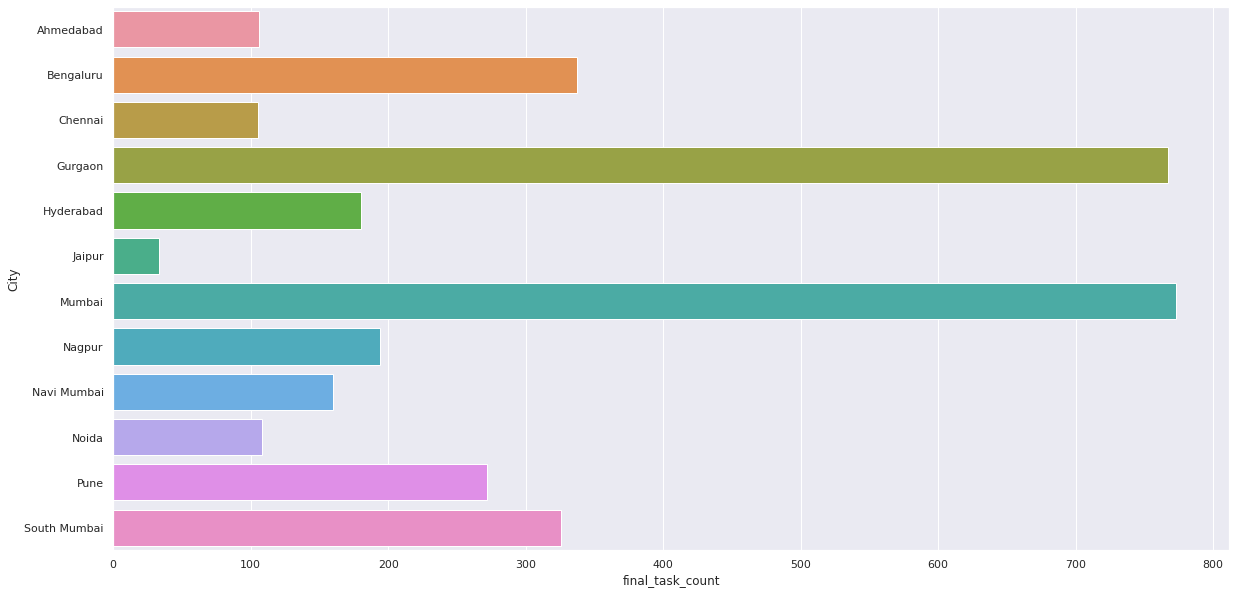

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x = 'final_task_count',y = 'City', data = usage_summery,ci =None,estimator = max)
plt.show()

In [ ]:
px.pie(usage,usage.groupby('City').sum().index, usage.groupby('City').sum().final_meet_count, title = 'City wise Meeting Count',labels='City')

No handles with labels found to put in legend.


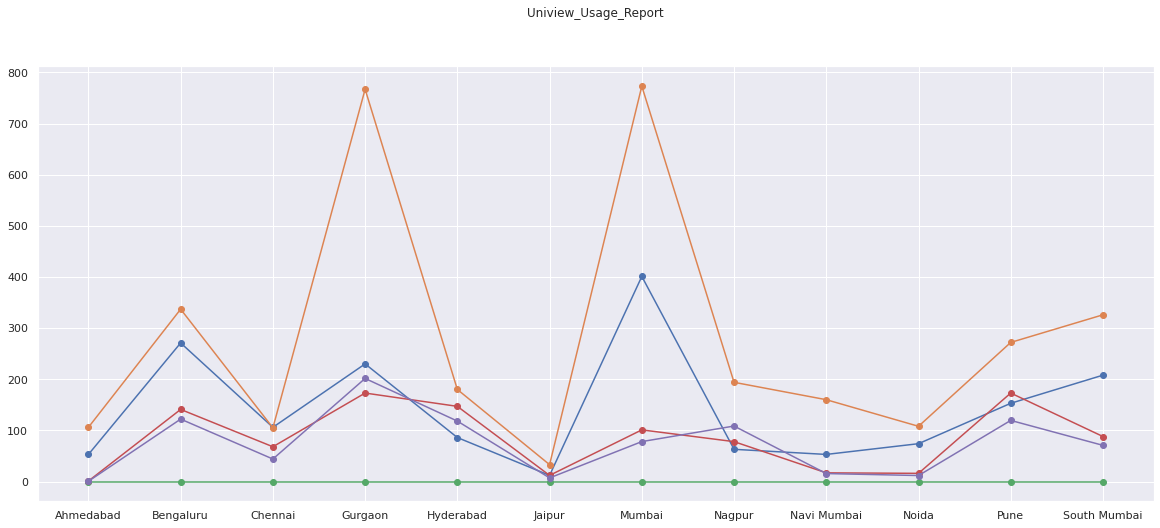

In [ ]:
fig = plt.figure(figsize= (20,8))
ax1 = plt.subplot(111)
ax1.plot(usage_summery.City, usage_summery.final_meet_count,'o-')
ax1.plot(usage_summery.City, usage_summery.final_task_count,'o-')
ax1.plot(usage_summery.City, usage_summery['Total Leads'],'o-')
ax1.plot(usage_summery.City, usage_summery['Total Calls Dialled'],'o-')
ax1.plot(usage_summery.City, usage_summery['Agent Talk Time (in Mins)'],'o-') 

ax1.legend(bbox_to_anchor = (0.84,1.1), frameon = False, ncol=10)
plt.title("Uniview_Usage_Report", y=1.1)      
plt.show()

#📕 **Distance MTD**

In [65]:
def changeDateTimeFormat(row):
  return pd.to_datetime(row, errors='coerce')

def changeDateFormat(row):
  return pd.to_datetime(row, errors='coerce').dt.date

DumpDate = "24 August 2022"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

In [66]:
DumpDate = "01 September 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Sep 2021/"
Aug = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Aug[['day','first_time','last_time']] = Aug[['day','first_time','last_time']].apply(changeDateTimeFormat)
Aug['num_points'] = Aug['last_time'] - Aug['first_time']
Aug['num_points'] = (Aug['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Aug['total_distance'] = Aug['total_distance'].round(2)

Aug.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Aug = Aug[['Emp_Email','Date','total_distance','num_points']]
Aug['Emp_Email'] = Aug['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 October 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Oct 2021/"
Sep = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Sep[['day','first_time','last_time']] = Sep[['day','first_time','last_time']].apply(changeDateTimeFormat)
Sep['num_points'] = Sep['last_time'] - Sep['first_time']
Sep['num_points'] = (Sep['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Sep['total_distance'] = Sep['total_distance'].round(2)

Sep.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Sep = Sep[['Emp_Email','Date','total_distance','num_points']]
Sep['Emp_Email'] = Sep['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 November 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Nov 2021/"
Oct = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Oct[['day','first_time','last_time']] = Oct[['day','first_time','last_time']].apply(changeDateTimeFormat)
Oct['num_points'] = Oct['last_time'] - Oct['first_time']
Oct['num_points'] = (Oct['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Oct['total_distance'] = Oct['total_distance'].round(2)

Oct.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Oct = Oct[['Emp_Email','Date','total_distance','num_points']]
Oct['Emp_Email'] = Oct['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 December 2021"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Dec 2021/"
Nov = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Nov[['day','first_time','last_time']] = Nov[['day','first_time','last_time']].apply(changeDateTimeFormat)
Nov['num_points'] = Nov['last_time'] - Nov['first_time']
Nov['num_points'] = (Nov['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Nov['total_distance'] = Nov['total_distance'].round(2)

Nov.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Nov = Nov[['Emp_Email','Date','total_distance','num_points']]
Nov['Emp_Email'] = Nov['Emp_Email'].str.lower().replace(" ", "")



DumpDate = "01 January 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/"
Dec = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Dec[['day','first_time','last_time']] = Dec[['day','first_time','last_time']].apply(changeDateTimeFormat)
Dec['num_points'] = Dec['last_time'] - Dec['first_time']
Dec['num_points'] = (Dec['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Dec['total_distance'] = Dec['total_distance'].round(2)

Dec.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Dec = Dec[['Emp_Email','Date','total_distance','num_points']]
Dec['Emp_Email'] = Dec['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "25 January 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jan 2022/"
Jan25 = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Jan25[['day','first_time','last_time']] = Jan25[['day','first_time','last_time']].apply(changeDateTimeFormat)
Jan25['num_points'] = Jan25['last_time'] - Jan25['first_time']
Jan25['num_points'] = (Jan25['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Jan25['total_distance'] = Jan25['total_distance'].round(2)

Jan25.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Jan25 = Jan25[['Emp_Email','Date','total_distance','num_points']]
Jan25['Emp_Email'] = Jan25['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 February 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Feb 2022/"
Jan = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Jan[['day','first_time','last_time']] = Jan[['day','first_time','last_time']].apply(changeDateTimeFormat)
Jan['num_points'] = Jan['last_time'] - Jan['first_time']
Jan['num_points'] = (Jan['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Jan['total_distance'] = Jan['total_distance'].round(2)

Jan.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Jan = Jan[['Emp_Email','Date','total_distance','num_points']]
Jan['Emp_Email'] = Jan['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 March 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Mar 2022/"
Feb = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Feb[['day','first_time','last_time']] = Feb[['day','first_time','last_time']].apply(changeDateTimeFormat)
Feb['num_points'] = Feb['last_time'] - Feb['first_time']
Feb['num_points'] = (Feb['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Feb['total_distance'] = Feb['total_distance'].round(2)

Feb.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Feb = Feb[['Emp_Email','Date','total_distance','num_points']]
Feb['Emp_Email'] = Feb['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "01 April 2022"
dump_name = 'Agent Distance MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Apr 2022/"
#Mar = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Apr 2022/01 April 2022/Hari/Agent Distances MTD.csv"
Mar = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Mar[['day','first_time','last_time']] = Mar[['day','first_time','last_time']].apply(changeDateTimeFormat)
Mar['num_points'] = Mar['last_time'] - Mar['first_time']
Mar['num_points'] = (Mar['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Mar['total_distance'] = Mar['total_distance'].round(2)

Mar.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Mar = Mar[['Emp_Email','Date','total_distance','num_points']]
Mar['Emp_Email'] = Mar['Emp_Email'].str.lower().replace(" ", "")



DumpDate = "30 April 2022"
dump_name = 'Agent Distance MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Apr 2022/"
#Mar = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Apr 2022/01 April 2022/Hari/Agent Distances MTD.csv"
Apr = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Apr[['day','first_time','last_time']] = Apr[['day','first_time','last_time']].apply(changeDateTimeFormat)
Apr['num_points'] = Apr['last_time'] - Apr['first_time']
Apr['num_points'] = (Apr['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Apr['total_distance'] = Apr['total_distance'].round(2)

Apr.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Apr = Apr[['Emp_Email','Date','total_distance','num_points']]
Apr['Emp_Email'] = Apr['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "31 May 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/May 2022/"
#Mar = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Apr 2022/01 April 2022/Hari/Agent Distances MTD.csv"
May = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
May[['day','first_time','last_time']] = May[['day','first_time','last_time']].apply(changeDateTimeFormat)
May['num_points'] = May['last_time'] - May['first_time']
May['num_points'] = (May['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
May['total_distance'] = May['total_distance'].round(2)

May.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
May = May[['Emp_Email','Date','total_distance','num_points']]
May['Emp_Email'] = May['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "30 June 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jun 2022/"
Jun = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Jun[['day','first_time','last_time']] = Jun[['day','first_time','last_time']].apply(changeDateTimeFormat)
Jun['num_points'] = Jun['last_time'] - Jun['first_time']
Jun['num_points'] = (Jun['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Jun['total_distance'] = Jun['total_distance'].round(2)

Jun.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Jun = Jun[['Emp_Email','Date','total_distance','num_points']]
Jun['Emp_Email'] = Jun['Emp_Email'].str.lower().replace(" ", "")


DumpDate = "30 July 2022"
dump_name = 'Agent Distances MTD'
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jul 2022/"
Jul = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
Jul[['day','first_time','last_time']] = Jul[['day','first_time','last_time']].apply(changeDateTimeFormat)
Jul['num_points'] = Jul['last_time'] - Jul['first_time']
Jul['num_points'] = (Jul['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Jul['total_distance'] = Jul['total_distance'].round(2)

Jul.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Jul = Jul[['Emp_Email','Date','total_distance','num_points']]
Jul['Emp_Email'] = Jul['Emp_Email'].str.lower().replace(" ", "")


today = date.today()
DumpDate_1 = today.strftime("%d %B %Y")
dump_name = 'Agent Distances MTD'

file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"
Aug = pd.read_csv(file_path + DumpDate_1 + "/Hari/"+ dump_name +".csv",parse_dates=True)
#Jul = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jul 2022/30 Jule 2022/Hari/Agent Distances MTD.csv"
Aug[['day','first_time','last_time']] = Aug[['day','first_time','last_time']].apply(changeDateTimeFormat)
Aug['num_points'] = Aug['last_time'] - Aug['first_time']
Aug['num_points'] = (Aug['num_points']/pd.Timedelta(minutes=1)/15).astype(int)
Aug['total_distance'] = Aug['total_distance'].round(2)

Aug.rename({'email':'Emp_Email', 'day':'Date', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Aug = Aug[['Emp_Email','Date','total_distance','num_points']]
Aug['Emp_Email'] = Aug['Emp_Email'].str.lower().replace(" ", "")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [67]:
DumpDate_1

'24 August 2022'

In [68]:
Distance=Aug.append(Sep)
Distance=Distance.append(Oct)
Distance=Distance.append(Nov)
Distance=Distance.append(Dec)
Distance=Distance.append(Jan25)
Distance=Distance.append(Jan)
Distance=Distance.append(Feb)
Distance=Distance.append(Mar)
Distance=Distance.append(Apr)
Distance=Distance.append(May)
Distance=Distance.append(Jun)
Distance=Distance.append(Jul)
Distance=Distance.append(Aug)

In [69]:
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)

Hr1 = hr[['Emp Code','Employee Name','Official Email ID','Role','On Field Status','Status','Location']]

Hr1 = Hr1[Hr1['Status']=="Active"]
Hr1 = Hr1[Hr1['On Field Status'] == "On Field"]

Hr1 = Hr1[(Hr1['Role'] == "ASM") | (Hr1['Role'] == "Senior ASM") | (Hr1['Role'] == "AASM") | (Hr1['Role'] == "AASM IC") | 
      (Hr1['Role'] == "Senior TSM") | (Hr1['Role'] == "TSM") | (Hr1['Role'] == "Sales Executive") | (Hr1['Role'] == "ASM IC") | (Hr1['Role'] == "Senior ASM") |
      (Hr1['Role'] == "KAM")| (Hr1['Role'] == "Senior KAM")| (Hr1['Role'] == "FSD Executive")| (Hr1['Role'] == "Senior FSD Executive")|(Hr1['Role'] == "Vendor Partnership & Alliances") |
      (Hr1['Role'] == "North Head - Brand Partnerships and Alliances")|(Hr1['Role'] == "Senior Manager - Brand Partnership & Alliances")|(Hr1['Role'] == "Senior Business Development Manager") |
      (Hr1['Role'] == "Manager - Explore Partnership")|(Hr1['Role'] == "Senior Brand Partnership & Alliances")|(Hr1['Role'] == "Business Development Manager")|(Hr1['Role'] == "Brand Partnership & Alliances") |
      (Hr1['Role'] == "Director - Monetization")|(Hr1['Role'] == "Senior Manager - Vendor Partnership & Alliances")|(Hr1['Role'] == "Business Development Executive")|(Hr1['Role'] == "City Head") |
      (Hr1['Role'] == "Manager - Brand Partnership & Alliances")|(Hr1['Role'] == "Associate Director")|(Hr1['Role'] == "PIA Associate")|(Hr1['Role'] == "Manager - Vendor Partnership & Alliances")|
      (Hr1['Role'] == "Regional Manager - Brand Partnership and Alliances")]


Hr1 = Hr1.rename(columns={'Official Email ID':'Emp_Email'})
Hr1
Hr2 = Hr1[['Emp_Email','Role','Location']]
Hr2['Emp_Email'] = Hr2['Emp_Email'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
Distance_merge = pd.merge(Hr2,Distance,how='left',left_on='Emp_Email',right_on='Emp_Email')
Distance_1 = Distance_merge.groupby(['Date','Role','Location'],sort=True, as_index=False).agg({'Emp_Email':'count','total_distance':'sum','num_points':'sum'})
Distance_1['Year'] = pd.DatetimeIndex(Distance_1['Date']).year
Distance_1['Month'] = pd.DatetimeIndex(Distance_1['Date']).month
Distance_1['day'] = pd.DatetimeIndex(Distance_1['Date']).day
Distance_1 = Distance_1.rename(columns={'Location':'City','Emp_Email':'Emp Email ID'})

In [71]:
Distance_1 = Distance_1[['Role','Date','City','num_points','total_distance','Emp Email ID','day','Month','Year']]
Distance_1.loc[Distance_1['City'] == 'Bengaluru','City'] = 'Bangalore'
Distance_1

,Role,Date,City,num_points,total_distance,Emp Email ID,day,Month,Year
0,AASM,2021-09-01,Bangalore,113.0,0.80,2,1,9,2021
1,AASM,2021-09-01,Chennai,111.0,0.13,2,1,9,2021
2,AASM,2021-09-01,Gurgaon,115.0,4.44,2,1,9,2021
3,AASM,2021-09-01,Hyderabad,58.0,0.00,1,1,9,2021
4,AASM,2021-09-01,Mumbai,293.0,40.53,5,1,9,2021
...,...,...,...,...,...,...,...,...,...
29340,TSM,2022-08-23,South Mumbai,1360.0,627.74,30,23,8,2022
29341,KAM,2022-08-24,Navi Mumbai,0.0,0.00,2,24,8,2022
29342,KAM,2022-08-25,Kolkata,20.0,0.26,2,25,8,2022
29343,KAM,2022-08-29,Kolkata,0.0,0.00,2,29,8,2022


In [72]:
Hr3 = Hr2
D1 = pd.merge(Hr3,Distance,how='left',left_on='Emp_Email',right_on='Emp_Email')
Dist_1 = D1.groupby(['Emp_Email','Date','Role','Location'],sort=True, as_index=False).agg({'total_distance':'sum','num_points':'sum'})
Dist_1['Year'] = pd.DatetimeIndex(Dist_1['Date']).year
Dist_1['Month'] = pd.DatetimeIndex(Dist_1['Date']).month
Dist_1['day'] = pd.DatetimeIndex(Dist_1['Date']).day
Dist_1 = Dist_1.rename(columns={'Location':'City','Emp_Email':'Emp Email ID'})

In [73]:
Dist_1

,Emp Email ID,Date,Role,City,total_distance,num_points,Year,Month,day
0,aapa.parab@nobroker.in,2021-09-01,KAM,Navi Mumbai,0.41,57.0,2021,9,1
1,aapa.parab@nobroker.in,2021-09-02,KAM,Navi Mumbai,24.33,57.0,2021,9,2
2,aapa.parab@nobroker.in,2021-09-03,KAM,Navi Mumbai,19.76,58.0,2021,9,3
3,aapa.parab@nobroker.in,2021-09-04,KAM,Navi Mumbai,29.98,54.0,2021,9,4
4,aapa.parab@nobroker.in,2021-09-05,KAM,Navi Mumbai,28.04,56.0,2021,9,5
...,...,...,...,...,...,...,...,...,...
107596,zuber.ismail@nobroker.in,2022-08-19,KAM,Mumbai,32.06,108.0,2022,8,19
107597,zuber.ismail@nobroker.in,2022-08-20,KAM,Mumbai,46.44,108.0,2022,8,20
107598,zuber.ismail@nobroker.in,2022-08-21,KAM,Mumbai,39.22,106.0,2022,8,21
107599,zuber.ismail@nobroker.in,2022-08-22,KAM,Mumbai,26.34,108.0,2022,8,22


In [74]:
from gspread_dataframe import get_as_dataframe, set_with_dataframe

spreadSheetId = "1Exlrodd-NOVP-BzzXKtEbQ2L-V7kpTyQzHwZXrvynuI"
rangeName = "Distance_Travel"

column = 1
row = 1

wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet
set_with_dataframe(ws, Dist_1, row=row, col=column, include_index=False, include_column_header=True)

In [75]:
from gspread_dataframe import get_as_dataframe, set_with_dataframe

spreadSheetId = "1-OGpSnP-Ok5FgQ7G2Rn_1OTqGal5EcI-xfuGD1BV9wo"
rangeName = "Distance_Group"

column = 1
row = 1

#gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)

#Clearing Sheet
ws.clear()

#Writting to sheet
set_with_dataframe(ws, Distance_1, row=row, col=column, include_index=False, include_column_header=True)

#📕**Sales MTD Input & Output**

In [76]:
start = "2022-08-01"
end = "2022-08-31"

DumpDate = "24 August 2022"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

##**Import Dataset**##

In [77]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

In [78]:
# ASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("ASM")
df_1 = ws.get_all_values()
asm = pd.DataFrame(df_1)
asm.columns = asm.iloc[0]
asm = asm.drop(0).reset_index()

asm1 = asm.loc[asm['Month']=="8"]
asm = asm1[['ASM Mail','City']].reset_index()

In [79]:
# AASM list from Payout Calculation Sheet
wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("AASM")
df_1 = ws.get_all_values()
aasm = pd.DataFrame(df_1)
aasm.columns = aasm.iloc[0]
aasm = aasm.drop(0).reset_index()

aasm1 = aasm.loc[aasm['Month']=="8"]
aasm = aasm1[['EMPCode','TSM mail-id','Emp City','Reporting supervisor Mail ID','Role']]
aasm.rename({'EMPCode':'Emp Code','TSM mail-id':'Official Email ID','Emp City':'City','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True,axis=1)
aasm.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(22, 5)

In [80]:
# TSM list from Payout Calculation Sheet

wb = gc.open_by_key("1EcV-4vhUf9hpMEWP1hpo6Jl3FU8O3VEFani7l47v8VM")
ws = wb.worksheet("TSM")
df_2 = ws.get_all_values()
tsm = pd.DataFrame(df_2)
tsm.columns = tsm.iloc[0]
tsm = tsm.drop(0).reset_index()

tsm1 = tsm.loc[tsm['Month']=="8"]
tsm = tsm1[['TSM mail-id','Emp City','Reporting supervisor Mail ID']]
tsm.rename({'TSM mail-id':'Official Email ID','Reporting supervisor Mail ID':'Reporting Supervisor E-mail ID'},inplace=True, axis=1)
tsm['Official Email ID'] = tsm['Official Email ID'].str.lower()
tsm.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(203, 3)

In [81]:
## Demo

wb = gc.open_by_key("1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c")
ws = wb.worksheet("masterDEMO")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()
demo.columns
demo = demo[['Form Filled Date', 'Form Filled By', 'Emp Code','Emp Email ID', 'City', 'Role', 'Manager Email ID', 'Emp Status', 'DOJ','Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type',
       'Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date','Product Demo Given', 'Recording Link', 'Demo Date', 'Demo Type','Demo Society POC', 'Demo Participants', 'Demo Duration (in mins)',
       'Demo Mode', 'Demo Participant Count', 'Demo Team Type','Competitor Name', 'Competitor Product']]
demo.rename(columns={'Demo Date':'Date_main'},inplace=True)

In [82]:
## Demo Audit
wb = gc.open_by_key("17RoUsBX018AWCzl51xH6PB_NBnPDjSnNorlv0v5_Rn4")
ws = wb.worksheet("Form Responses 1")
md = ws.get_all_values()
demoaudit = pd.DataFrame(md)
demoaudit.columns = demoaudit.iloc[0]
demoaudit = demoaudit.drop(0).reset_index()

demoaudit = demoaudit[['Timestamp', 'Email Address', 'Enter the full name of the TSM',
       'Enter the email address of the TSM', 'Enter Auditor name below','City', 'Sales Leader', 'Date of Audit', 'Date of Demo']]

demoaudit.rename({'Enter the email address of the TSM':'Official Email ID','Email Address':'Reporting Supervisor E-mail ID'}, inplace = True, axis = 1)

demoaudit['Official Email ID'] = demoaudit['Official Email ID'].str.lower()

demoaudit['Timestamp'] = pd.to_datetime(demoaudit['Timestamp'])
demoaudit['Timestamp_Split'] = demoaudit['Timestamp'].dt.date

demoaudit['Timestamp_Split'] = pd.to_datetime(pd.to_datetime(demoaudit['Timestamp_Split']).dt.date)
demoaudit['Date_main'] = demoaudit['Timestamp_Split']


demoaudit['Date_main'] = pd.to_datetime(demoaudit['Date_main'])

demoaudit = demoaudit.loc[(demoaudit['Date_main']>=start)&(demoaudit['Date_main']<=end)]
demoaudit.shape

(285, 11)

In [83]:
## Meeting
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

meeting1 = meeting.loc[(meeting['start_date']>=start)&(meeting['start_date']<=end)]
meeting2 = meeting1.loc[meeting['status']=="completed"]
meeting_final = meeting2.groupby(['employee_code','start_date']).agg({'Lead_id':'count'}).reset_index()
meeting_final = meeting_final.rename(columns={'employee_code':'Emp Code','Lead_id':'completed meetings'})
meeting_final['Emp Code'] = meeting_final['Emp Code'].str.upper()
meeting_final.rename(columns={'start_date':'Date_main'},inplace=True)
meeting_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Emp Code            3038 non-null   object        
 1   Date_main           3038 non-null   datetime64[ns]
 2   completed meetings  3038 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 71.3+ KB


In [84]:
## Task Data
dump_name = 'Tasks in sales hierarchy'
task = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

task['Created on'] = pd.to_datetime(task['Created on']).dt.date
task['Created on'] = pd.to_datetime(task['Created on'])

task1 = task.loc[(task['Created on']>=start)&(task['Created on']<=end)]
task2 = task1.loc[task['Task status']=="closed"]
task_final = task2.groupby(['Task owner','Created on']).agg({'Lead id':'count'}).reset_index()
task_final = task_final.rename(columns = {'Task owner':'Official Email ID','Lead id':'closed task'})
task_final['Official Email ID'] = task_final['Official Email ID'].str.lower()
task_final.rename(columns={'Created on':'Date_main'},inplace=True)
task_final['Date_main'] = pd.to_datetime(task_final['Date_main'].dt.date)
task_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Official Email ID  2964 non-null   object        
 1   Date_main          2964 non-null   datetime64[ns]
 2   closed task        2964 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 69.6+ KB


In [85]:
## Lead Created
dump_name = 'MIS-Tab1-Prospect-A new 16 dec based on last updated date'

Lead = pd.read_csv(file_path + DumpDate + "/Veena/"+ dump_name +".csv",parse_dates=True)

Lead = Lead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use','created_by_hierarchy','society name id']]

Lead.rename(columns={'created_on':'Date_main'},inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [86]:
'''
dump_name = 'MIS-Tab1-Prospect-A new 16 dec based on last updated date'
upLead = pd.read_csv(file_path + DumpDate + "/Veena/"+ dump_name +".csv",parse_dates=True)

uplead = upLead[['lead_id', 'employee_code','created_on', 'last_updated_on', 'lead_city','is_prospect', 'lead_status', 'lead_sub_status','lead_warmth', 'close_date',
       'source', 'tag', 'interested_feature', 'mc_election_date', 'number_of_apartments' ,
       'has_existing_vms', 'vms_software_in_use', 'has_existing_erp','erp_software_in_use','created_by_hierarchy','society name id']]

#uplead = uplead[uplead['created_by_hierarchy']=='sales_hierarchy']
uplead = uplead[~(uplead['employee_code'].isna())]
uplead[['created_on','last_updated_on','close_date','mc_election_date']] = uplead[['created_on','last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
uplead['created_on'] = pd.to_datetime(pd.to_datetime(uplead['created_on']).dt.date)
lead = uplead.loc[(uplead['created_on']>=start)&(uplead['created_on']<=end)]
lead.to_csv("uplead.csv")
'''

'\ndump_name = \'MIS-Tab1-Prospect-A new 16 dec based on last updated date\'\nupLead = pd.read_csv(file_path + DumpDate + "/Veena/"+ dump_name +".csv",parse_dates=True)\n\nuplead = upLead[[\'lead_id\', \'employee_code\',\'created_on\', \'last_updated_on\', \'lead_city\',\'is_prospect\', \'lead_status\', \'lead_sub_status\',\'lead_warmth\', \'close_date\',\n       \'source\', \'tag\', \'interested_feature\', \'mc_election_date\', \'number_of_apartments\' ,\n       \'has_existing_vms\', \'vms_software_in_use\', \'has_existing_erp\',\'erp_software_in_use\',\'created_by_hierarchy\',\'society name id\']]\n\n#uplead = uplead[uplead[\'created_by_hierarchy\']==\'sales_hierarchy\']\nuplead = uplead[~(uplead[\'employee_code\'].isna())]\nuplead[[\'created_on\',\'last_updated_on\',\'close_date\',\'mc_election_date\']] = uplead[[\'created_on\',\'last_updated_on\',\'close_date\',\'mc_election_date\']].apply(changeDateFormat)\nuplead[\'created_on\'] = pd.to_datetime(pd.to_datetime(uplead[\'created_on

In [87]:
## Agent Distance MTD
dump_name = 'Agent Distances MTD'

Distance = pd.read_csv(file_path + DumpDate + "/Hari/"+ dump_name +".csv",parse_dates=True)
#Distance = pd.read_csv("/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Jul 2022/30 July 2022/Hari/Agent Distances MTD.csv",parse_dates=True)
Distance['day']=pd.to_datetime(Distance['day'])

Distance['total_distance'] = Distance['total_distance'].round(2)
Distance = Distance.loc[(Distance['day']>=start)&(Distance['day']<=end)]

Distance.rename({'email':'Emp_Email', 'day':'Date_main', 'total_distance': 'total_distance'}, inplace = True, axis = 1)
Distance = Distance[['Emp_Email','Date_main','total_distance']]
Distance['Emp_Email'] = Distance['Emp_Email'].str.lower().replace(" ", "")


In [88]:
## Closure Data
wb = gc.open_by_key("1O6XP_LqxlymjASE-0mM2nxju4bT2avUTVwyeqnX_MFk")
ws = wb.worksheet("LeadMaster")
md = ws.get_all_values()
closure = pd.DataFrame(md)
closure.columns = closure.iloc[0]
closure = closure.drop(0).reset_index()
closure = closure.loc[(closure['Closure Month']=='8') & (closure['year']=='2022')]
closure.shape
closure = closure[['Closure Type','Closure Month','Closure Date','Closure Number','Closure Form Filled By','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Society Name (Sales)','Closure City',
                   'Sales Product','HO Product','Sold Flats','VMS Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO','Lead Type']]

closure['Closure Date'] = pd.to_datetime(closure['Closure Date'])
closure.rename(columns={'Closure Date':'Date_main'},inplace=True)


In [89]:
closure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Closure Type                       209 non-null    object        
 1   Closure Month                      209 non-null    object        
 2   Date_main                          209 non-null    datetime64[ns]
 3   Closure Number                     209 non-null    object        
 4   Closure Form Filled By             209 non-null    object        
 5   Closure Done By (Primary Email)    209 non-null    object        
 6   Primary BD City                    209 non-null    object        
 7   Primary BD Role                    209 non-null    object        
 8   Closure Done By (Secondary Email)  209 non-null    object        
 9   Secondary BD City                  209 non-null    object        
 10  Secondary BD Role                  209

##**Data Pre-processing & Calculation**##

In [90]:
# Lead Calculation

#Lead = Lead[Lead['created_by_hierarchy']=='sales_hierarchy']
Lead = Lead[~(Lead['employee_code'].isna())]
Lead[['last_updated_on','close_date','mc_election_date']] = Lead[['last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']].apply(cleanText)

Lead.rename({'lead_id':'Lead ID', 'employee_code':'Emp Code', 'last_updated_on':'Lead Last Update Date', 'lead_city':'Lead City',
             'is_prospect':'Propect (yes/no)', 'lead_status':'Lead Status', 'lead_sub_status':'Lead Sub Status','lead_warmth':'Lead Warmth', 'close_date':'Lead Close Date',
       'source':'Lead Source', 'tag':'Lead Tag','society name id':'Society ID','number_of_apartments':'Lead Flats'}, inplace= True, axis = 1)

Lead = Lead[['Lead ID','Emp Code','Date_main','mc_election_date','Lead City']]
Lead['Date_main'] = pd.to_datetime(pd.to_datetime(Lead['Date_main']).dt.date)
Lead = Lead.loc[(Lead['Date_main']>=start)&(Lead['Date_main']<=end)]

Lead_tag = pd.merge(Lead,hr,how='left',on='Emp Code')

Leadgrp = Lead_tag.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID','Lead City','Date_main']).agg({'Lead ID': 'count','mc_election_date':'count'}).reset_index()
Leadgrp = Leadgrp.rename(columns={'Lead ID':'Lead Created','mc_election_date':'Election Date Count'})
#md1 = md[md['Emp Status']=='Active']
Leadgrp = Leadgrp.groupby(['Official Email ID','Reporting Supervisor E-mail ID','Date_main']).agg({'Lead Created':'sum','Election Date Count':'sum'}).reset_index()


In [91]:
Lead[Lead['mc_election_date'].notna()].shape

(2918, 5)

In [92]:
# Demo Calculation

demo['Form Filled Date'] = pd.to_datetime(pd.to_datetime(demo['Form Filled Date']).dt.date)
demo['DOJ'] = pd.to_datetime(pd.to_datetime(demo['DOJ']).dt.date)
demo['Meeting Creation Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Creation Date']).dt.date)
demo['Meeting Start Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting Start Date']).dt.date)
demo['Meeting End Date'] = pd.to_datetime(pd.to_datetime(demo['Meeting End Date']).dt.date)
demo['Date_main'] = pd.to_datetime(pd.to_datetime(demo['Date_main']).dt.date)

demo = demo.loc[(demo['Date_main']>=start)&(demo['Date_main']<=end)]
demo = demo.loc[demo['Meeting Status']=="completed"]

demo = demo.loc[~(demo['Demo Team Type']=="")]

demo = demo.loc[~(demo['Emp Email ID']=="")]
demo = demo.rename(columns={'Emp Email ID':'Official Email ID','Manager Email ID':'Reporting Supervisor E-mail ID'})
md1 = demo.groupby(['Official Email ID','Role','Reporting Supervisor E-mail ID','Date_main']).agg({'Meeting ID':'count'}).reset_index()
Final_demo_count = md1.rename(columns = {'Meeting ID':'Total_Demo_Count'})

final_demo = Final_demo_count.groupby(['Official Email ID','Reporting Supervisor E-mail ID','Date_main']).agg({'Total_Demo_Count':'sum'}).reset_index()
final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Official Email ID               1404 non-null   object        
 1   Reporting Supervisor E-mail ID  1404 non-null   object        
 2   Date_main                       1404 non-null   datetime64[ns]
 3   Total_Demo_Count                1404 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 44.0+ KB


In [93]:
#Demo audit count Calculation

demoaudit = demoaudit.groupby(['Reporting Supervisor E-mail ID','Official Email ID','Date_main']).agg({'Timestamp_Split':'count'}).reset_index()
demoaudit['Reporting Supervisor E-mail ID'] = demoaudit['Reporting Supervisor E-mail ID'].str.lower()
demoaudit['Official Email ID'] = demoaudit['Official Email ID'].str.lower()
demoaudit = demoaudit.rename(columns={'Timestamp_Split':'Demo Audit Count'})
demoaudit

,Reporting Supervisor E-mail ID,Official Email ID,Date_main,Demo Audit Count
0,amit.bind@nobroker.in,altaf.shaikh@nobroker.in,2022-08-18,1
1,amit.bind@nobroker.in,arjun.vinayak@nobroker.in,2022-08-18,1
2,amit.bind@nobroker.in,arjun.vinayak@nobroker.in,2022-08-23,1
3,amit.bind@nobroker.in,mobin.shaikh@nobroker.in,2022-08-18,1
4,amit.bind@nobroker.in,pritesh.kankodia@nobroker.in,2022-08-23,1
...,...,...,...,...
240,vishal.shukla@nobroker.in,jatin.chawla@nobroker.in,2022-08-08,1
241,vishal.shukla@nobroker.in,jatin.chawla@nobroker.in,2022-08-14,1
242,vishal.shukla@nobroker.in,jatin.chawla@nobroker.in,2022-08-21,1
243,vishal.shukla@nobroker.in,pushkaraj.k@nobroker.in,2022-08-14,1


In [94]:
# Meeting, Tasks Completed Calculation
hr[['DOJ','LWD']] = hr[['DOJ','LWD']].apply(changeDateFormat)
hr['LWD'] = pd.to_datetime(hr['LWD'])
hr = hr.loc[~(hr['LWD']<"2021-11-1")]

hr['Official Email ID'] = hr['Official Email ID'].str.lower()
hr['Official Email ID'] = hr['Official Email ID'].str.strip()

tsmemail = pd.merge(tsm,hr,how = 'left', on = 'Official Email ID')
tsmdata = tsmemail[['Official Email ID','Emp Code','Location','Reporting Supervisor E-mail ID_x','Status','Department','Designation',]].fillna(0)
tsmdata = tsmdata.loc[tsmdata['Emp Code']!= 0]

meetingmerge = pd.merge(tsmdata,meeting_final,how = "left", on = "Emp Code").reset_index()

taskmerge = pd.merge(tsmdata,task_final,how = "left", on = 'Official Email ID').reset_index()

meetingmerge.rename({'Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID'},inplace =True, axis = 1)
taskmerge.rename({'Reporting Supervisor E-mail ID_x':'Reporting Supervisor E-mail ID'},inplace =True, axis = 1)

meetingmerge['Date_main'] = pd.to_datetime(meetingmerge['Date_main'])
taskmerge['Date_main'] = pd.to_datetime(taskmerge['Date_main'])

tsm_input = taskmerge.merge(meetingmerge,how='outer',on=['Official Email ID','Reporting Supervisor E-mail ID','Date_main']).reset_index()
tsm_input = tsm_input[['Official Email ID','Reporting Supervisor E-mail ID', 'Date_main','completed meetings', 'closed task']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [95]:
finaltsm = tsm_input.groupby(['Official Email ID','Reporting Supervisor E-mail ID','Date_main']).agg({'completed meetings':'sum','closed task':'sum'}).reset_index()
finaltsm

,Official Email ID,Reporting Supervisor E-mail ID,Date_main,completed meetings,closed task
0,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,2022-08-02,6.0,5.0
1,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,2022-08-03,6.0,6.0
2,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,2022-08-04,7.0,5.0
3,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,2022-08-05,5.0,5.0
4,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,2022-08-06,6.0,6.0
...,...,...,...,...,...
3041,yogesh.sood@nobroker.in,priya.grover@nobroker.in,2022-08-17,7.0,19.0
3042,yogesh.sood@nobroker.in,priya.grover@nobroker.in,2022-08-18,6.0,15.0
3043,yogesh.sood@nobroker.in,priya.grover@nobroker.in,2022-08-19,7.0,15.0
3044,yogesh.sood@nobroker.in,priya.grover@nobroker.in,2022-08-20,6.0,12.0


In [96]:
# Distance Travelled Calculation

Hr1 = hr[['Emp Code','Employee Name','Official Email ID','Reporting Supervisor E-mail ID','Role','On Field Status','Status','Location']]
Hr1 = Hr1[Hr1['Status']=="Active"]
Hr1 = Hr1[(Hr1['Role'] == "ASM") | (Hr1['Role'] == "AASM") | (Hr1['Role'] == "Senior TSM") | (Hr1['Role'] == "TSM") | (Hr1['Role'] == "ASM IC") | (Hr1['Role'] == "Senior ASM")
| (Hr1['Role'] == "Sales Executive")]

Hr1 = Hr1.rename(columns={'Official Email ID':'Emp_Email'})
Hr1
Hr2 = Hr1[['Emp_Email','Reporting Supervisor E-mail ID','Role','Location']]
Hr2['Emp_Email'] = Hr2['Emp_Email'].str.lower()

Distance_1 = pd.merge(Distance,Hr2,how='left',on=['Emp_Email'])
Distance_1 = Distance_1.groupby(['Emp_Email','Role','Reporting Supervisor E-mail ID','Date_main']).agg({'total_distance':'sum'}).reset_index()

Distance_1 = Distance_1.rename(columns={'Emp_Email':'Official Email ID','total_distance':'Distance Travelled'})
dist = Distance_1[['Official Email ID','Reporting Supervisor E-mail ID','Distance Travelled','Date_main']]
dist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Official Email ID,Reporting Supervisor E-mail ID,Distance Travelled,Date_main
0,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,0.47,2022-08-01
1,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,21.64,2022-08-02
2,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,14.86,2022-08-03
3,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,8.94,2022-08-04
4,aasifali.sabirali@nobroker.in,rakib.haldar@nobroker.in,35.27,2022-08-05
...,...,...,...,...
4959,yogesh.sood@nobroker.in,priya.grover@nobroker.in,42.79,2022-08-19
4960,yogesh.sood@nobroker.in,priya.grover@nobroker.in,20.47,2022-08-20
4961,yogesh.sood@nobroker.in,priya.grover@nobroker.in,90.30,2022-08-21
4962,yogesh.sood@nobroker.in,priya.grover@nobroker.in,21.57,2022-08-22


In [97]:
# Closure Data - Sold Flats & IPsHO

closure = closure[['Date_main','Closure Type','Closure Number','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flats','VMS Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO','Lead Type']]

closure['VMS Sold Flats'] = pd.to_numeric(closure['VMS Sold Flats'])

closure['Sold Flats'] = pd.to_numeric(closure['Sold Flats'])
closure['PrimaryIPsHO'] = pd.to_numeric(closure['PrimaryIPsHO'])
closure['SecondaryIPsHO'] = pd.to_numeric(closure['SecondaryIPsHO']) 
closure['IPs D4'] = pd.to_numeric(closure['IPs D4'])

#closure['Sold_Flats'] = closure.apply(lambda x:max(x['VMS Sold Flats'],x['Sold Flats']),axis=1)

closure['IP_D4'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['IPs D4']/2),closure['IPs D4'])
closure['Sold Flat'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['Sold Flats']/2),closure['Sold Flats'])
closure.info(0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date_main                          209 non-null    datetime64[ns]
 1   Closure Type                       209 non-null    object        
 2   Closure Number                     209 non-null    object        
 3   Closure Done By (Primary Email)    209 non-null    object        
 4   Primary BD City                    209 non-null    object        
 5   Primary BD Role                    209 non-null    object        
 6   Closure Done By (Secondary Email)  209 non-null    object        
 7   Secondary BD City                  209 non-null    object        
 8   Secondary BD Role                  209 non-null    object        
 9   Sold Flats                         209 non-null    int64         
 10  VMS Sold Flats                     178

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [98]:
# For Primery TSM

cl1 = closure[['Closure Type','Closure Number','Closure Done By (Primary Email)','Primary BD City','Primary BD Role','Sold Flat','IP_D4','PrimaryIPsHO','Date_main','Lead Type']]
cl1 = cl1.rename(columns={'Closure Done By (Primary Email)':'Official Email ID','Primary BD City':'City','PrimaryIPsHO':'IPsHO','Primary BD Role':'Role'})

# For Secendary TSM

cl2 = closure[['Closure Type','Closure Number','Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flat','IP_D4','SecondaryIPsHO','Date_main','Lead Type']]
cl2 = cl2.loc[(cl2['Closure Done By (Secondary Email)'])!=""]
cl2 = cl2.rename(columns={'Closure Done By (Secondary Email)':'Official Email ID','Secondary BD City':'City','Secondary BD Role':'Role','SecondaryIPsHO':'IPsHO'}).reset_index()

cl_merge = pd.concat([cl1,cl2], ignore_index=True, sort = False)
cl_merge.drop(['index'],axis = 1)

,Closure Type,Closure Number,Official Email ID,City,Role,Sold Flat,IP_D4,IPsHO,Date_main,Lead Type
0,New Closure,1025503,jai.kumar@nobroker.in,Pune,AASM,129.0,116.1,NaN,2022-08-23,City
1,New Closure,1025496,ganesh.k@nobroker.in,Bangalore,TSM,98.0,147.0,NaN,2022-08-23,City
2,New Closure,1025509,suraj.mistry@nobroker.in,Ahmedabad,TSM,146.5,439.5,NaN,2022-08-23,City
3,New Closure,1025508,harsh.trivedi@nobroker.in,Ahmedabad,SENIOR TSM,77.5,232.5,NaN,2022-08-23,City
4,New Closure,1025500,nitish.pandey@nobroker.in,Navi Mumbai,TSM,154.0,231.0,NaN,2022-08-23,City
...,...,...,...,...,...,...,...,...,...,...
234,Upsell (VMS/ERP),1025129,ansari.vali@nobroker.in,South Mumbai,SENIOR TSM,44.0,0.0,0.00,2022-08-09,City
235,New Closure,1025165,shlok.bedadewar@nobroker.in,South Mumbai,TSM,42.5,0.0,0.00,2022-08-08,City
236,New Closure,1025161,nitesh.dhiman@nobroker.in,South Mumbai,TSM,96.0,0.0,NaN,2022-08-07,City
237,Winback,1025070,mohanakrishnan.v@nobroker.in,Chennai,TSM,318.0,795.0,596.25,2022-08-05,City


In [99]:
cl_merge[cl_merge['Official Email ID']=="bhawya.kaur@nobroker.in"]

,Closure Type,Closure Number,Official Email ID,City,Role,Sold Flat,IP_D4,IPsHO,Date_main,Lead Type,index
227,New Closure,1025272,bhawya.kaur@nobroker.in,Bangalore,AASM,29.5,39.825,39.825,2022-08-13,Central,138.0
230,New Closure,1025336,bhawya.kaur@nobroker.in,Bangalore,AASM,178.5,267.750,NaN,2022-08-11,Central,157.0
231,New Closure,1025391,bhawya.kaur@nobroker.in,Bangalore,AASM,96.0,77.760,NaN,2022-08-11,Central,158.0
232,Winback,1025225,bhawya.kaur@nobroker.in,Bangalore,AASM,48.0,180.000,108.000,2022-08-10,Central,162.0


In [100]:
cl_merge1 = pd.merge(cl_merge, hr, how = 'left', on = 'Official Email ID').fillna(0)

cl_final = cl_merge1[['Closure Type','Closure Number', 'Official Email ID','Reporting Supervisor E-mail ID','City', 'Sold Flat', 'IP_D4','IPsHO','Date_main','Lead Type']]

cl_final['IP_D4'] = pd.to_numeric(cl_final['IP_D4'])
cl_final['IPsHO'] = pd.to_numeric(cl_final['IPsHO'])
cl_final = cl_final.groupby(['Closure Type','Official Email ID','Reporting Supervisor E-mail ID','Date_main','Lead Type']).agg({'Closure Number':'count','Sold Flat':'sum','IP_D4':'sum','IPsHO':'sum'}).reset_index()
cl_final = cl_final.rename(columns={'Closure Number':'Closure Count'})

cl_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Closure Type,Official Email ID,Reporting Supervisor E-mail ID,Date_main,Lead Type,Closure Count,Sold Flat,IP_D4,IPsHO
0,New Closure,abdul.rehman3@nobroker.in,sahil.sethi@nobroker.in,2022-08-20,City,1,90.0,0.000,0.000
1,New Closure,abhishek.neogi@nobroker.in,gaurav.kapoor@nobroker.in,2022-08-13,City,1,60.0,0.000,0.000
2,New Closure,abhishek.neogi@nobroker.in,gaurav.kapoor@nobroker.in,2022-08-21,City,1,60.0,120.000,0.000
3,New Closure,abhishek.sarkar@nobroker.in,bhawya.kaur@nobroker.in,2022-08-11,Central,2,274.5,345.510,0.000
4,New Closure,abhishek.sarkar@nobroker.in,bhawya.kaur@nobroker.in,2022-08-13,Central,1,29.5,39.825,39.825
...,...,...,...,...,...,...,...,...,...
205,Winback,nitish.pandey@nobroker.in,sujay.kumar@nobroker.in,2022-08-16,City,1,345.0,279.450,279.450
206,Winback,santosh.b@nobroker.in,rajarajan.s@nobroker.in,2022-08-05,City,1,318.0,795.000,596.250
207,Winback,suraj.mistry@nobroker.in,dishant.agrawal@nobroker.in,2022-08-18,Central,1,56.0,60.480,60.480
208,Winback,suraj.mistry@nobroker.in,dishant.agrawal@nobroker.in,2022-08-22,City,1,36.0,32.400,32.400


In [101]:
cl_final[cl_final['Official Email ID']=="bhawya.kaur@nobroker.in"]

,Closure Type,Official Email ID,Reporting Supervisor E-mail ID,Date_main,Lead Type,Closure Count,Sold Flat,IP_D4,IPsHO
30,New Closure,bhawya.kaur@nobroker.in,rohith.patil@nobroker.in,2022-08-11,Central,2,274.5,345.510,0.000
31,New Closure,bhawya.kaur@nobroker.in,rohith.patil@nobroker.in,2022-08-13,Central,1,29.5,39.825,39.825
202,Winback,bhawya.kaur@nobroker.in,rohith.patil@nobroker.in,2022-08-10,Central,1,48.0,180.000,108.000


##**Master Merge**##

In [102]:
mastermerge = [Leadgrp, final_demo, demoaudit, finaltsm, dist, cl_final]
merge_final = reduce(lambda left,right: pd.merge(left,right,on=["Official Email ID","Reporting Supervisor E-mail ID",'Date_main'],how="outer"), mastermerge)
merge_final = merge_final.replace(np.nan,"")

final = pd.merge(merge_final, hr, how = 'left', on = 'Official Email ID').fillna('')

final = final[['Official Email ID','Role','Location','Reporting Supervisor E-mail ID_y','Lead Type','Lead Created','Election Date Count','completed meetings','closed task',
               'Total_Demo_Count','Demo Audit Count','Distance Travelled','Closure Type','Closure Count','Sold Flat','IP_D4','IPsHO','Date_main']]
final[['Date_main']] = final[['Date_main']].apply(changeDateFormat)

final.loc[final['Location'] == 'Bengaluru','Location'] = 'Bangalore'
final = final.rename(columns={'Reporting Supervisor E-mail ID_y':'Reporting Supervisor E-mail ID'})
final = final[final['Role'].isin(['Sales Executive','TSM','Senior TSM', 'AASM','ASM', 'Senior ASM','City Head','CIty Head','AASM IC','TSM','Relationship Manager','ACH','DCH',""])]

#final = final.replace("",0)

In [103]:
spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "MTD_date_filter"


wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

# APPEND DATA TO SHEET
df = final
set_with_dataframe(ws, df)

#**Demo_Closure_Conversion**#

In [104]:
start = "2022-05-01"
end = "2022-08-24"

In [105]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]

hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ','Location', 'Department', 'Designation', 'Reporting Supervisor','Reporting Supervisor E-mail ID', 
         'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

In [106]:
# Demo
spreadsheet = "1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c"
range = "masterDEMO"
 
demos = get_data_df(spreadsheet,range)
demos = demos[['Lead ID','Meeting ID','Emp Email ID','Role','Manager Email ID','City','Meeting Status','Demo Date','Demo Duration (in mins)','Recording Link']]
demos['Demo Date'] = pd.to_datetime(pd.to_datetime(demos['Demo Date']).dt.date)
demos['Lead ID'] = demos['Lead ID'].str.strip()
demos.columns

Index(['Lead ID', 'Meeting ID', 'Emp Email ID', 'Role', 'Manager Email ID',
       'City', 'Meeting Status', 'Demo Date', 'Demo Duration (in mins)',
       'Recording Link'],
      dtype='object')

In [107]:
## Closure Data

wb = gc.open_by_key("1O6XP_LqxlymjASE-0mM2nxju4bT2avUTVwyeqnX_MFk")
ws = wb.worksheet("LeadMaster")
md = ws.get_all_values()
closure = pd.DataFrame(md)
closure.columns = closure.iloc[0]
closure = closure.drop(0).reset_index()
closure = closure.loc[(closure['Closure Date']>=start)&(closure['Closure Date']<=end)]
closure.shape

closure = closure[['Lead ID','Closure Type','Closure Month','Closure Date','Closure Number','Closure Form Filled By','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Society Name (Sales)','Closure City',
                   'Sales Product','HO Product','Sold Flats','VMS Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO']]

closure['Closure Date'] = pd.to_datetime(closure['Closure Date'])

In [108]:
closure = closure[['Lead ID','Closure Date','Closure Type','Closure Number','Closure City','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO']]

closure['Sold Flats'] = pd.to_numeric(closure['Sold Flats'])
closure['PrimaryIPsHO'] = pd.to_numeric(closure['PrimaryIPsHO'])
closure['SecondaryIPsHO'] = pd.to_numeric(closure['SecondaryIPsHO']) 
closure['IPs D4'] = pd.to_numeric(closure['IPs D4'])

closure['IP_D4'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['IPs D4']/2),closure['IPs D4'])
closure['Sold Flat'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['Sold Flats']/2),closure['Sold Flats'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [109]:
 #For Primery TSM

cl1 = closure[['Closure Type','Closure Date','Closure Number','Closure Done By (Primary Email)','Primary BD City','Primary BD Role','Sold Flat']]
cl1 = cl1.rename(columns={'Closure Done By (Primary Email)':'Official Email ID','Primary BD City':'City','PrimaryIPsHO':'IPsHO','Primary BD Role':'Role','Closure Date':'Date'})

# For Secendary TSM

cl2 = closure[['Closure Type','Closure Date','Closure Number','Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flat']]
cl2 = cl2.loc[(cl2['Closure Done By (Secondary Email)'])!=""]
cl2 = cl2.rename(columns={'Closure Done By (Secondary Email)':'Official Email ID','Secondary BD City':'City','Secondary BD Role':'Role','Closure Date':'Date'}).reset_index()

cl_merge = pd.concat([cl1,cl2], ignore_index=True, sort = False)
cl_merge.drop(['index'],axis = 1)

,Closure Type,Date,Closure Number,Official Email ID,City,Role,Sold Flat
0,New Closure,2022-08-23,1025503,jai.kumar@nobroker.in,Pune,AASM,129.0
1,New Closure,2022-08-23,1025496,ganesh.k@nobroker.in,Bangalore,TSM,98.0
2,New Closure,2022-08-23,1025509,suraj.mistry@nobroker.in,Ahmedabad,TSM,146.5
3,New Closure,2022-08-23,1025508,harsh.trivedi@nobroker.in,Ahmedabad,SENIOR TSM,77.5
4,New Closure,2022-08-23,1025500,nitish.pandey@nobroker.in,Navi Mumbai,TSM,154.0
...,...,...,...,...,...,...,...
1972,New Closure,2022-05-08,1023047,aditya.jain@nobroker.in,Gurgaon,AASM,373.0
1973,New Closure,2022-05-08,1022981,aditya.jain@nobroker.in,Gurgaon,AASM,378.0
1974,New Closure,2022-05-08,1022995,aditya.jain@nobroker.in,Gurgaon,AASM,204.5
1975,New Closure,2022-05-07,1022994,harsh.trivedi@nobroker.in,Ahmedabad,SENIOR TSM,41.0


In [110]:
# Demo done all TSM/AASM/ASM

d1 = demos
d1 = d1.rename(columns={'Emp Email ID':'Official Email ID','Demo Date':'Date'}).reset_index()

d2 = d1[['Official Email ID','Lead ID', 'Meeting ID','Role','City','Date']]
emp_demo=d2.dropna(subset=['Date'])
emp_demo = emp_demo.loc[(emp_demo['Date']>=start)&(emp_demo['Date']<=end)]

## Merging Demo and Closure done by Employee
merge_data = [emp_demo,cl_merge]
conv_final = reduce(lambda left,right: pd.merge(left,right,on=["Official Email ID",'Date','Role','City'],how="outer"), merge_data)
conv_final[['Date']] = conv_final[['Date']].apply(changeDateFormat)
conv_final = conv_final.replace(np.nan,"")
conv_final=conv_final.drop(['index'],axis = 1)


In [111]:
# Lead id, closure number and products sold

dump_name = 'Lead id, closure number and products sold'
lead_closure = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
lead_closure = lead_closure[['lead_id','closure_number','close_date']]
lead_closure[['close_date']] = lead_closure[['close_date']].apply(changeDateFormat)
lead_closure.rename({'lead_id':'Lead ID','closure_number':'Closure Number','close_date':'Signing Date'}, inplace = True, axis = 1)

lead_closure['Signing Date'] = pd.to_datetime(pd.to_datetime(lead_closure['Signing Date']).dt.date)
closure = lead_closure.loc[(lead_closure['Signing Date']>=start)&(lead_closure['Signing Date']<=end)]

In [112]:
merge1 = pd.merge(closure,demos, how = "left",on = "Lead ID")

In [113]:
final2 = merge1.dropna(subset=['Meeting ID'])
final2[['Signing Date','Demo Date']] = final2[['Signing Date','Demo Date']].apply(changeDateFormat)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [114]:
final2

,Lead ID,Closure Number,Signing Date,Meeting ID,Emp Email ID,Role,Manager Email ID,City,Meeting Status,Demo Date,Demo Duration (in mins),Recording Link
0,8a968a8282684596018291d902cb76a8,1025480,2022-08-23,8a968a82826845960182aa1e23871dd4,mehak.jain@nobroker.in,TSM,ritika.gurjar@nobroker.in,Gurgaon,completed,2022-08-17,20.00,https://firebasestorage.googleapis.com/v0/b/do...
1,8a968a8282684596018291d902cb76a8,1025480,2022-08-23,8a968a82826845960182aa1e23871dd4,mehak.jain@nobroker.in,TSM,ritika.gurjar@nobroker.in,Gurgaon,completed,2022-08-17,20,https://firebasestorage.googleapis.com/v0/b/do...
3,8a96ad8282b72c490182bf0345dd3990,1025478,2022-08-23,8a96988282bc52130182bf069ecb157b,ashwani.kumar2@nobroker.in,TSM,sujay.kumar@nobroker.in,Navi Mumbai,completed,2022-08-21,44.00,https://firebasestorage.googleapis.com/v0/b/do...
5,8a969386818c180601818f49aa050d21,1025475,2022-08-22,8a968382818c0b5201818f4afbb74f70,rohan.kumar@nobroker.in,TSM,sushant.jawale@nobroker.in,Pune,completed,2022-06-23,30.00,https://firebasestorage.googleapis.com/v0/b/do...
6,8a969386818c180601818f49aa050d21,1025475,2022-08-22,8a96ad8282b72c490182c033a0924c3a,rohan.kumar@nobroker.in,TSM,sushant.jawale@nobroker.in,Pune,cancelled,NaT,,
...,...,...,...,...,...,...,...,...,...,...,...,...
5810,8a968f9c807501b801807d89dade4506,1022947,2022-05-01,8a968f9c807501b801807d8a752d450c,jai.kumar@nobroker.in,AASM,santosh.lamani@nobroker.in,Pune,completed,2022-04-30,30.00,https://firebasestorage.googleapis.com/v0/b/do...
5811,8a968f9c807501b801807d89dade4506,1022947,2022-05-01,8a968f9c807501b801807d8a752d450c,jai.kumar@nobroker.in,AASM,santosh.lamani@nobroker.in,Pune,completed,2022-04-30,30,https://firebasestorage.googleapis.com/v0/b/do...
5812,8a96ac827fe4f1b1017fefcf0b053375,1022946,2022-05-01,8a96ac827fe4f1b1017fefcf7c86337b,akshay.sanjay@nobroker.in,TSM,ankit.nagda@nobroker.in,Mumbai,completed,2022-04-03,21,
5817,8a969a838050790601805a1ac5b0409c,1022943,2022-05-01,8a969f86806647400180696ff9c30824,akshay.sanjay@nobroker.in,TSM,ankit.nagda@nobroker.in,Mumbai,completed,2022-04-27,15,


In [115]:
empwise_demo2 = final2.groupby(['Emp Email ID','Role','Manager Email ID','City','Closure Number']).agg({'Meeting ID':pd.Series.nunique}).reset_index()
empwise_demo2

,Emp Email ID,Role,Manager Email ID,City,Closure Number,Meeting ID
0,,,,,1022956,1
1,,,,,1022972,1
2,,,,,1023080,1
3,,,,,1023082,1
4,,,,,1023110,1
...,...,...,...,...,...,...
2032,yogesh.sood@nobroker.in,TSM,priya.grover@nobroker.in,Gurgaon,1024633,1
2033,yogesh.sood@nobroker.in,TSM,priya.grover@nobroker.in,Gurgaon,1024794,1
2034,yogesh.sood@nobroker.in,TSM,priya.grover@nobroker.in,Gurgaon,1024805,1
2035,yogesh.sood@nobroker.in,TSM,priya.grover@nobroker.in,Gurgaon,1024910,1


In [116]:
# Write to sheet

spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "Demo Conversion"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(final2)
set_with_dataframe(ws, df)

#########################################

spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "Empwise_Demo_Clsoure"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(conv_final)
set_with_dataframe(ws, df)

#📕 **Static Script**

In [3]:
#script Pre-runs
backup_date = "24 August 2022"
drive_folder = "24 August 2022"
#Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
#Google Sheets
from google.colab import auth
auth.authenticate_user()

import pandas as pd
import numpy as np
import os
import sys
from datetime import datetime
import dateutil
from dateutil.parser import parse
import re
from functools import reduce
import gspread
#from oauth2client.client import GoogleCredentials 
#gc = gspread.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import set_with_dataframe

#get data from spreadsheetID and Range Name function
def get_data(spreadSheetId, rangeName):
    wb = gc.open_by_key(spreadSheetId)
    ws = wb.worksheet(rangeName)
    rows = ws.get_all_values()
    return rows
#get all data in a sheet as df and there 1st row things as the df labels.
#If sheets don't have their labels in the first row than we have to do it manuaaly as per the data
def get_data_df(spreadSheetId, rangeName):
  l = get_data(spreadSheetId, rangeName)
  ldf = pd.DataFrame.from_records(l[1:], columns = l[0])
  return ldf


Mounted at /content/gdrive


In [4]:

# Read HR Data 
spreadSheetId = "1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE"
rangeName = "Hood Headcount"
final_hr_data = get_data_df(spreadSheetId, rangeName)

# Read Var_Payout Data
spreadSheetId = "1UPhXcBdPYcq2ZCE4y2NSHNo3LHFSqDAgV1HuCO7Wj5I"
rangeName = "TSM/ASM - Variable Payout"
var_payout_data = get_data_df(spreadSheetId, rangeName)

# Read NBH Sales Master
spreadSheetId = "16j5O0DC1SIWqElPjiNWvww4UmwqqNTzMtic6gK3UdIA"
rangeName = "copy of responses"
final_data = get_data_df(spreadSheetId, rangeName)
final_data = final_data[['Uniview Closure Number (Current)','Locality']]

# Read copy of responses
spreadSheetId = "16j5O0DC1SIWqElPjiNWvww4UmwqqNTzMtic6gK3UdIA"
rangeName = "copy of responses"
society_data = get_data_df(spreadSheetId, rangeName)
society_data = society_data[['Uniview Closure Number (Current)','Society is of Complete 1BHK?','Total Devices (VMS+ERP)','Total Devices (VMS Only)']]

In [5]:
# Exprt to Drive
HR_Data =  "/content/gdrive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"+drive_folder+"/Akash/"
final_hr_data.to_csv(HR_Data+"Hood Headcount"+".csv")

# Export to Drive

Variable_Payout_Data =  "/content/gdrive/MyDrive/Insights_Datalake/TillAugRawMasters/Sales Targets/Variable Payout/January 2022/"
var_payout_data.to_csv(Variable_Payout_Data+"TSM_ASM - Variable Payout"+".csv")

# Locality

spreadSheetId = "1eyti4vepfvUG1nIk3OQuWqHKwlZfe5WLOjRELXBTuM0"
rangeName = "locality"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
df = pd.DataFrame(final_data)
set_with_dataframe(ws, df)

# Society having 1 bhk

spreadSheetId = "1TxHvh5WMBa_ZTry4lXhFjsyVx0J4hHUK_erip48OS18"
rangeName = "data"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
df = pd.DataFrame(society_data)
set_with_dataframe(ws, df)


# Hood Headcount
spreadSheetId = "1QLOS849fPNPVYYGND7MmnMivVf4o1VZEhLhJS89a17I"
rangeName = "HR"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(final_hr_data)
set_with_dataframe(ws, df)


#📕 **Election Date**#

##Req : Election Date in last and current month

In [117]:
start = "2022-05-01"
end = "2022-08-24"
DumpDate = "24 August 2022"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

In [118]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ','Location', 'Department', 'Designation', 'Reporting Supervisor',
       'Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date', 'LWD', 'Type of Exit','Reason of Exit', 'Tenure',
       'On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

In [119]:
## Lead Created

dump_name = 'MIS-Tab1-Prospect-A new 16 dec based on last updated date'
Lead = pd.read_csv(file_path + DumpDate + "/Veena/"+ dump_name +".csv",parse_dates=True)
Lead[['created_on','last_updated_on','close_date','mc_election_date']] = Lead[['created_on','last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth','employee_code','lead_city',
'interested_feature','vms_software_in_use','erp_software_in_use']].apply(cleanText)
Lead['employee_code'] = Lead['employee_code'].str.upper()
Lead = Lead[~(Lead['mc_election_date'].isna())]
Lead['created_on'] = pd.to_datetime(pd.to_datetime(Lead['created_on']).dt.date)
#Lead = Lead.loc[(Lead['created_on']>=start)&(Lead['created_on']<=end)]
Lead['mc_election_date'] = pd.to_datetime(pd.to_datetime(Lead['mc_election_date']).dt.date)

Lead = Lead.loc[(Lead['mc_election_date']>=start)&(Lead['mc_election_date']<=end)]
Lead[['mc_election_date']] = Lead[['mc_election_date']].apply(changeDateFormat)
mc_election_lead = Lead[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','employee_code','resource_name','created_by_resource_name']]
mc_election_lead = mc_election_lead.rename(columns={'employee_code':'Emp Code'})
mc_election_lead['lead_city'] = mc_election_lead['lead_city'].str.upper().str.title()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.p

In [120]:
merge1 = pd.merge(mc_election_lead, hr,how='left',on='Emp Code')
mc_election_lead = merge1[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','Emp Code','Official Email ID','Role','resource_name','created_by_resource_name']]
#mc_election_lead['mc_election_date'].min()

In [121]:
mc_election_lead

,lead_id,last_updated_on,mc_election_date,lead_city,lead_status,Emp Code,Official Email ID,Role,resource_name,created_by_resource_name
0,8a968b827eb4026f017eb51a8d902952,2022-04-15,2022-06-30,Pune,new,NBTS14997,jai.kumar@nobroker.in,AASM,Jai Sankle,Uniview Admin
1,8a968b827eb4026f017eb4b9ff8e3076,2022-06-08,2022-06-26,Pune,closed_invalid,NBTS14274,deepa.thanekar@nobroker.in,TSM,Deepa Thanekar,Uniview Admin
2,8a9692847f0ddefc017f24e1e5480322,2022-04-24,2022-05-20,Pune,closed_lost,NBTS13214,jheel.dave@nobroker.in,TSM,Jheel Dave,Uniview Admin
3,8a9692847f0ddefc017f2511cdaf4769,2022-06-01,2022-05-01,Pune,inprogress,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,Uniview Admin
4,8a9692847f0ddefc017f2511cdaf4769,2022-06-01,2022-05-01,Pune,inprogress,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,Uniview Admin
...,...,...,...,...,...,...,...,...,...,...
3079,8a968d837ed39dde017ed4f84a7d03ec,2022-04-27,2022-05-01,Pune,closed_invalid,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,Uniview Admin
3080,8a968b8377ab85440177bfcb3a187771,2022-06-18,2022-06-05,South_Bombay,new,NBTS7751,yogesh.darra@nobroker.in,DCH,Yogesh Darra,Naman Chawla
3081,8a96a389798f5e34017998bfb6b03096,2022-06-22,2022-06-03,Pune,closed_lost,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,umashree gv
3082,8a9681827b67bc62017b69029b7f0990,2022-02-01,2022-06-01,Mumbai,closed_won,NBTS10675,divakar.sharma@nobroker.in,AASM,Divakar Sharma,Rushabh Shah


In [122]:
dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)

meeting = meeting.rename(columns={'Lead_id':'lead_id'})
meeting = meeting[['lead_id','lead_city','lead_status','tag','meeting_id','start_date','status','employee_code']]
meeting['start_date'] = pd.to_datetime(pd.to_datetime(meeting['start_date']).dt.date)

df_meeting = pd.merge(mc_election_lead,meeting,how="left",on="lead_id")
df_meeting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lead_id,last_updated_on,mc_election_date,lead_city_x,lead_status_x,Emp Code,Official Email ID,Role,resource_name,created_by_resource_name,lead_city_y,lead_status_y,tag,meeting_id,start_date,status,employee_code
0,8a968b827eb4026f017eb51a8d902952,2022-04-15,2022-06-30,Pune,new,NBTS14997,jai.kumar@nobroker.in,AASM,Jai Sankle,Uniview Admin,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,8a968b827eb4026f017eb4b9ff8e3076,2022-06-08,2022-06-26,Pune,closed_invalid,NBTS14274,deepa.thanekar@nobroker.in,TSM,Deepa Thanekar,Uniview Admin,pune,new,central,8a96898380e5cc6e0180e6b4173f0ba6,2022-05-21,completed,NBTS14274
2,8a968b827eb4026f017eb4b9ff8e3076,2022-06-08,2022-06-26,Pune,closed_invalid,NBTS14274,deepa.thanekar@nobroker.in,TSM,Deepa Thanekar,Uniview Admin,pune,new,central,8a968e8280a768c30180ae6eeabd2d91,2022-05-01,completed,NBTS14274
3,8a9692847f0ddefc017f24e1e5480322,2022-04-24,2022-05-20,Pune,closed_lost,NBTS13214,jheel.dave@nobroker.in,TSM,Jheel Dave,Uniview Admin,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,8a9692847f0ddefc017f2511cdaf4769,2022-06-01,2022-05-01,Pune,inprogress,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,Uniview Admin,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,mumbai,new,central,8a968e8381af2bf10181afc7780d089d,2022-06-29,completed,NBTS11503
8851,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,mumbai,new,central,8a96808380bb10020180bbd5d821033a,2022-05-13,completed,NBTS11503
8852,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,mumbai,new,central,8a968e8280a768c30180b794ccd80e00,2022-05-12,completed,NBTS11503
8853,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,mumbai,new,central,8a968fcf80a9bdf50180b1865a762272,2022-05-11,completed,NBTS11503


In [123]:
# Demo
spreadsheet = "1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c"
range = "masterDEMO"
 
demos = get_data_df(spreadsheet,range)
demos = demos[['Lead ID','Meeting ID','Emp Email ID','Role','Meeting Status','Demo Date','Demo Participants','Demo Duration (in mins)','Recording Link']]
demos['Demo Date'] = pd.to_datetime(pd.to_datetime(demos['Demo Date']).dt.date)
demos['Lead ID'] = demos['Lead ID'].str.strip()
demos = demos.rename(columns={'Lead ID':'lead_id'})
df_demo = pd.merge(df_meeting,demos,how="left",on="lead_id")
df_demo.columns

Index(['lead_id', 'last_updated_on', 'mc_election_date', 'lead_city_x',
       'lead_status_x', 'Emp Code', 'Official Email ID', 'Role_x',
       'resource_name', 'created_by_resource_name', 'lead_city_y',
       'lead_status_y', 'tag', 'meeting_id', 'start_date', 'status',
       'employee_code', 'Meeting ID', 'Emp Email ID', 'Role_y',
       'Meeting Status', 'Demo Date', 'Demo Participants',
       'Demo Duration (in mins)', 'Recording Link'],
      dtype='object')

In [124]:
## Closure Data

wb = gc.open_by_key("1O6XP_LqxlymjASE-0mM2nxju4bT2avUTVwyeqnX_MFk")
ws = wb.worksheet("LeadMaster")
md = ws.get_all_values()
closure = pd.DataFrame(md)
closure.columns = closure.iloc[0]
closure = closure.drop(0).reset_index()
closure = closure.loc[(closure['Closure Date']>=start)&(closure['Closure Date']<=end)]

closure = closure[['Lead ID','Closure Date','Closure Month','Closure Number','Closure Form Filled By','Closure City','Sales Product','Sold Flats']]
closure = closure.rename(columns={'Lead ID':'lead_id'})
closure['Closure Date'] = pd.to_datetime(closure['Closure Date'])
#closure.rename(columns={'Closure Date':'Date_main'},inplace=True)

In [125]:
df1 = pd.merge(df_demo,closure,how="left",on="lead_id")

In [126]:
#df2 = df1[df1['Closure Number'].notnull()]

In [127]:
Election_Lead = df1[['lead_id', 'last_updated_on', 'mc_election_date', 'lead_city_x','lead_status_x', 'Emp Code', 'Official Email ID', 'Role_x','resource_name', 
                         'created_by_resource_name','tag', 'meeting_id', 'start_date', 'status','Demo Date', 'Demo Participants','Demo Duration (in mins)', 'Recording Link',
                     'Closure Date','Closure Number','Sales Product', 'Sold Flats']]
Final = Election_Lead.rename(columns={'lead_city_x':'lead_city','lead_status_x':'lead_status','Role_x':'Role'})
Final

,lead_id,last_updated_on,mc_election_date,lead_city,lead_status,Emp Code,Official Email ID,Role,resource_name,created_by_resource_name,...,start_date,status,Demo Date,Demo Participants,Demo Duration (in mins),Recording Link,Closure Date,Closure Number,Sales Product,Sold Flats
0,8a968b827eb4026f017eb51a8d902952,2022-04-15,2022-06-30,Pune,new,NBTS14997,jai.kumar@nobroker.in,AASM,Jai Sankle,Uniview Admin,...,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,8a968b827eb4026f017eb4b9ff8e3076,2022-06-08,2022-06-26,Pune,closed_invalid,NBTS14274,deepa.thanekar@nobroker.in,TSM,Deepa Thanekar,Uniview Admin,...,2022-05-21,completed,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,8a968b827eb4026f017eb4b9ff8e3076,2022-06-08,2022-06-26,Pune,closed_invalid,NBTS14274,deepa.thanekar@nobroker.in,TSM,Deepa Thanekar,Uniview Admin,...,2022-05-01,completed,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,8a9692847f0ddefc017f24e1e5480322,2022-04-24,2022-05-20,Pune,closed_lost,NBTS13214,jheel.dave@nobroker.in,TSM,Jheel Dave,Uniview Admin,...,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,8a9692847f0ddefc017f2511cdaf4769,2022-06-01,2022-05-01,Pune,inprogress,NBTS15353,gargi.das@nobroker.in,TSM,Gargi Das,Uniview Admin,...,NaT,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22336,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,...,2022-05-11,completed,2022-05-11,MC + SM,15.00,https://firebasestorage.googleapis.com/v0/b/do...,NaT,NaN,NaN,NaN
22337,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,...,2022-05-11,completed,2022-05-12,MC + SM,15,,NaT,NaN,NaN,NaN
22338,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,...,2022-05-08,completed,2022-05-12,MC + SM,15.00,,NaT,NaN,NaN,NaN
22339,8a96a4827f44acbd017f4975c11b171a,2022-08-19,2022-08-01,Mumbai,new,NBTS11503,altaf.shaikh@nobroker.in,TSM,Altaf Shaikh,Uniview Admin,...,2022-05-08,completed,2022-05-11,MC + SM,15.00,https://firebasestorage.googleapis.com/v0/b/do...,NaT,NaN,NaN,NaN


In [128]:
Final.loc[Final['lead_city'] == 'South_Bombay_2','lead_city'] = 'South Mumbai'
Final.loc[Final['lead_city'] == 'South_Bombay','lead_city'] = 'South Mumbai'

In [129]:
Final=Final.drop_duplicates(subset=['meeting_id'],keep ='first')
Final.shape

(5276, 22)

In [130]:

Final['mc_election_date'].min()

datetime.date(2022, 5, 1)

In [131]:
lead_summary = Final.groupby(['lead_city']).agg({'lead_id':'count','meeting_id':'count','Demo Date':'count','Closure Number':'count'}).reset_index()
lead_summary = lead_summary.rename(columns={'lead_id':'Election_Lead Count','meeting_id':'Meeting Count','Demo Date':'Demo Count','Closure Number':'Closure Count'})
lead_summary.sort_values(by="Election_Lead Count",ascending=False)

,lead_city,Election_Lead Count,Meeting Count,Demo Count,Closure Count
14,Pune,1100,1099,828,126
9,Mumbai,997,997,687,51
15,South Mumbai,780,780,592,92
1,Bangalore,565,565,202,33
0,Ahmedabad,479,479,311,35
4,Gurgaon,444,444,281,32
13,Noida,363,363,228,25
5,Hyderabad,207,207,93,24
8,Kolkata,142,142,30,10
2,Chennai,73,73,57,0


In [132]:
# Write to sheet

spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "Election_Date_Summary"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(lead_summary)
set_with_dataframe(ws, df)

spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "mc_election_lead"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
wb.values_clear("mc_election_lead!A:V")

df = pd.DataFrame(Final)
set_with_dataframe(ws, df)

##Election Date in future

In [133]:
dump_name = 'MIS-Tab1-Prospect-A new 16 dec based on last updated date'
Lead = pd.read_csv(file_path + DumpDate + "/Veena/"+ dump_name +".csv",parse_dates=True)

# Total Leads from March Month

Lead[['created_on','last_updated_on','close_date','mc_election_date']] = Lead[['created_on','last_updated_on','close_date','mc_election_date']].apply(changeDateFormat)
Lead[['lead_warmth','employee_code','lead_city','interested_feature','vms_software_in_use','erp_software_in_use']] = Lead[['lead_warmth','employee_code','lead_city',
'interested_feature','vms_software_in_use','erp_software_in_use']].apply(cleanText)
Lead['employee_code'] = Lead['employee_code'].str.upper()
#lead = Lead[~(Lead['mc_election_date'].isna())]
Lead['created_on'] = pd.to_datetime(pd.to_datetime(Lead['created_on']).dt.date)
Lead['mc_election_date'] = pd.to_datetime(pd.to_datetime(Lead['mc_election_date']).dt.date)

lead = Lead.loc[(Lead['created_on']>=start)]
'''
#lead = lead.loc[(lead['mc_election_date']>=start)&(lead['mc_election_date']=="")]

lead[['created_on']] = lead[['created_on']].apply(changeDateFormat)
lead = lead[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','employee_code','resource_name','created_by_resource_name']]
lead = lead.rename(columns={'employee_code':'Emp Code'})
merge2 = pd.merge(lead, hr,how='left',on='Emp Code')

lead = merge2[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','Emp Code','Official Email ID','Role','resource_name','created_by_resource_name']]
lead['lead_city'] = lead['lead_city'].str.upper().str.title()
'''

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


'\n#lead = lead.loc[(lead[\'mc_election_date\']>=start)&(lead[\'mc_election_date\']=="")]\n\nlead[[\'created_on\']] = lead[[\'created_on\']].apply(changeDateFormat)\nlead = lead[[\'lead_id\',\'last_updated_on\',\'mc_election_date\',\'lead_city\',\'lead_status\',\'employee_code\',\'resource_name\',\'created_by_resource_name\']]\nlead = lead.rename(columns={\'employee_code\':\'Emp Code\'})\nmerge2 = pd.merge(lead, hr,how=\'left\',on=\'Emp Code\')\n\nlead = merge2[[\'lead_id\',\'last_updated_on\',\'mc_election_date\',\'lead_city\',\'lead_status\',\'Emp Code\',\'Official Email ID\',\'Role\',\'resource_name\',\'created_by_resource_name\']]\nlead[\'lead_city\'] = lead[\'lead_city\'].str.upper().str.title()\n'

In [134]:
total_lead = lead.groupby(['lead_city']).agg({'lead_id':'count'}).reset_index()
total_lead = total_lead[total_lead.lead_city != "**Please Add Lov In Ref"]
total_lead = total_lead[total_lead.lead_city != "2, I.P.Extension"]
total_lead.sort_values(by="lead_id",ascending=False)

,lead_city,lead_id
17,MUMBAI,29449
27,PUNE,26089
2,BANGALORE,26012
25,NOIDA,16538
10,GURGAON,11712
11,HYDERABAD,10562
4,CHENNAI,5701
24,NAVI_MUMBAI,3389
1,AHMEDABAD,2814
30,SOUTH_BOMBAY,1775


In [135]:
# Lead having election date from march month

mc_lead = Lead[~(Lead['mc_election_date'].isna())]
mc_lead['mc_election_date'] = pd.to_datetime(pd.to_datetime(mc_lead['mc_election_date']).dt.date)

mc_lead = mc_lead.loc[(mc_lead['mc_election_date']>=start)]
mc_lead[['mc_election_date']] = mc_lead[['mc_election_date']].apply(changeDateFormat)
mc_lead = mc_lead[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','employee_code','resource_name','created_by_resource_name']]
mc_lead = mc_lead.rename(columns={'employee_code':'Emp Code'})
merge3 = pd.merge(mc_lead, hr,how='left',on='Emp Code')

mc_lead = merge3[['lead_id','last_updated_on','mc_election_date','lead_city','lead_status','Emp Code','Official Email ID','Role','resource_name','created_by_resource_name']]
mc_lead['lead_city'] = mc_lead['lead_city'].str.upper().str.title()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [136]:
mc_lead = mc_lead.groupby(['lead_city']).agg({'mc_election_date':'count'}).reset_index()
mc_lead.sort_values(by="mc_election_date",ascending=False)

,lead_city,mc_election_date
2,Bangalore,2489
8,Gurgaon,2351
22,Pune,2274
15,Mumbai,1580
9,Hyderabad,1419
20,Navi_Mumbai,1389
21,Noida,1317
23,South_Bombay,1297
1,Ahmedabad,1003
13,Kolkata,524


In [137]:
lead_merge = pd.merge(total_lead,mc_lead, how = 'outer', on = 'lead_city').fillna(0)
lead_merge = lead_merge.rename(columns={'lead_id':'Total_Lead_Count','mc_election_date':'MC_Election_Lead_Count'})
lead_merge
lead_merge.loc[lead_merge['lead_city'] == 'South_Bombay','lead_city'] = 'South Mumbai'
lead_merge.loc[lead_merge['lead_city'] == 'SOUTH_BOMBAY','lead_city'] = 'South Mumbai'
lead_merge.loc[lead_merge['lead_city'] == 'SOUTH_BOMBAY_2','lead_city'] = 'South Mumbai'
lead_merge.loc[lead_merge['lead_city'] == 'SOUTH MUMBAI','lead_city'] = 'South Mumbai'
lead_merge.loc[lead_merge['lead_city'] == 'South_Bombay_2','lead_city'] = 'South Mumbai'
lead_merge.loc[lead_merge['lead_city'] == 'Thane','lead_city'] = 'Navi Mumbai - Thane'
lead_merge.loc[lead_merge['lead_city'] == 'THANE','lead_city'] = 'Navi Mumbai - Thane'
lead_merge.loc[lead_merge['lead_city'] == 'NAVI MUMBAI - THANE','lead_city'] = 'Navi Mumbai - Thane'
lead_merge.loc[lead_merge['lead_city'] == 'Delhi_Central','lead_city'] = 'Delhi'
lead_merge.loc[lead_merge['lead_city'] == 'NAVI_MUMBAI','lead_city'] = 'Navi_Mumbai'

lead_merge['lead_city']=lead_merge['lead_city'].str.title()
lead_merge

,lead_city,Total_Lead_Count,MC_Election_Lead_Count
0,**Please Add Lov In Ref,152.0,0.0
1,Ahmedabad,2814.0,0.0
2,Bangalore,26012.0,0.0
3,Chandigarh,61.0,0.0
4,Chennai,5701.0,0.0
5,Dehradun,1.0,0.0
6,Delhi,319.0,0.0
7,Delhi_Central,8.0,0.0
8,Faridabad,3.0,0.0
9,Ghaziabad,3.0,0.0


In [138]:
spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "Total leads_summary"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(lead_merge)
set_with_dataframe(ws, df)

#📕 **Builder Lead Funnel**#

In [139]:
DumpDate = "24 August 2022"
file_path = "/content/drive/MyDrive/Insights_Datalake/Datewise Dumps - Aug Onwards/Aug 2022/"

In [140]:
## Meeting

dump_name = 'MIS-Tab2-Meeting-A with meeting start date filter'
meeting = pd.read_csv(file_path + DumpDate + "/Akash/"+ dump_name +".csv",parse_dates=True)
meeting = meeting[['Lead_id','lead_status','meeting_id','meeting_type', 'resource_name','lead_city','created_on','start_date', 'last_updated_on']]
meeting.rename({'Lead_id':'Lead_ID','lead_status':'Lead Status','meeting_id':'Meeting ID', 'status':'Meeting Status', 'meeting_type':'Meeting Type',
                'start_date':'Meeting Start Date','created_on':'Meeting Creation Date','last_updated_on':'Meeting Last Update Date'}, inplace =True, axis = 1)
meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']] = meeting[['Meeting Start Date','Meeting Creation Date','Meeting Last Update Date']].apply(changeDateFormat)

## Demo

wb = gc.open_by_key("1TGX2XuuzC_kZD_H30fdqWxD4GXiVdYY6HUdXU2lOS4c")
ws = wb.worksheet("masterDEMO")
md = ws.get_all_values()
demo = pd.DataFrame(md)
demo.columns = demo.iloc[0]
demo = demo.drop(0).reset_index()
demo.columns
demo = demo[['Form Filled Date', 'Form Filled By', 'Emp Code','Emp Email ID', 'City', 'Role', 'Manager Email ID', 'Emp Status', 'DOJ','Lead ID', 'Meeting ID', 'Meeting Status', 'Meeting Client Type',
       'Meeting Creation Date', 'Meeting Start Date', 'Meeting End Date','Product Demo Given', 'Recording Link', 'Demo Date', 'Demo Type','Demo Society POC', 'Demo Participants', 'Demo Duration (in mins)',
       'Demo Mode', 'Demo Participant Count', 'Demo Team Type','Competitor Name', 'Competitor Product']]
#demo.rename(columns={'Demo Date':'Date_main'},inplace=True)

In [141]:
builder_meeting=meeting[meeting['Meeting Type']=="builder_meeting"]
merge1  = pd.merge(builder_meeting,demo, how = 'left', on = 'Meeting ID').fillna("")
bdm = merge1[['Lead_ID','Lead Status','Meeting ID','Meeting Type', 'resource_name', 'lead_city', 'Meeting Start Date_x','Demo Date','Demo Duration (in mins)','Recording Link','Demo Mode']]

bdm.rename({'Meeting Start Date_x':'Meeting Start Date','resource_name':'Resource Name','lead_city':'Lead City'}, inplace =True, axis = 1)
bdm['Lead City'] = bdm['Lead City'].str.upper().str.title()
#bdm = bdm[bdm['Recording Link'] != '']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
#bdm=bdm.drop_duplicates(subset='Lead_ID', keep = "first")
#bdm['Lead Status'].value_counts()

## Closure Data

wb = gc.open_by_key("1O6XP_LqxlymjASE-0mM2nxju4bT2avUTVwyeqnX_MFk")
ws = wb.worksheet("LeadMaster")
md = ws.get_all_values()
closure = pd.DataFrame(md)
closure.columns = closure.iloc[0]
closure = closure.drop(0).reset_index()
#closure = closure.loc[(closure['Closure Date']>=start)&(closure['Closure Date']<=end)]

closure = closure[['Lead ID','Closure Date','Closure Month','Closure Number','Closure Form Filled By','Closure City','Sales Product','Sold Flats']]
closure = closure.rename(columns={'Lead ID':'Lead_ID'})
closure['Closure Date'] = pd.to_datetime(closure['Closure Date'])

In [143]:
df_final = pd.merge(bdm,closure,how="left",on="Lead_ID")

In [144]:
# Write to sheet
spreadSheetId = "1Jbug_WbwnnuK32nT-UOq2fZPuJ9yxoGXvgVkIRSB3g4"
rangeName = "Builder Lead"
wb = gc.open_by_key(spreadSheetId)
ws = wb.worksheet(rangeName)
ws.clear()

df = pd.DataFrame(df_final)
set_with_dataframe(ws, df)

#Adhoc report#

In [ ]:
start = "2022-07-01"
end = "2022-07-31"

In [ ]:
## Closure Data

wb = gc.open_by_key("1O6XP_LqxlymjASE-0mM2nxju4bT2avUTVwyeqnX_MFk")
ws = wb.worksheet("LeadMaster")
md = ws.get_all_values()
closure = pd.DataFrame(md)
closure.columns = closure.iloc[0]
closure = closure.drop(0).reset_index()
closure = closure.loc[(closure['Closure Date']>=start)&(closure['Closure Date']<=end)]
closure.shape

closure = closure[['Closure Type','Closure Month','Closure Date','Closure Number','Closure Form Filled By','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Society Name (Sales)','Closure City',
                   'Sales Product','HO Product','Sold Flats','VMS Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO']]

closure = closure[closure['HO Product']!=""]
closure = closure[closure['Closure Type']!="Upsell (VMS/ERP)"]
closure['Closure Date'] = pd.to_datetime(closure['Closure Date'])
#closure.rename(columns={'Closure Date':'Date_main'},inplace=True)

In [ ]:
closure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 86 to 599
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Closure Type                       446 non-null    object        
 1   Closure Month                      446 non-null    object        
 2   Closure Date                       446 non-null    datetime64[ns]
 3   Closure Number                     446 non-null    object        
 4   Closure Form Filled By             446 non-null    object        
 5   Closure Done By (Primary Email)    446 non-null    object        
 6   Primary BD City                    446 non-null    object        
 7   Primary BD Role                    446 non-null    object        
 8   Closure Done By (Secondary Email)  446 non-null    object        
 9   Secondary BD City                  446 non-null    object        
 10  Secondary BD Role                  44

In [ ]:
closure = closure[['Closure Date','Closure Type','Closure Number','Closure Done By (Primary Email)','Primary BD City','Primary BD Role',
                   'Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flats','IPs D4','PrimaryIPsHO','SecondaryIPsHO']]

closure['Sold Flats'] = pd.to_numeric(closure['Sold Flats'])
closure['PrimaryIPsHO'] = pd.to_numeric(closure['PrimaryIPsHO'])
closure['SecondaryIPsHO'] = pd.to_numeric(closure['SecondaryIPsHO']) 
closure['IPs D4'] = pd.to_numeric(closure['IPs D4'])

closure['IP_D4'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['IPs D4']/2),closure['IPs D4'])
closure['Sold Flat'] = np.where(closure['Closure Done By (Secondary Email)']!="",(closure['Sold Flats']/2),closure['Sold Flats'])
closure.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 86 to 599
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Closure Date                       446 non-null    datetime64[ns]
 1   Closure Type                       446 non-null    object        
 2   Closure Number                     446 non-null    object        
 3   Closure Done By (Primary Email)    446 non-null    object        
 4   Primary BD City                    446 non-null    object        
 5   Primary BD Role                    446 non-null    object        
 6   Closure Done By (Secondary Email)  446 non-null    object        
 7   Secondary BD City                  446 non-null    object        
 8   Secondary BD Role                  446 non-null    object        
 9   Sold Flats                         446 non-null    float64       
 10  IPs D4                             44

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
# For Primery TSM

cl1 = closure[['Closure Type','Closure Number','Closure Done By (Primary Email)','Primary BD City','Primary BD Role','Sold Flat','IP_D4','PrimaryIPsHO']]
cl1 = cl1.rename(columns={'Closure Done By (Primary Email)':'Official Email ID','Primary BD City':'City','PrimaryIPsHO':'IPsHO','Primary BD Role':'Role'})

# For Secendary TSM

cl2 = closure[['Closure Type','Closure Number','Closure Done By (Secondary Email)','Secondary BD City','Secondary BD Role','Sold Flat','IP_D4','SecondaryIPsHO']]
cl2 = cl2.loc[(cl2['Closure Done By (Secondary Email)'])!=""]
cl2 = cl2.rename(columns={'Closure Done By (Secondary Email)':'Official Email ID','Secondary BD City':'City','Secondary BD Role':'Role','SecondaryIPsHO':'IPsHO'}).reset_index()

cl_merge = pd.concat([cl1,cl2], ignore_index=True, sort = False)
cl_merge.drop(['index'],axis = 1)

,Closure Type,Closure Number,Official Email ID,City,Role,Sold Flat,IP_D4,IPsHO
0,New Closure,1024956,pallavi.khattar@nobroker.in,Pune,TSM,529.0,991.875,991.875
1,New Closure,1024921,priya.kumari1@nobroker.in,Nagpur,TSM,99.0,235.125,235.125
2,New Closure,1024870,bhakti.arora@nobroker.in,Pune,SENIOR TSM,187.0,350.625,350.625
3,New Closure,1024970,vinaykumar.g@nobroker.in,Hyderabad,TSM,44.0,49.500,49.500
4,Winback,1024963,harsh.trivedi@nobroker.in,Ahmedabad,SENIOR TSM,88.0,330.000,330.000
...,...,...,...,...,...,...,...,...
531,New Closure,1024418,umesh.1@nobroker.in,Gurgaon,TSM,26.0,62.400,62.400
532,New Closure,1024388,umesh.1@nobroker.in,Gurgaon,TSM,24.0,54.000,54.000
533,New Closure,1024380,umesh.1@nobroker.in,Gurgaon,TSM,20.5,25.625,25.625
534,New Closure,1024386,abhishek.sarkar@nobroker.in,Bangalore,TSM,36.0,135.000,135.000


In [ ]:
tsm_grp = cl_merge.groupby(['Official Email ID','City','Role']).agg({'Sold Flat':'sum'}).reset_index()

In [ ]:
## HR Data
wb = gc.open_by_key("1IHV2Kge3YC7xqj1Gg0YdX0swzZHfJsxcSQuLf4CBGjE")
ws = wb.worksheet("Hood Headcount")
df1 = ws.get_all_values()
hr = pd.DataFrame(df1)
hr.columns = hr.iloc[0]
hr = hr.drop(0)
hr = hr[['Emp Code', 'Employee Name', 'Status', 'DOJ', 'Location', 'Department', 'Designation', 'Reporting Supervisor','Reporting Supervisor E-mail ID', 'Source', 'Official Email ID','Voluntary/Involuntary', 'Resignation\n date',
         'LWD', 'Type of Exit','Reason of Exit', 'Tenure','On Field Status', 'Reporting Date','In PIP/ On Notice Status', 'Trainer', 'Joining Month', 'Exit Month','Comments', 'Role', 'Zone', 'City 2']]
hr['DOJ'] = hr['DOJ'].str.replace('#N/A','')
hr['DOJ'] = pd.to_datetime(hr['DOJ'])
hr['Reporting Date'] = pd.to_datetime(hr['Reporting Date'])
hr['Official Email ID'] = hr['Official Email ID'].str.lower()

In [ ]:
hr1=hr[['Official Email ID','Reporting Supervisor E-mail ID']]

In [ ]:
df_1 = pd.merge(tsm_grp,hr1,how="left",on="Official Email ID")

In [ ]:
#df_1 = df_1.rename(columns={'Reporting Supervisor E-mail ID':'Reporting
df_1.to_csv('Positive_New Winback_Jul.csv')

#Rough#

In [22]:
df1=pd.DataFrame({"Roll Number":[101,102,103,104,105,106,101,102],
                 "Students":["RahUl","KiraN","Ki shAn","Am aaR","Raj","Arun","Kiran","Rah Ul"],
                 "Subject Name":["Maths","Maths","Maths","Maths","Maths","Maths","English","English"],
                 "Scores":[30,49,40,10,5,20,1,20],
                 "Place":["Delhi,India","Delhi,India","Delhi,India","Bangalore,India","Bangalore,India","Mumbai,India","Delhi,India","Delhi,India"],
                 "Date of Examination":["13-Jul-18","21-Jul-18","29-Jul-18","6-Aug-18","14-Aug-18","22-Aug-18","30-Aug-18","3-Jul-18"]
                 })

In [23]:
df1=df1.rename(columns={"Roll Number":"roll_number","Students":"student_name","Scores":"total_score","Place":"city_name","Date of Examination":"last_examination_date"})

In [24]:
df=df1.drop("Subject Name",axis=1)

In [25]:
df=df1["student_name"][0]="Rahul"
df=df1["student_name"][1]="Kiran"
df=df1["student_name"][2]="Kishan"
df=df1["student_name"][3]="Amaar"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [26]:
df=df1.drop(7)

In [27]:
df=df1.drop(6)

In [28]:
df=df['city_name'].str.split(',',expand=False)

In [29]:
df

0        [Delhi, India]
1        [Delhi, India]
2        [Delhi, India]
3    [Bangalore, India]
4    [Bangalore, India]
5       [Mumbai, India]
7        [Delhi, India]
Name: city_name, dtype: object

In [30]:
df1

,roll_number,student_name,Subject Name,total_score,city_name,last_examination_date
0,101,Rahul,Maths,30,"Delhi,India",13-Jul-18
1,102,Kiran,Maths,49,"Delhi,India",21-Jul-18
2,103,Kishan,Maths,40,"Delhi,India",29-Jul-18
3,104,Amaar,Maths,10,"Bangalore,India",6-Aug-18
4,105,Raj,Maths,5,"Bangalore,India",14-Aug-18
5,106,Arun,Maths,20,"Mumbai,India",22-Aug-18
6,101,Kiran,English,1,"Delhi,India",30-Aug-18
7,102,Rah Ul,English,20,"Delhi,India",3-Jul-18


In [32]:
Df1 = {"Profits": [9.3, 9.7, 8.9, 10.2],"Revenues": [12.7, 14.0, 12.5, 14.7]}
import pandas as pd 
import matplotlib.pyplot as plt
Df1.plot.line(title="line chart between revenues and profits")
plt.show()


AttributeError: ignored

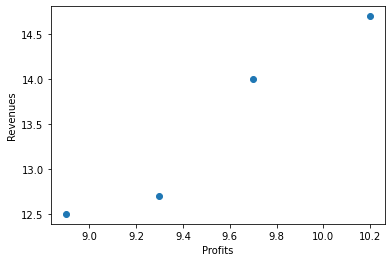

In [33]:
df1 = {"Profits": [9.3, 9.7, 8.9, 10.2],"Revenues": [12.7, 14.0, 12.5, 14.7]}
import pandas as pd 
import matplotlib.pyplot as plt
plt.scatter(x=df1["Profits"],y=df1["Revenues"])
plt.xlabel("Profits")
plt.ylabel("Revenues")
plt.show()

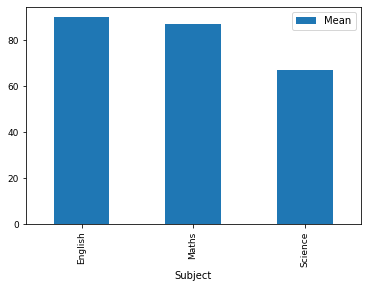

In [34]:
df1=pd.DataFrame({'Subject': ['English', 'Maths', 'Science'], 'Mean': [90, 87, 67]})
import pandas as pd 
df1.plot.bar(x = 'Subject', y = 'Mean', fontsize='9')